Trabalho Data Mining
<a id="secao0"></a>

## Metodologia CRISP-DM [(1ª Parte do Trabalho)](#secao0)
- [ ] [Recolha dos Dados Iniciais](#secao1)
- [ ] [Descrição dos Dados](#secao2)
- [ ] [Exploração de Dados](#secao3)
- [ ] [Verificação da Qualidade dos Dados](#secao4)


## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

Biblioteca utilizadas.



In [2]:
#!pip install --upgrade pandas
#!pip install seaborn --upgrade
#!pip install mlxtend
#!pip freeze
#!pip install graphviz
#!pip install geopy
#!pip install folium
#!pip install --upgrade scikit-learn imbalanced-learn
#!pip install -U imbalanced-learn
#!pip install --upgrade mlxtend
#!pip install requests-mock fuzzytm blosc2 cython sentencepiece
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn
from imblearn.over_sampling import SMOTE
import numpy as np
import textwrap
from numpy import mean, std
import seaborn as sns
import statistics as st
from statistics import mode, mean
from matplotlib import pyplot as plt
import scipy
from scipy.stats import spearmanr, pearsonr, skew, kendalltau, norm
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import requests
import graphviz
import mlxtend
import warnings
import statsmodels.api as sm
from sklearn import tree
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, kneighbors_graph, LocalOutlierFactor as sn
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.decomposition import KernelPCA
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, confusion_matrix, recall_score, precision_score, f1_score, silhouette_score, davies_bouldin_score, mean_squared_error, r2_score, accuracy_score, classification_report, precision_recall_curve, auc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, RepeatedKFold, GridSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest, BaggingClassifier, ExtraTreesClassifier, ExtraTreesRegressor, RandomForestRegressor


<a id="secao0"></a>
Vamos criar uma secção para ter as nossas funções defenidas no topo do script para facilitar a nossa navegação.

| **Função** | <center>**Descrição**</center> |
|:------:|------|
| **Gráfico** | Determina um conjunto de gráficos que é escolhido a formatação chamando grafico(n) onde n é um numero correspondete. [Gráficos](https://seaborn.pydata.org/generated/seaborn.set_theme.html)|
| **IQR** | Função para calcular o Intervalo inter quartis esta função recebe um vetor e retorna o seu intervalo interquantis utilizando a função [`.quantile()`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html). <center>![Ver como calcular aqui](https://www.mathsisfun.com/data/images/interquartile-range.svg)</center>| 
| **Outliers** | Função que calcula os outliers das nossas variáveis sendo que vamos apenas calcular usando a formula para a determinação de outliers moderados deixando os outliers severos para uma analise individual. <center>![Ver como calcular aqui](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*XG2sFucPoFMg6NeV.png)</center>|
| **Tabelas de Medidas de Tendência Central e Não Central** | Tabela que expliqua todas medidas de tendência central e não central. Em boa verdade o [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) dá nos práticamente todas as informações, contudo não é o suficiente para fazer uma análise estatistica completa, assim acrescentamos a tabela mais informação. A ideia é criar a função e depois ao chamar a tabela ela apresenta os valores do dataset. [Medidas](https://www.lecturio.com/pt/concepts/medidas-de-tendencia-central-e-dispersao/)  |
| **Tabela de Medidas de Disperção** | Tabela que expliqua todas as medidas de dispersão, para não estar a fazer individualmente para cada uma das variáveis, a ideia é criar a função e depois ao chamar a tabela ela apresenta os valores do dataset [Medidas](https://www.lecturio.com/pt/concepts/medidas-de-tendencia-central-e-dispersao/) |


In [3]:
def grafico(a):
    if a == 1:
        custom_params = {"axes.spines.right": False, "axes.spines.top": False}
        sns.set_theme(style="ticks", rc=custom_params, palette = "pastel")
        palette = "pastel"
    elif a == 2:
        sns.set_theme(style="white", palette = "Set2")
        palette = "Set2"
    elif a == 3:
        sns.set_theme(style="whitegrid", palette = "pastel")
        palette = "pastel"
    elif a == 4:
        sns.set_theme()
        palette = "husl"
    return palette
    

In [4]:
def iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    return q3 - q1

In [5]:
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lim_min = q1 - 1.5 * iqr
    lim_max = q3 + 1.5 * iqr
    outliers = data[(data < lim_min) | (data> lim_max)]
    return outliers.count()

In [6]:
def tabela_medidas_disperção(dataset):
    estatisticas = []
    for coluna in dataset.columns:
        if dataset[coluna].dtype != 'object':
            variancia = round(np.var(dataset[coluna]),2)
            coef_variacao = round((np.std(dataset[coluna]) / np.mean(dataset[coluna])),2)
            desvio_medio_absoluto = round(np.mean(np.abs(dataset[coluna] - np.mean(dataset[coluna]))),2)
            amplitude = round(np.max(dataset[coluna]) - np.min(dataset[coluna]),2)
            intervalo_inter_quartil = round(iqr(dataset[coluna]),2)
            num_outliers = round(outliers(dataset[coluna]),2)
            estatisticas.append([dataset[coluna].name, variancia, coef_variacao, desvio_medio_absoluto, amplitude, intervalo_inter_quartil, num_outliers])
        tabelavardisp = pd.DataFrame(estatisticas, columns=['Variável', 'Variância', 'Coeficiente de Variação', 'Desvio Médio Absoluto', 'Amplitude', 'Intervalo Inter-Quartil', 'Outliers'])
    return tabelavardisp

In [7]:
def tabela_medidas_tendencia(dataset):
    estatisticas = []
    for coluna in dataset.columns:
        if dataset[coluna].dtype != 'object':
            tabelaskew = round(skew(dataset[coluna]),2)
            tabelamoda=round(mode(dataset[coluna]),2)
            estatisticas.append([tabelaskew, tabelamoda])
    tabelatendCeNC=pd.DataFrame(estatisticas, columns=['Skew','Moda'])
    tabelatendCeNC=pd.concat([dataset.describe().T.reset_index().round(2), tabelatendCeNC],axis=1)
    return tabelatendCeNC 

função sigmoid para a regressão logistica

In [8]:
def model(x):
    return 1 / (1 + np.exp(-x))

Função que nos vai avaliar a accuracy dos nossos modelos

In [9]:
def evaluate_model(X, y, model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

Modelos que vamos utilizar no Objectivo de datamining n 1.

In [10]:
def get_models_DM2():
 models, names = list(), list()
 models.append(DecisionTreeClassifier())
 names.append('Decision Tree')
 models.append(RandomForestClassifier(n_estimators=100))
 names.append('RF')
 models.append(LinearRegression())
 names.append('Linear Regression')
 models.append(KNeighborsClassifier())
 names.append('KNN')
 return models, names

Função que transforma o dataset em variáveis numéricas

In [11]:
def prepareDataset(data):
    auxDataset = data

    auxDataset['race']=auxDataset['race'].astype('category').cat.codes
    auxDataset['Workclass']=auxDataset['Workclass'].astype('category').cat.codes
    auxDataset['marital-status']=auxDataset['marital-status'].astype('category').cat.codes
    auxDataset['occupation']=auxDataset['occupation'].astype('category').cat.codes
    auxDataset['relationship']=auxDataset['relationship'].astype('category').cat.codes
    auxDataset['gender'] = auxDataset['gender'].replace({'Male': 0, 'Female': 1}).astype('category').cat.codes
    auxDataset['country_category']=auxDataset['country_category'].astype('category').cat.codes
    auxDataset['income'] = auxDataset['income'].replace({'>50K': 1, '<=50K': 0}).astype('category').cat.codes
    auxDataset = auxDataset.drop('education', axis=1)

    return auxDataset



<h1>Compreensão dos dados</h1>

<h2>1.1-Recolha dos Dados Iniciais</h2>

## Metodologia CRISP-DM 
- [ ] **[Recolha dos Dados Iniciais](#secao1)**
- [ ] [Descrição dos Dados](#secao2)
- [ ] [Exploração de Dados](#secao3)
- [ ] [Verificação da Qualidade dos Dados](#secao4)

O nosso [dataset](http://archive.ics.uci.edu/dataset/2/adult) era constituido por dois documentos um denominado adulttest e outro de adultdata ambos os documentos não tinham nome nas colunas, utilizamos os nomes que constavam no site para denominar as mesmas e fomos carregar ambos os datasets.
O ficheiro do Adulttest continha uma primeira linha com informação que não nos interessava nomeadamente *"|1x3 Cross validator"* (o método e escolha do test utilizado), eliminamos a linha de forma a ficar apenas com o que precisavamos.
Para ter a certeza que os datasets deram merge como era entendido vamos ver o numero de linhas e colunas do adulttest e do adultdata. Carregamos o dataset final ao qual denominamos por apenas Adult (a junção do data com o test) e ficamos com um dataset com as dimensões que por inerência correspondem a soma do numero de linhas dos anteriores (32561+16281=48842).
<a id="secao1"></a>

In [12]:
colunas=["Age","Workclass","fnlwgt","education","education-num", "marital-status","occupation","relationship","race","gender","capital-gain","capital-loss","hours-per-week","native-country","income"]
data = pd.read_csv('Adultdata.csv', names=colunas)
data2 = pd.read_csv('Adulttest.csv', names=colunas)
data2 = data2.drop(data2.index[0])
merged_df = pd.concat([data, data2], ignore_index=True)
merged_df.to_csv('Adult.csv', index=False)
dataset=pd.read_csv('Adult.csv')
print('O nosso dataset estava dividido em dois ficheiros o ficheiro adultdata com', data.shape[0],'linhas e',data.shape[1],
'colunas.\nO ficheiro adultest por sua vez é consitutido por',data2.shape[0],'linhas e', data2.shape[1],
'colunas.\nO dataset criado (Adult) é então constituido pela soma das linhas dos datasets anteriores e pelo menos numero de colunas.\nOu seja',
dataset.shape[0],'linhas e',dataset.shape[1],'colunas.')

FileNotFoundError: [Errno 2] No such file or directory: 'Adultdata.csv'


<h2>1.2.-Descrição dos Dados</h2>

## Metodologia CRISP-DM 
- [X] [Recolha dos Dados Iniciais](#secao1)
- [ ] **[Descrição dos Dados](#secao2)**
- [ ] [Exploração de Dados](#secao3)
- [ ] [Verificação da Qualidade dos Dados](#secao4)

Tendo o nosso dataset junto vamos ver as variáveis que o mesmo contem para isso vamos utilizar o comando [`.info()`](https://www.w3schools.com/python/pandas/ref_df_info.asp).

<a id="secao2"></a>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48842 non-null  int64  
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   gender          48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 5.6+ MB


Antes de começar a Exploração dos dados vamos procurar por valores omissos que possam comprometer a nossa análise dos dados do dataset.
Numa análise inicial do dataset reparamos que existiam valores omissos que eram representado no data set pelo caracter "?", como o exemplo do individuo com o fnlwgt igual a 121772 que tinha "?" na variável native-country. Vamos usar este individuo para servir de verificação se a função para substituir "?" por NaN é efetuada com sucesso. Contudo e depois ne analisar e de testar várias vezes o dataset reparamos que não é apenas o caracter "?", mas sim este caracter em conjunto com um espaço antes do mesmo dando assim origem ao conjunto de caracteres formado por um espaço e o ponto de interrogação desta forma: " ?"

<a id="NAN"></a>

In [ ]:
dataset[dataset["fnlwgt"] == 121772]

Age Workclass    fnlwgt   education  education-num  \
14      40   Private  121772.0   Assoc-voc           11.0   
28800   37   Private  121772.0     HS-grad            9.0   

            marital-status     occupation    relationship  \
14      Married-civ-spouse   Craft-repair         Husband   
28800        Never-married   Craft-repair   Not-in-family   

                      race gender  capital-gain  capital-loss  hours-per-week  \
14      Asian-Pac-Islander   Male           0.0           0.0            40.0   
28800   Asian-Pac-Islander   Male           0.0           0.0            40.0   

      native-country  income  
14                 ?    >50K  
28800           Hong   <=50K

In [ ]:
dataset = dataset.replace(to_replace=" ?", value=np.nan)
dataset.isnull().sum().unique()
dataset[dataset["fnlwgt"] == 121772]

Age Workclass    fnlwgt   education  education-num  \
14      40   Private  121772.0   Assoc-voc           11.0   
28800   37   Private  121772.0     HS-grad            9.0   

            marital-status     occupation    relationship  \
14      Married-civ-spouse   Craft-repair         Husband   
28800        Never-married   Craft-repair   Not-in-family   

                      race gender  capital-gain  capital-loss  hours-per-week  \
14      Asian-Pac-Islander   Male           0.0           0.0            40.0   
28800   Asian-Pac-Islander   Male           0.0           0.0            40.0   

      native-country  income  
14               NaN    >50K  
28800           Hong   <=50K

De forma a verificarmos os valores omissos da melhor forma foi elaborada uma tabela com recurso ao recurso [`.DataFrame()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [ ]:
tabelaomissos = {'Variável': ['Workclass', 'Occupation', 'Native Country'],
'Valores Omissos': [dataset['Workclass'].isnull().sum(),dataset['occupation'].isnull().sum(),dataset['native-country'].isnull().sum()],
'% dos valores omissos': [(((dataset['Workclass'].isnull().sum())/dataset.shape[0])*100).round(2),
(((dataset['occupation'].isnull().sum())/dataset.shape[0])*100).round(2),(((dataset['native-country'].isnull().sum())/dataset.shape[0])*100).round(2)]}
pd.DataFrame(tabelaomissos)

Variável  Valores Omissos  % dos valores omissos
0       Workclass             2799                   5.73
1      Occupation             2809                   5.75
2  Native Country              857                   1.75

A nossa variável alvo, identifica quem recebe mais do que $50.000 e quem recebe $50.000 ou menos, contudo e quando olhamos para análise da variável verificámos que esta recebia 4 valores: ' <=50K', ' >50K', ' <=50K.', ' >50K.', como está exemplificado nos indivíduos cujo “fnlwgt” é de 336951, onde quatro indivíduos diferentes, todos estes com informação na variável “income” destinta. Assim e de forma a uniformizar o dataset optamos por utilizar a nomenclatura, ' <=50K', ' >50K' vamos usar os indivíduos cujo “fnlwgt” é de 336951 para verificar se a alteração foi corretamente feita.

In [ ]:
pd.DataFrame(dataset['income'].unique())

0
0    <=50K
1     >50K
2   <=50K.
3    >50K.

In [ ]:
dataset[dataset["fnlwgt"] == 336951]

Age   Workclass    fnlwgt    education  education-num  \
6618    27     Private  336951.0      HS-grad            9.0   
28258   28     Private  336951.0      HS-grad            9.0   
32563   28   Local-gov  336951.0   Assoc-acdm           12.0   
47999   28     Private  336951.0      HS-grad            9.0   

            marital-status         occupation relationship    race gender  \
6618    Married-civ-spouse   Transport-moving      Husband   White   Male   
28258   Married-civ-spouse    Exec-managerial      Husband   White   Male   
32563   Married-civ-spouse    Protective-serv      Husband   White   Male   
47999   Married-civ-spouse       Craft-repair      Husband   White   Male   

       capital-gain  capital-loss  hours-per-week  native-country   income  
6618            0.0           0.0            99.0   United-States    <=50K  
28258           0.0           0.0            50.0   United-States     >50K  
32563           0.0           0.0            40.0   United-States    >50K.  
47999           0.0           0.0            40.0   United-States   <=50K.

In [ ]:
dataset = dataset.replace(to_replace=' <=50K.', value=' <=50K')
dataset = dataset.replace(to_replace=' >50K.', value=' >50K')
dataset[dataset["fnlwgt"] == 336951]

Age   Workclass    fnlwgt    education  education-num  \
6618    27     Private  336951.0      HS-grad            9.0   
28258   28     Private  336951.0      HS-grad            9.0   
32563   28   Local-gov  336951.0   Assoc-acdm           12.0   
47999   28     Private  336951.0      HS-grad            9.0   

            marital-status         occupation relationship    race gender  \
6618    Married-civ-spouse   Transport-moving      Husband   White   Male   
28258   Married-civ-spouse    Exec-managerial      Husband   White   Male   
32563   Married-civ-spouse    Protective-serv      Husband   White   Male   
47999   Married-civ-spouse       Craft-repair      Husband   White   Male   

       capital-gain  capital-loss  hours-per-week  native-country  income  
6618            0.0           0.0            99.0   United-States   <=50K  
28258           0.0           0.0            50.0   United-States    >50K  
32563           0.0           0.0            40.0   United-States    >50K  
47999           0.0           0.0            40.0   United-States   <=50K

Como a % dos valores omissos é baixa e as variáveis em questão, poderão não ser relevantes para o problema em questão consideramos que a eliminação dos valores omissos seria a melhor solução para o nosso projeto. Depois da eliminação dos valores omissos o dataset passou a ser constituído por 45222 linhas ou registros e 15 colunas ou atributos/variáveis.

In [ ]:
dataset=dataset.dropna()
dataset.shape

(45222, 15)

No que diz respeito as variáveis do nosso dataset estas estão descritas na tabela seguinte:
|<center>**Variável**</center>|<center>**Descrição** </center>|<center> **Variáveis** </center>| <center>**Tipo**</center>| <center>**V. omissos**</center>|
|------------------|---------------------------------------------------|--------------------|---------------------|------------|
| **age**              | Idade do indivíduo                                | Quantitativa contínua | Inteiro           | Não        |
| **workclass**        | Tipo de emprego                                   | Qualitativa nominal |                     | Sim        |
| **fnlwgt**           | Peso atribuído pelos censos                      | Quantitativa contínua | Inteiro           | Não        |
| **education**       | Escolaridade                                      | Qualitativa ordinal |                     | Não        |
| **education-num**    | Escolaridade numérica                             | Quantitativa contínua | Inteiro           | Não        |
| **marital-status**   | Estado civil                                      | Qualitativa nominal |                     | Não        |
| **occupation**       | Profissão                                         | Qualitativa nominal |                     | Sim        |
| **relationship**     | Grau parentesco dentro da família                 | Qualitativa nominal |                     | Não        |
| **race**             | Raça                                              | Qualitativa nominal |                     | Não        |
| **gender**           | Género                                            | Qualitativa nominal | Binário             | Não        |
| **capital-gain**     | Ganho de capital                                  | Quantitativa contínua | Inteiro           | Não        |
| **capital-loss**     | Perda de capital                                  | Quantitativa contínua | Inteiro           | Não        |
| **hours-per-week**   | Horas por semana                                  | Quantitativa contínua | Inteiro           | Não        |
| **native-country**   | País de origem                                    | Qualitativa nominal |                     | Sim        |
| **income**           | Status do ordenado do indivíduo – Variável alvo   | Qualitativa nominal | Binário             | Não        |


<a id="secao1"></a>

Vamos gravar o nosso dataset de forma a guardar as alterações feitas no ficheiro CSV.

In [ ]:
dataset.to_csv('Adult.csv', index=False)

Tendo terminado o os dois passos anteriores vamos então entrar na Exploração de Dados

<h2>1.3.-Exploração de Dados</h2>

## Metodologia CRISP-DM 
- [X] [Recolha dos Dados Iniciais](#secao1)
- [X] [Descrição dos Dados](#secao2)
- [ ] **[Exploração de Dados](#secao3)**
- [ ] [Verificação da Qualidade dos Dados](#secao4)



Neste ponto e de forma a fazermos um seguimento lógico da exploração iremos começar pela análise das variáveis qualitativas, seguida das variáveis quantitativas e por fim iremos estudar a relação entre ambas com a nossa variável alvo de acordo com o indice abaixo começando pela análise da nossa variável alvo:

<a id="secao3"></a>

## Exploração dos Dados
- [ ] **[Variável qualitativa nominal income (variável alvo)](#secao31)**
- [ ] [Variável qualitativa nominal workclass](#secao32)
- [ ] [Variável qualitativa ordinal education](#secao33)
- [ ] [Variável qualitativa nominal marital-status](#secao34)
- [ ] [Variável qualitativa nominal occupation](#secao35)
- [ ] [Variável qualitativa nominal relationship](#secao36)
- [ ] [Variável qualitativa nominal race](#secao37)
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)
- 
<a id="secao31"></a>

In [ ]:
income51=(dataset['income']== ' >50K').sum()
income50=(dataset['income']== ' <=50K').sum()
print('Existem',income51,' observações >50K e',income50,' observações <=50K.')

Existem 11208  observações >50K e 34014  observações <=50K.


C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2419572900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=dataset, order=dataset['income'].value_counts().index, palette="pastel")


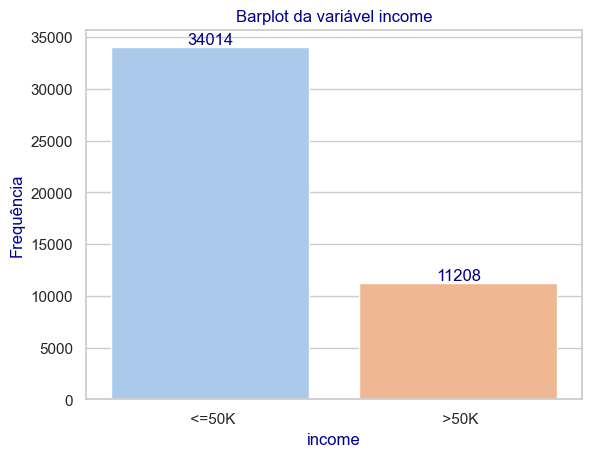

In [ ]:
grafico(3)
sns.countplot(x='income', data=dataset, order=dataset['income'].value_counts().index, palette="pastel")
plt.ylabel("Frequência", color='Darkblue')
plt.xlabel('income',color='Darkblue')
plt.title('Barplot da variável income', color='Darkblue')
for i, value in enumerate(dataset['income'].value_counts()):
    plt.text(i, value +250, str(value), ha='center', color='Darkblue')

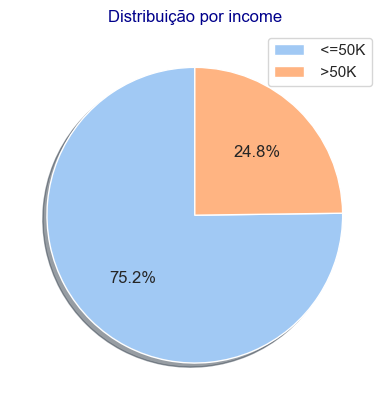

In [ ]:
grafico(3)
plt.pie(dataset['income'].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribuição por income', color='Darkblue')
plt.legend(dataset['income'].value_counts().index,loc='upper right')

Pela análise dos gráficos anteriores podemos concluir que existem mais indivíduos a receber $50.000 ou menos do que indivíduos que recebam mais, **existe na verdade uma proporção de para cada um indivíduo que receba mais de $50.000 existem 3 indivíduos que recebam $50.000 ou menos, tornando assim a categoria <=50K a mais frequente (moda)**

In [ ]:
pd.DataFrame({'V. Absolutos':dataset['income'].value_counts(),'V. Relativos (%)':(dataset['income'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absolutos  V. Relativos (%)
 <=50K         34014             75.22
 >50K          11208             24.78

<h2>1.3.-Exploração de Dados</h2>


## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [ ] **[Variável qualitativa nominal workclass](#secao32)**
- [ ] [Variável qualitativa ordinal education](#secao33)
- [ ] [Variável qualitativa nominal marital-status](#secao34)
- [ ] [Variável qualitativa nominal occupation](#secao35)
- [ ] [Variável qualitativa nominal relationship](#secao36)
- [ ] [Variável qualitativa nominal race](#secao37)
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao32"></a>

In [ ]:
pd.DataFrame(dataset['Workclass'].value_counts().index)

0
0            Private
1   Self-emp-not-inc
2          Local-gov
3          State-gov
4       Self-emp-inc
5        Federal-gov
6        Without-pay

A variável “Workclass” é utilizada para representar o status de emprego de um indivíduo, e pode se dividir em sete valores: “Private”, “Self-emp-not-inc”, “Local-gov”, “State-gov”, “Self-emp-inc”, “Federal-gov”, “Without-pay”. A distribuição das observações pelas categorias da variável são as representadas na tabela seguinte

In [ ]:
pd.DataFrame(dataset['Workclass'].value_counts())

Workclass
 Private               33307
 Self-emp-not-inc       3796
 Local-gov              3100
 State-gov              1946
 Self-emp-inc           1646
 Federal-gov            1406
 Without-pay              21

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2407185643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Workclass', data=dataset,order= dataset['Workclass'].value_counts().index,palette="husl")


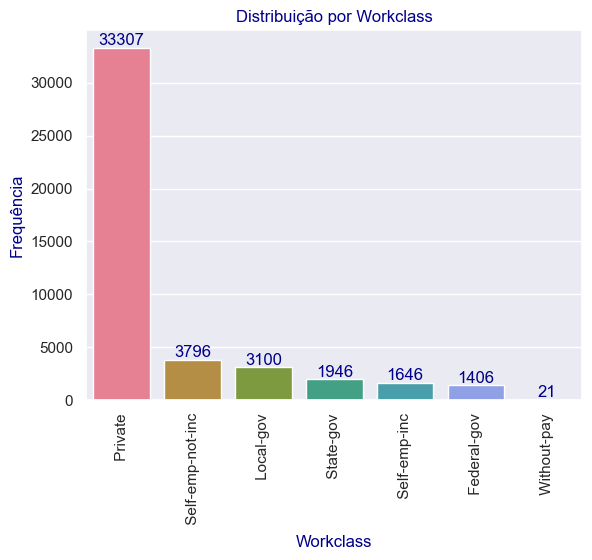

In [ ]:
grafico(4)
sns.countplot(x='Workclass', data=dataset,order= dataset['Workclass'].value_counts().index,palette="husl")
plt.xlabel('Workclass', color="Darkblue")
plt.xticks(rotation=90)
plt.ylabel('Frequência', color='Darkblue')
plt.title('Distribuição por Workclass', color='Darkblue')
for i, value in enumerate(dataset['Workclass'].value_counts()):
    plt.text(i, value+250, str(value),ha='center',color='Darkblue')



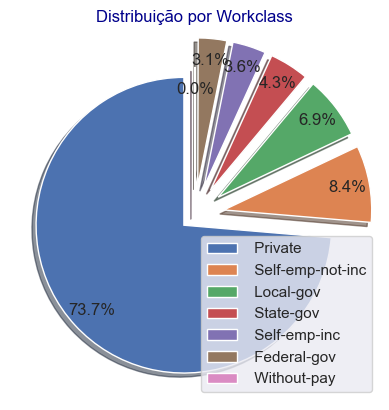

In [ ]:
grafico(4)
plt.pie(dataset['Workclass'].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1,0.2,0.2,0.2,0.2,0.2,0),pctdistance=0.85)
plt.title('Distribuição por Workclass', color='Darkblue')
plt.legend(dataset['Workclass'].value_counts().index, loc='lower right')

No que diz respeito a variável qualitativa “workclass” podemos concluir que cerca de **73.7%** dos indivíduos do nosso dataset trabalham no **setor privado**, correspondendo ao valor mais observado dentro da variável, ou seja a **moda**. De seguida os grupos mais observados são os trabalhadores independentes que não fazem parte de uma empresa (“Self-emp-not-inc”), seguidos dos indivíduos que trabalham para o governo local. 
Os trabalhadores do governo estatal (“State-gov”), trabalhadores independentes que fazem parte de uma empresa (“Self-emp-inc)” e os trabalhadores do governo federal (“Federal-gov”), por esta ordem, são as seguintes observações da variável, sendo que apresentam valores muito próximos.Por último e apenas com **0.05%** das observações aparecem os indivíduos que **não recebem pagamentos**.

In [ ]:
pd.DataFrame({'V. Absolutos': dataset['Workclass'].value_counts(),'V. Relativos (%)':(dataset['Workclass'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absolutos  V. Relativos (%)
 Private                  33307             73.65
 Self-emp-not-inc          3796              8.39
 Local-gov                 3100              6.86
 State-gov                 1946              4.30
 Self-emp-inc              1646              3.64
 Federal-gov               1406              3.11
 Without-pay                 21              0.05

<h2>1.3.-Exploração de Dados</h2>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [ ] **[Variável qualitativa ordinal education](#secao33)**
- [ ] [Variável qualitativa nominal marital-status](#secao34)
- [ ] [Variável qualitativa nominal occupation](#secao35)
- [ ] [Variável qualitativa nominal relationship](#secao36)
- [ ] [Variável qualitativa nominal race](#secao37)
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao33"></a>

In [ ]:
pd.DataFrame(dataset['education'].value_counts())

education
 HS-grad           14783
 Some-college       9899
 Bachelors          7570
 Masters            2514
 Assoc-voc          1959
 11th               1619
 Assoc-acdm         1507
 10th               1223
 7th-8th             823
 Prof-school         785
 9th                 676
 12th                577
 Doctorate           544
 5th-6th             449
 1st-4th             222
 Preschool            72

Como para a variável education interessava a ordem era necessário atribuir um valor numérico as variáveis para que elas podessem ser organizadas, podiamos ter usado a variável education-num, mas nesta altura ainda não tinhamos a certeza que as variáveis presentavam a mesma variável. O critério utilizado foi: 
| <center>**Valor**</center>|<center>**Descrição**</center>      |
|--------|----------------|
| 1      | Preschool      |
| 2      | 1st-4th        |
| 3      | 5th-6th        |
| 4      | 7th-8th        |
| 5      | 9th            |
| 6      | 10th           |
| 7      | 11th           |
| 8      | 12th           |
| 9      | HS-grad        |
| 10     | Some-college   |
| 11     | Assoc-voc      |
| 12     | Assoc-acdm     |
| 13     | Bachelors      |
| 14     | Masters        |
| 15     | Prof-school    |
| 16     | Doctorate      |

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3164932041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=educationordenada, y=dataset['education-num'].value_counts().sort_index().values, order=educationordenada, palette="pastel")


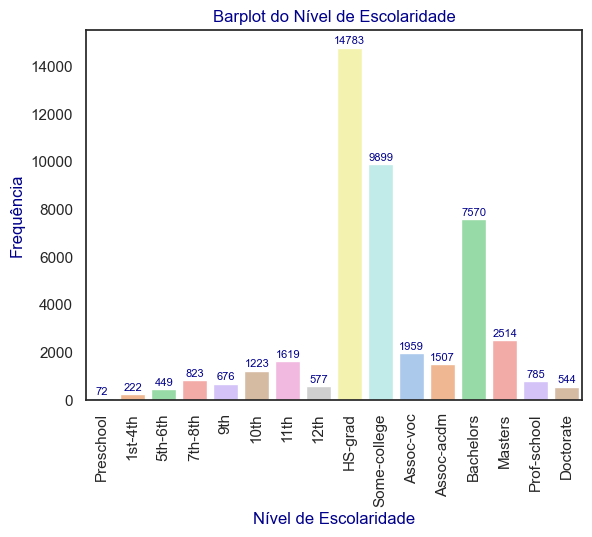

In [ ]:
grafico(2)
education_correspondecia = {1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th', 5: '9th', 6: '10th', 7: '11th', 8: '12th', 9: 'HS-grad', 10: 'Some-college', 11: 'Assoc-voc', 12: 'Assoc-acdm', 13: 'Bachelors', 14: 'Masters', 15: 'Prof-school', 16: 'Doctorate'}
educationordenada = [education_correspondecia[num] for num in dataset['education-num'].value_counts().sort_index().index]
sns.barplot(x=educationordenada, y=dataset['education-num'].value_counts().sort_index().values, order=educationordenada, palette="pastel")
plt.xlabel('Nível de Escolaridade', color='Darkblue')
plt.ylabel('Frequência', color='Darkblue')
plt.title('Barplot do Nível de Escolaridade', color='Darkblue')
plt.xticks(rotation=90)
for i, value in enumerate(dataset['education-num'].value_counts().sort_index()):
    plt.text(i, value+150, str(value), ha='center',color='Darkblue', fontsize=8)

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\145036275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education',data=dataset, order=dataset['education'].value_counts().index, palette="pastel")


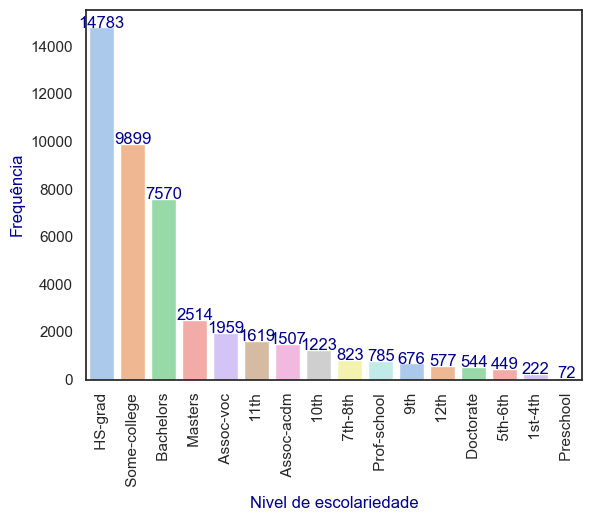

In [ ]:
grafico(2)
sns.countplot(x='education',data=dataset, order=dataset['education'].value_counts().index, palette="pastel")
plt.xlabel('Nivel de escolariedade', color='Darkblue')
plt.xticks(rotation=90)
plt.ylabel('Frequência', color='Darkblue')
for i, value in enumerate (dataset['education'].value_counts()):
    plt.text(i,value, str(value), ha='center', color='Darkblue')

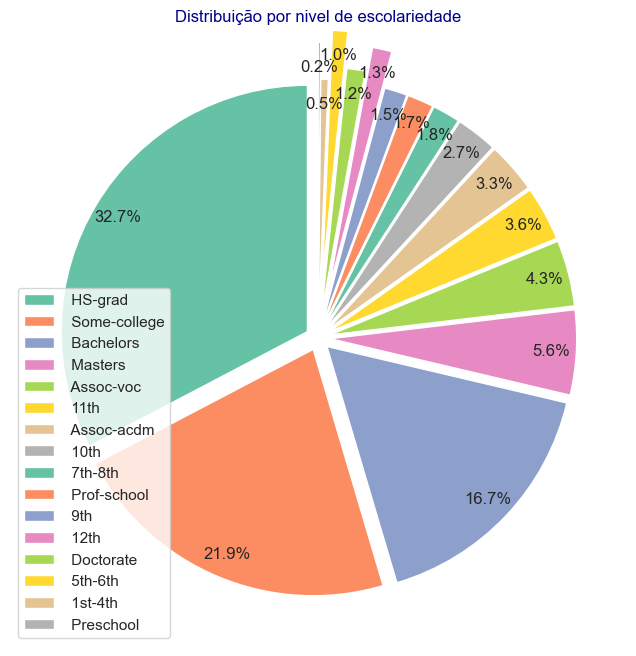

In [ ]:
grafico(2)
plt.figure(figsize=(8, 8))
plt.pie(dataset['education'].value_counts(), autopct='%1.1f%%',startangle=90, explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2,0.1,0.25,0.05,0.2), pctdistance=.90)
plt.title('Distribuição por nivel de escolariedade', color='Darkblue')
plt.legend(dataset['education'].value_counts().index, loc='lower left')

Ao analisarmos a variável concluímos que o nível de escolaridade “HS-grad”, é a que tem mais observações, logo corresponde a moda da variável, correspondendo a 32.7% da quantidade de observações. Podemos ainda afirmar que a maioria dos indivíduos têm o nível de escolaridade “HS-grad”, “Some-collage” e “Bachelors”, onde a soma das observações correspondem a 71.3% dos indivíduos. Por outro lado, os níveis de escolaridade menos observados são “Preschool” e “1st-4th” onde apenas são observados 0.65% dos indivíduos.

In [ ]:
pd.DataFrame({'V. Absolutos':dataset['education-num'].value_counts().sort_index().values,'V. Relativos (%)':(dataset['education-num'].value_counts().sort_index().values/dataset.shape[0]).round(4)*100}, index=educationordenada)

V. Absolutos  V. Relativos (%)
Preschool               72              0.16
1st-4th                222              0.49
5th-6th                449              0.99
7th-8th                823              1.82
9th                    676              1.49
10th                  1223              2.70
11th                  1619              3.58
12th                   577              1.28
HS-grad              14783             32.69
Some-college          9899             21.89
Assoc-voc             1959              4.33
Assoc-acdm            1507              3.33
Bachelors             7570             16.74
Masters               2514              5.56
Prof-school            785              1.74
Doctorate              544              1.20

<h2>1.3.-Exploração de Dados</h2>


## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [ ] **[Variável qualitativa nominal marital-status](#secao34)**
- [ ] [Variável qualitativa nominal occupation](#secao35)
- [ ] [Variável qualitativa nominal relationship](#secao36)
- [ ] [Variável qualitativa nominal race](#secao37)
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)


<a id="secao34"></a>

In [ ]:
pd.DataFrame(dataset['marital-status'].value_counts().index)

0
0      Married-civ-spouse
1           Never-married
2                Divorced
3               Separated
4                 Widowed
5   Married-spouse-absent
6       Married-AF-spouse

A variável qualitativa nominal “marital-status”, corresponde ao Estado civil de um indivíduo, e está dividida em sete valores únicos sendo eles: “Married-civ-spouse”, “Never-married”, “Divorced”, “Separated”, “Widowed”, “Married-spouse-absent”, “Married-AF-spouse” . 

In [ ]:
pd.DataFrame(dataset['marital-status'].value_counts())

marital-status
 Married-civ-spouse              21055
 Never-married                   14598
 Divorced                         6297
 Separated                        1411
 Widowed                          1277
 Married-spouse-absent             552
 Married-AF-spouse                  32

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3925571234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital-status', data=dataset, order=dataset['marital-status'].value_counts().index, palette="pastel")


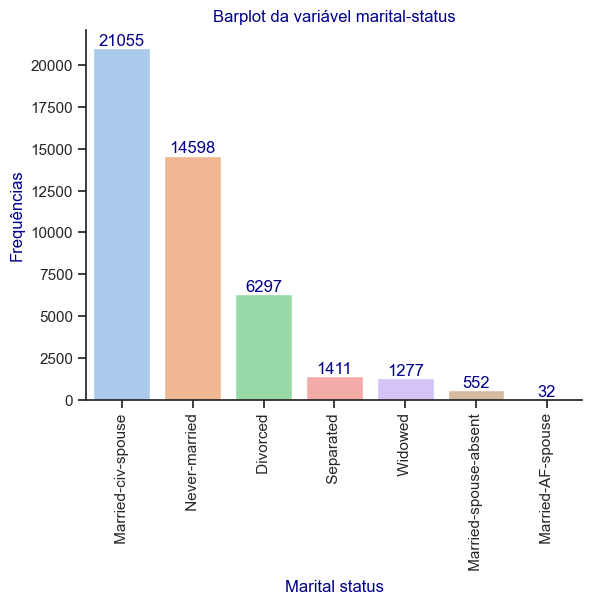

In [ ]:
grafico(1)
sns.countplot(x='marital-status', data=dataset, order=dataset['marital-status'].value_counts().index, palette="pastel")
plt.xlabel('Marital status', color='Darkblue')
plt.xticks(rotation=90)
plt.ylabel('Frequências', color='Darkblue')
plt.title('Barplot da variável marital-status', color='Darkblue')
for i, value in enumerate(dataset['marital-status'].value_counts()):
    plt.text(i,value+150, str(value), ha='center',color='Darkblue')

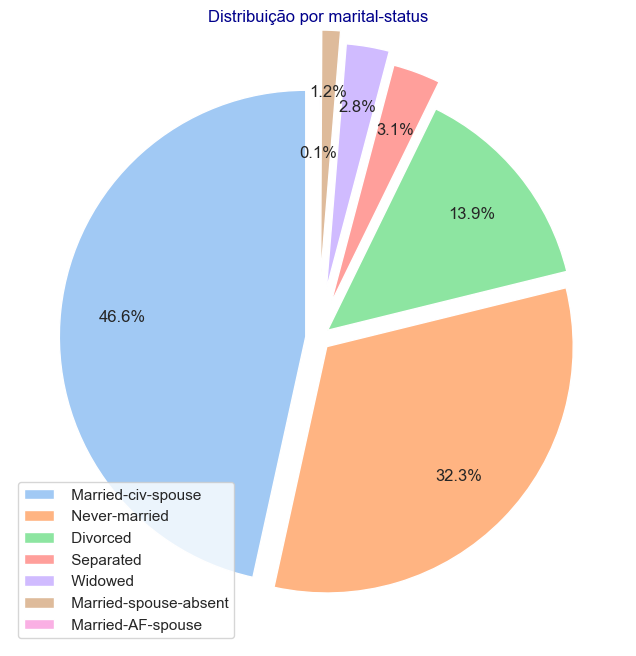

In [ ]:
grafico(1)
plt.figure(figsize=(8,8))
plt.pie(dataset['marital-status'].value_counts(),autopct='%1.1f%%',startangle=90, explode=(0.05,0.05,0.05,0.15,0.2,0.25,0), pctdistance=0.75)
plt.title('Distribuição por marital-status', color='Darkblue')
plt.legend(dataset['marital-status'].value_counts().index, loc='lower left')


Da análise dos gráficos seguintes conseguimos observar que o valor mais observado da variável é “Married-civ-spouse”, com cerca de 46,6% das observações. A maioria dos indivíduos, cerca de 78.9%, têm o seu estado civil em “Married-civ-spouse” ou “Never-married”.
Podemos ainda analisar que apenas 0.07% dos indivíduos do nosso dataset é que têm o seu estado como “Married-AF-spouse”.

In [ ]:
pd.DataFrame({'V. Absolutos': dataset['marital-status'].value_counts(), 'V. Relativos (%)':(dataset['marital-status'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absolutos  V. Relativos (%)
 Married-civ-spouse            21055             46.56
 Never-married                 14598             32.28
 Divorced                       6297             13.92
 Separated                      1411              3.12
 Widowed                        1277              2.82
 Married-spouse-absent           552              1.22
 Married-AF-spouse                32              0.07

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [ ]**[Variável qualitativa nominal occupation](#secao35)**
- [ ] [Variável qualitativa nominal relationship](#secao36)
- [ ] [Variável qualitativa nominal race](#secao37)
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao35"></a>

A variável nominal “occupation” define o tipo geral de ocupação do indivíduo e está dividida em catorze valores: “Craft-repair”, “Prof-specialty”, ”Exec-managerial”, “Adm-clerical”, “Sales”, “Other-service”, “Machine-op-inspct”, “Transport-moving”, ”Handlers-cleaners”, “Farming-fishing”, “Tech-support”, ”Protective-serv”, “Priv-house-serv”, “Armed-Forces”.

In [ ]:
pd.DataFrame(dataset['occupation'].value_counts().index)

0
0         Craft-repair
1       Prof-specialty
2      Exec-managerial
3         Adm-clerical
4                Sales
5        Other-service
6    Machine-op-inspct
7     Transport-moving
8    Handlers-cleaners
9      Farming-fishing
10        Tech-support
11     Protective-serv
12     Priv-house-serv
13        Armed-Forces

Na análise dos valores da variável verificamos que a distribuição é muito aproximada nos valores de “Craft-repair”, “Prof-specialty” e ”Exec-managerial”, sendo que o valor com mais observações é o de “Craft-repair” apenas com mais doze observações do que “Prof-specialty” e mais 36 observações do que ”Exec-managerial”. Podemos afirmar assim que a moda desta variável é o valor “Craft-repair”.

In [ ]:
pd.DataFrame(dataset['occupation'].value_counts())

occupation
 Craft-repair             6020
 Prof-specialty           6008
 Exec-managerial          5984
 Adm-clerical             5540
 Sales                    5408
 Other-service            4808
 Machine-op-inspct        2970
 Transport-moving         2316
 Handlers-cleaners        2046
 Farming-fishing          1480
 Tech-support             1420
 Protective-serv           976
 Priv-house-serv           232
 Armed-Forces               14

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3271659351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset['occupation'].value_counts().index, y=dataset['occupation'].value_counts().values, palette="pastel")


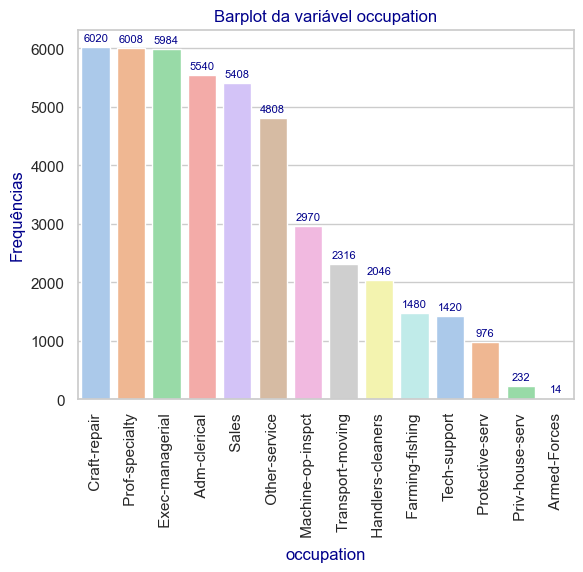

In [ ]:
grafico(3)
sns.barplot(x=dataset['occupation'].value_counts().index, y=dataset['occupation'].value_counts().values, palette="pastel")
plt.xlabel('occupation', color='Darkblue')
plt.xticks(rotation=90)
plt.title('Barplot da variável occupation', color='Darkblue')
plt.ylabel('Frequências', color='Darkblue')
for i, value in enumerate(dataset['occupation'].value_counts()):
    plt.text(i,value+100, str(value), ha='center', color='Darkblue', fontsize=8)

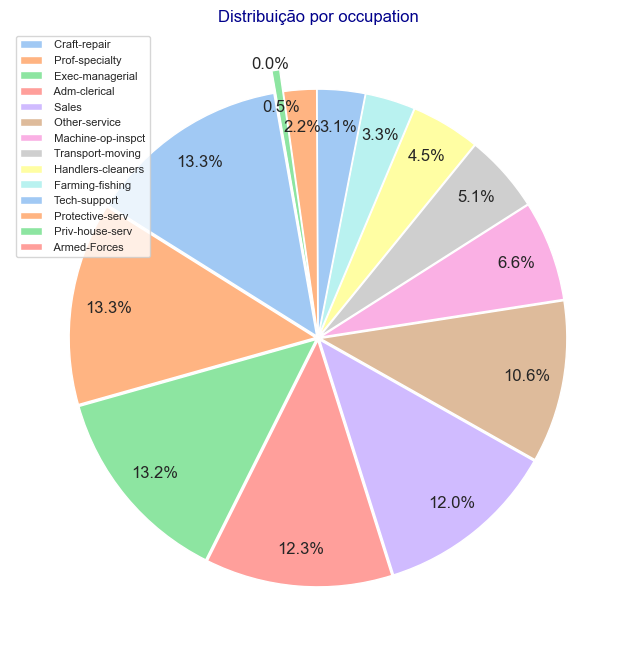

In [ ]:
grafico(3)
plt.figure(figsize=(8,8))
plt.pie(dataset['occupation'].value_counts(), autopct='%1.1f%%', pctdistance=0.85, startangle=100, explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.28))
plt.title('Distribuição por occupation',color='Darkblue')
plt.legend(dataset['occupation'].value_counts().index, loc='upper left',fontsize=8)

 Existe uma boa distribuição dos indivíduos ao longo da variável, como podemos observar tanto pelo barplot como pelo gráfico circular onde a maior parte dos indivíduos está concentrado nas ocupações “Craft-repair”, “Prof-specialty”, ”Exec-managerial”, “Adm-clerical”, “Sales”, “Other-service”, correspondendo a **74.67%** dos indivíduos.
Por outro lado, a ocupação que regista o menor número de indivíduos é a “Armed-Forces”, com apenas **0.03%** das observações. 

In [ ]:
pd.DataFrame({'V. Absolutos':dataset['occupation'].value_counts(), 'V. Relativos (%)':(dataset['occupation'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absolutos  V. Relativos (%)
 Craft-repair               6020             13.31
 Prof-specialty             6008             13.29
 Exec-managerial            5984             13.23
 Adm-clerical               5540             12.25
 Sales                      5408             11.96
 Other-service              4808             10.63
 Machine-op-inspct          2970              6.57
 Transport-moving           2316              5.12
 Handlers-cleaners          2046              4.52
 Farming-fishing            1480              3.27
 Tech-support               1420              3.14
 Protective-serv             976              2.16
 Priv-house-serv             232              0.51
 Armed-Forces                 14              0.03

<h2>1.3.-Exploração de Dados</h2>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [ ] **[Variável qualitativa nominal relationship](#secao36)**
- [ ] [Variável qualitativa nominal race](#secao37)
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao36"></a>

No que diz respeito à variável “relationship” esta representa a relação do indivíduo em relação a outro. De uma forma geral este atributo está relacionado de certa forma com a variável qualitativa nominal marital-status está dividida em seis valores, nomeadamente: “Husband”, “Not-in-family”, “Own-child”, “Unmarried”, “Wife”, ”Other-relative”.

In [ ]:
pd.DataFrame(dataset['relationship'].value_counts().index)

0
0          Husband
1    Not-in-family
2        Own-child
3        Unmarried
4             Wife
5   Other-relative

In [ ]:
pd.DataFrame(dataset['relationship'].value_counts())

relationship
 Husband                18666
 Not-in-family          11702
 Own-child               6626
 Unmarried               4788
 Wife                    2091
 Other-relative          1349

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\941907838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset['relationship'].value_counts().index,y=dataset['relationship'].value_counts(), palette="pastel")


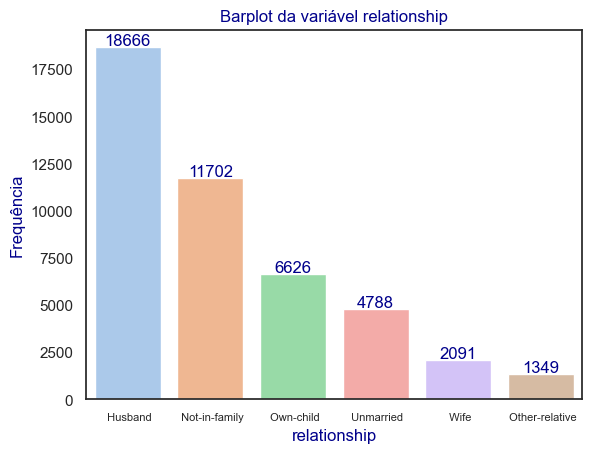

In [ ]:
grafico(2)
sns.barplot(x=dataset['relationship'].value_counts().index,y=dataset['relationship'].value_counts(), palette="pastel")
plt.title('Barplot da variável relationship', color='Darkblue')
plt.xticks(fontsize=8)
plt.xlabel('relationship',color='Darkblue')
plt.ylabel('Frequência', color='Darkblue')
for i, value in enumerate(dataset['relationship'].value_counts()):
    plt.text(i, value+100, str(value), ha='center', color='Darkblue')

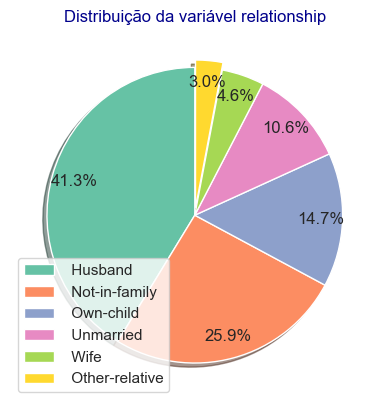

In [ ]:
grafico(2)
plt.pie(dataset['relationship'].value_counts(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow=True, explode=(0,0,0,0,0,0.05))
plt.title('Distribuição da variável relationship', color='Darkblue')
plt.legend(dataset['relationship'].value_counts().index, loc='lower left')

Pela análise dos valores da variável podemos afirmar que o valor mais observado é “Husband”, correspondendo a moda da variável, que corresponde a aproximadamente 41.28% dos indivíduos. O valor menos observado com cerca 2.98% dos indivíduos a corresponde à observação” Other-relative”.
A maioria dos indivíduos correspondem as observações “Husband” e “Not-in-family”, cujo somatório corresponde a 67.16% dos indivíduos da variável.


In [ ]:
pd.DataFrame({'V. Absoluto':dataset['relationship'].value_counts(),'V. Relativos (%)':(dataset['relationship'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absoluto  V. Relativos (%)
 Husband               18666             41.28
 Not-in-family         11702             25.88
 Own-child              6626             14.65
 Unmarried              4788             10.59
 Wife                   2091              4.62
 Other-relative         1349              2.98

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [ ] **[Variável qualitativa nominal race](#secao37)**
- [ ] [Variável qualitativa nominal gender](#secao38)
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)


<a id="secao37"></a>

A variável qualitativa nominal race, descreve a raça dos indivíduos e divide-se em cinco valores: “White”, “Black”, “Asian-Pac-Islander”, “Amer-Indian-Eskimo”,”Other”.

In [ ]:
pd.DataFrame(dataset['race'].value_counts())

race
 White               38903
 Black                4228
 Asian-Pac-Islander   1303
 Amer-Indian-Eskimo    435
 Other                 353

In [ ]:
pd.DataFrame(dataset['race'].value_counts().index)

0
0                White
1                Black
2   Asian-Pac-Islander
3   Amer-Indian-Eskimo
4                Other

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2724804310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data= dataset, order=dataset['race'].value_counts().index, palette="pastel")


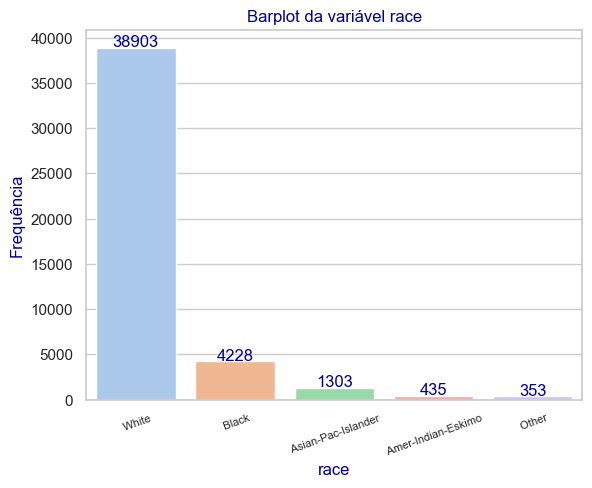

In [ ]:
grafico(3)
sns.countplot(x='race', data= dataset, order=dataset['race'].value_counts().index, palette="pastel")
plt.title('Barplot da variável race', color='Darkblue')
plt.xlabel('race', color='Darkblue')
plt.xticks(fontsize=8, rotation=20)
plt.ylabel('Frequência', color='Darkblue')
for i, value in enumerate(dataset['race'].value_counts()):
    plt.text(i, value+80, str(value), ha='center', color='Darkblue')

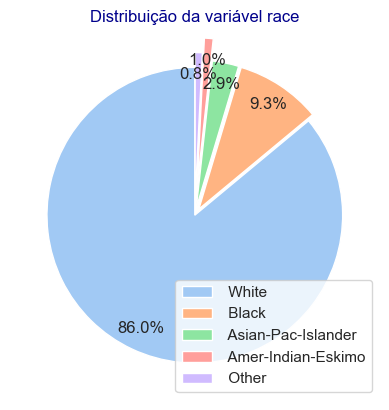

In [ ]:
grafico(3)
plt.pie(dataset['race'].value_counts(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0,0.05,0.05,0.2,0.1))
plt.title('Distribuição da variável race', color='Darkblue')
plt.legend(dataset['race'].value_counts().index, loc='lower right')

O valor que corresponde a moda da variável é “White” com **86.03%** dos indivíduos, podemos afirmar que a maioria dos indivíduos correspondem a categoria“White”. O valor menos observado é ”Other” que contabilizando apenas com **0.78%** dos indivíduos.

In [ ]:
pd.DataFrame({'V. Absolutos': dataset['race'].value_counts(),'V. Relativos (%)': (dataset['race'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absolutos  V. Relativos (%)
 White                      38903             86.03
 Black                       4228              9.35
 Asian-Pac-Islander          1303              2.88
 Amer-Indian-Eskimo           435              0.96
 Other                        353              0.78

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [ ] **[Variável qualitativa nominal gender](#secao38)**
- [ ] [Variável qualitativa nominal native-country](#secao39)
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao38"></a>

A variável binomial “gender” corresponde ao género dos indivíduos, que pode ser ou masculino (“Male”) ou feminino (“Female”).

In [ ]:
pd.DataFrame(dataset['gender'].value_counts().index)

0
0     Male
1   Female

In [ ]:
pd.DataFrame(dataset['gender'].value_counts())

gender
 Male     30527
 Female   14695

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1287225528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=dataset, order=dataset['gender'].value_counts().index, palette="pastel")


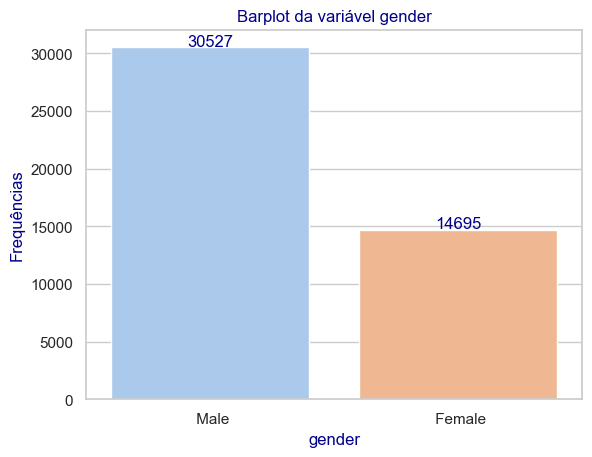

In [ ]:
grafico(3)
sns.countplot(x='gender', data=dataset, order=dataset['gender'].value_counts().index, palette="pastel")
plt.title('Barplot da variável gender', color='Darkblue')
plt.xlabel('gender', color='Darkblue')
plt.ylabel('Frequências', color= 'Darkblue')
for i,value in enumerate (dataset['gender'].value_counts()):
    plt.text(i,value+100, str(value), ha='center', color='Darkblue')

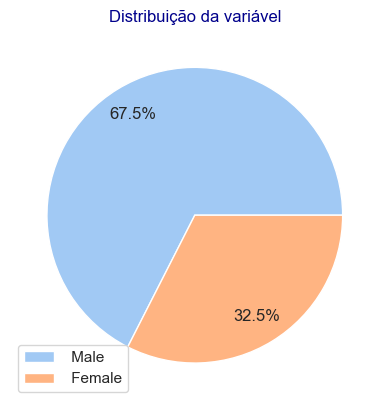

In [ ]:
grafico(3)
plt.pie(dataset['gender'].value_counts(), autopct='%1.1f%%',pctdistance=0.8)
plt.title('Distribuição da variável',color='Darkblue')
plt.legend(dataset['gender'].value_counts().index, loc='lower left')

Sendo que o sexo masculino é o valor predominante dos indivíduos da nossa amostra, com cerca de **67.5%**. Podemos ainda dizer que existem aproximadamente **dois homens para cada uma mulher.**

In [ ]:
pd.DataFrame({'V. Absoluto':dataset['gender'].value_counts(), 'V. Relativo (%)':(dataset['gender'].value_counts()*100/dataset.shape[0]).round(2)})

V. Absoluto  V. Relativo (%)
 Male          30527             67.5
 Female        14695             32.5

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [ ] **[Variável qualitativa nominal native-country](#secao39)**
- [ ] [Variável quantitativa age](#secao310)
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao39"></a>

A variável “native-country” corresponde ao pais de origem do indivíduo sendo que no caso desta variável existem quarenta e um valores, que podem ter os seguintes valores: “United-States”, “Mexico”, “Philippines”, “Germany”, “Puerto-Rico”, '”Canada”, “El-Salvador”, “India”, “Cuba”, “England”, “China”, ”Jamaica”, “South”, “Italy”, “Dominican-Republic”, “Japan”, ”Guatemala”, “Vietnam”, “Columbia”, “Poland”, “Haiti”, “Portugal”, “Iran”, “Taiwan”, “Greece”, “Nicaragua”, “Peru”, “Ecuador”, “Ireland”, “France”, “Thailand”, “Hong”, “Cambodia”, ”Trinadad & Tobago”, “Yugoslavia”, “Outlying-US (Guam-USVI-etc)”, ”Laos”, “Scotland”, “Honduras”, “Hungary”, “Holand-Netherlands”.

In [ ]:
pd.DataFrame(dataset['native-country'].value_counts().index).T

0        1             2         3             4        5   \
0   United-States   Mexico   Philippines   Germany   Puerto-Rico   Canada   

             6       7      8         9   ...     31         32  \
0   El-Salvador   India   Cuba   England  ...   Hong   Cambodia   

                 33           34                           35     36  \
0   Trinadad&Tobago   Yugoslavia   Outlying-US(Guam-USVI-etc)   Laos   

          37         38        39                   40  
0   Scotland   Honduras   Hungary   Holand-Netherlands  

[1 rows x 41 columns]

In [ ]:
pd.DataFrame(dataset['native-country'].value_counts()).T

United-States   Mexico   Philippines   Germany   Puerto-Rico  \
native-country           41292      903           283       193           175   

                 Canada   El-Salvador   India   Cuba   England  ...   Hong  \
native-country      163           147     147    133       119  ...     28   

                 Cambodia   Trinadad&Tobago   Yugoslavia  \
native-country         26                26           23   

                 Outlying-US(Guam-USVI-etc)   Laos   Scotland   Honduras  \
native-country                           22     21         20         19   

                 Hungary   Holand-Netherlands  
native-country        18                    1  

[1 rows x 41 columns]

Como as tambelas anteriores tinham bastantes colunas e de forma a facilitar a navegação e a visualização do script utilizamos a matriz transporta aplicando a função [`.T`](https://www.w3resource.com/numpy/manipulation/ndarray-t.php)

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\591165305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset['native-country'].value_counts().index,y=dataset['native-country'].value_counts().values, palette="pastel")


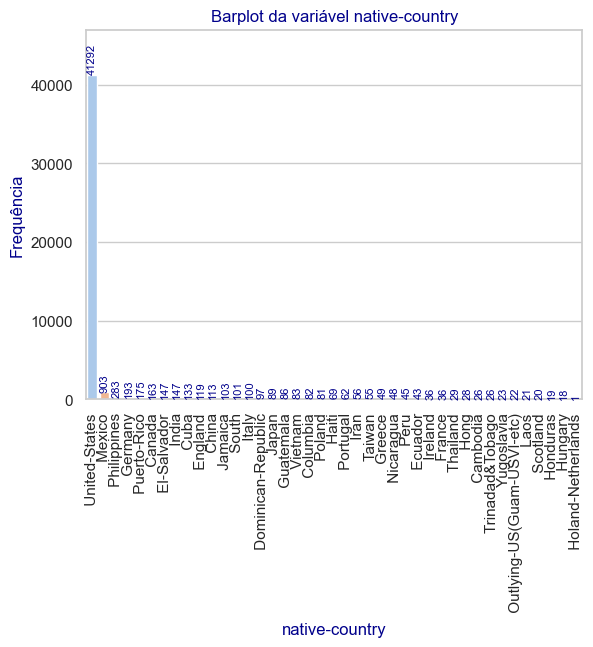

In [ ]:
grafico(3)
sns.barplot(x=dataset['native-country'].value_counts().index,y=dataset['native-country'].value_counts().values, palette="pastel")
plt.title('Barplot da variável native-country', color='Darkblue')
plt.xticks(rotation=90)
plt.ylim(0,47000)
plt.xlabel('native-country', color='Darkblue')
plt.ylabel('Frequência', color='Darkblue')
for i, value in enumerate(dataset['native-country'].value_counts()):
    plt.text(i, value+280, str(value),ha='center',fontsize=8, rotation=90, color='Darkblue')

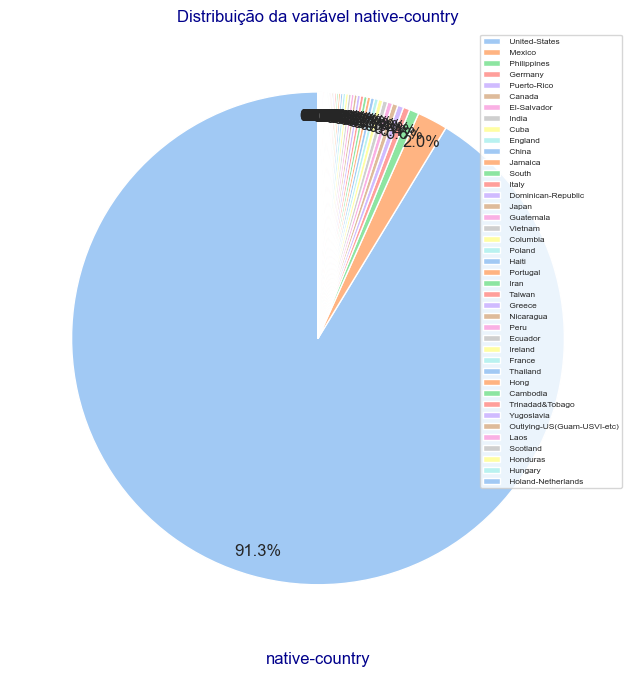

In [ ]:
grafico(3)
plt.figure(figsize=(8,8))
plt.pie(dataset['native-country'].value_counts(), autopct='%1.1f%%',pctdistance=0.9, startangle=90)
plt.title('Distribuição da variável native-country', color='Darkblue')
plt.xlabel('native-country', color='Darkblue')
plt.xticks(fontsize=8, rotation=90)
plt.legend(dataset['native-country'].value_counts().index, fontsize=6)

In [ ]:
pd.DataFrame({'V. Absoluto':dataset['native-country'].value_counts(),'V. Relativo (%)':(dataset['native-country'].value_counts()*100/dataset.shape[0]).round(2)}).T

United-States   Mexico   Philippines   Germany  \
V. Absoluto            41292.00    903.0        283.00    193.00   
V. Relativo (%)           91.31      2.0          0.63      0.43   

                  Puerto-Rico   Canada   El-Salvador   India    Cuba  \
V. Absoluto            175.00   163.00        147.00  147.00  133.00   
V. Relativo (%)          0.39     0.36          0.33    0.33    0.29   

                  England  ...   Hong   Cambodia   Trinadad&Tobago  \
V. Absoluto        119.00  ...  28.00      26.00             26.00   
V. Relativo (%)      0.26  ...   0.06       0.06              0.06   

                  Yugoslavia   Outlying-US(Guam-USVI-etc)   Laos   Scotland  \
V. Absoluto            23.00                        22.00  21.00      20.00   
V. Relativo (%)         0.05                         0.05   0.05       0.04   

                  Honduras   Hungary   Holand-Netherlands  
V. Absoluto          19.00     18.00                  1.0  
V. Relativo (%)       0.04      0.04                  0.0  

[2 rows x 41 columns]

Numa análise da variável verificamos que cerca de **91.30% dos indivíduos têm o seu pais de origem “United-States”**, e que o **segundo valor mais observado é o “Mexico” com cerca de 2% das observações**. O valor menos observado é **“Holand-Netherlands” apenas com um registo correspondendo a um valor aproximado de 0%**. Podemos afirmar que a nossa amostra é constituída maioritariamente por indivíduos cujo país de origem é “United-States”.
A análise dos gráficos desta variável não se constitui uma mais valia, uma vez que devido à distribuição acentuada dos indivíduos da amostra concentrada fortemente em um valor (“United-States”) as faz com que os valores dos restantes países sejam considerados irrelevantes.


In [ ]:
agruparpaises=dataset['native-country'].replace(dataset['native-country'].value_counts()[dataset['native-country'].value_counts() < 150].index, 'Outros')
agruparpaises.value_counts()

 United-States    41292
Outros             2213
 Mexico             903
 Philippines        283
 Germany            193
 Puerto-Rico        175
 Canada             163
Name: native-country, dtype: int64

De forma a que fique visualmente mais aceitável juntamos todas as observações menores do que **150 indivíduos numa categoria criada**, denominada de **“outros ”** e elaboramos os gráficos correspondentes de forma a que se possa exemplificar o explicado anteriormente.

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3653053759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agruparpaises.value_counts().index,y=agruparpaises.value_counts().values, palette="pastel")


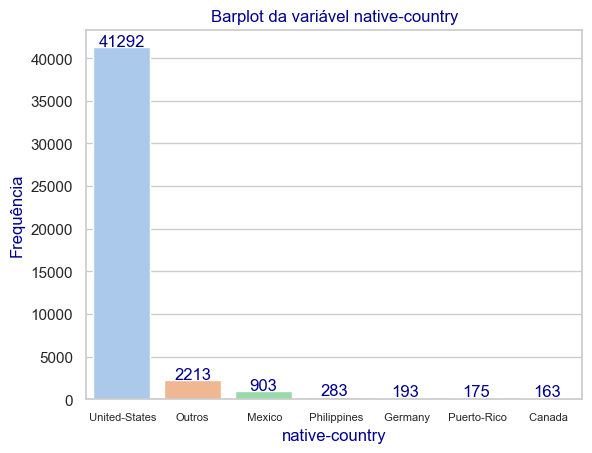

In [ ]:
grafico(3)
sns.barplot(x=agruparpaises.value_counts().index,y=agruparpaises.value_counts().values, palette="pastel")
plt.title('Barplot da variável native-country', color='Darkblue')
plt.xlabel('native-country', color='Darkblue')
plt.xticks(fontsize=8)
plt.ylabel('Frequência', color='Darkblue')
for i, value in enumerate(agruparpaises.value_counts()):
    plt.text(i, value+150, str(value), color='Darkblue', ha='center')

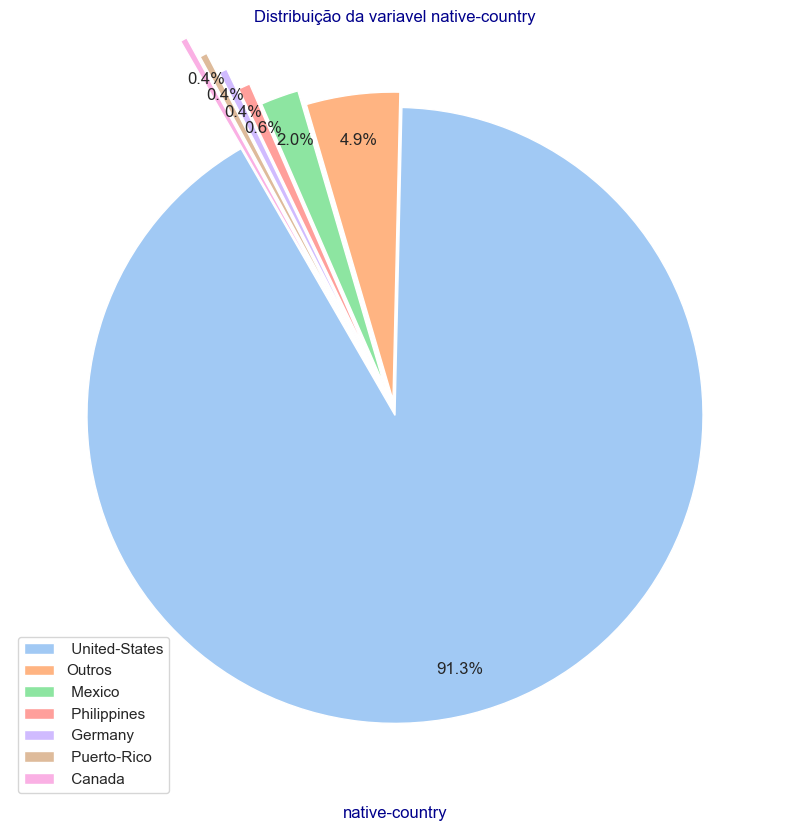

In [ ]:
grafico(3)
plt.figure(figsize=(10,10))
plt.pie(agruparpaises.value_counts(), autopct='%1.1f%%', pctdistance=0.85, startangle=120, explode=(0, 0.05,0.1,0.175,0.25,0.325,0.4))
plt.xlabel('native-country', color='Darkblue')
plt.title('Distribuição da variavel native-country', color='Darkblue')
plt.legend(agruparpaises.value_counts().index, loc='lower left')

In [ ]:
pd.DataFrame({'V. Absoluto':agruparpaises.value_counts(),'V. Relativos (%)':(agruparpaises.value_counts()*100/dataset.shape[0]).round(2)})

V. Absoluto  V. Relativos (%)
 United-States        41292             91.31
Outros                 2213              4.89
 Mexico                 903              2.00
 Philippines            283              0.63
 Germany                193              0.43
 Puerto-Rico            175              0.39
 Canada                 163              0.36

<h2>1.3.-Exploração de Dados</h2>



Terminada as **variáveis qualitativas** vamos agora iniciar a análise das **variáveis quantitativas**

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [ ] **[Variável quantitativa age](#secao310)**
- [ ] [Variável quantitativa education-num](#secao311)
- [ ] [Variável quantitativa capital-gain](#secao312)
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)


Vamos então criar duas tabelas uma com as **medidas de Tendencia central e não central** e outra com as **medidas de dispersão** [funções definidas no inicio do script](#secao0)


<a id="secao310"></a>

In [ ]:
tabela_medidas_tendencia(dataset).iloc[:1]

index    count   mean    std   min   25%   50%   75%   max  Skew  Moda
0   Age  45222.0  38.55  13.22  17.0  28.0  37.0  47.0  90.0  0.53  36.0

In [ ]:
tabela_medidas_disperção(dataset).iloc[:1]

Variável  Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
0      Age     174.71                     0.34                  10.84   

   Amplitude  Intervalo Inter-Quartil  Outliers  
0       73.0                     19.0       269

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1494882804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Age'], color="lightblue",linewidth=0.75,flierprops=dict(marker='*', markersize=5), palette="pastel")


Text(0.5, 0, 'Idades')

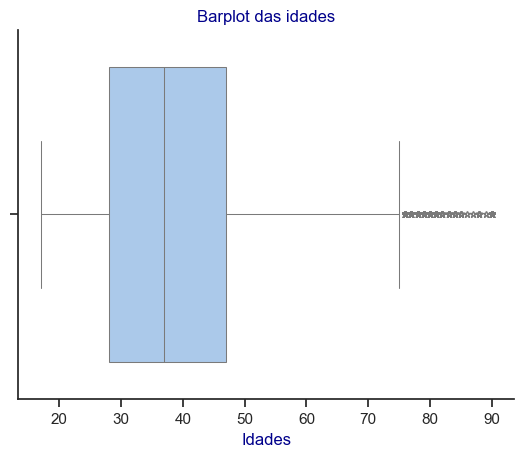

In [ ]:
grafico(1)
sns.boxplot(x=dataset['Age'], color="lightblue",linewidth=0.75,flierprops=dict(marker='*', markersize=5), palette="pastel")
plt.title('Barplot das idades', color='Darkblue')
plt.xlabel('Idades', color='Darkblue')

Text(0.5, 1.0, 'Histograma de Idades')

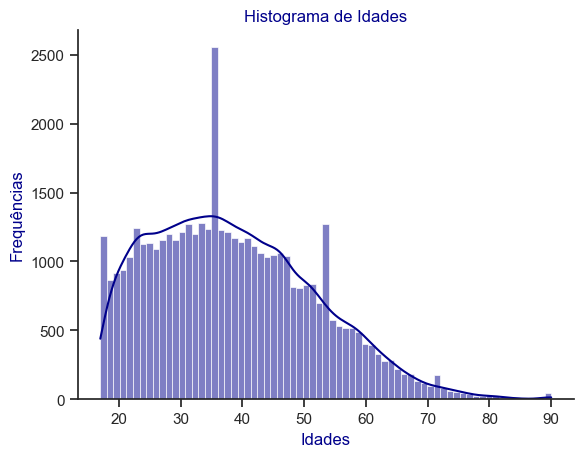

In [ ]:
grafico(1)
sns.histplot(dataset['Age'], color='darkblue', kde=True)
plt.xlabel('Idades',color='darkblue')
plt.ylabel('Frequências', color='darkblue')
plt.title('Histograma de Idades', color='darkblue')

De forma a melhor interpretação dos resultados a variável foi dividida em classes tendo em atenção a fórmula de [Sturges](https://geokrigagem.com.br/numero_classes_histograma_regra_sturges/), o que originou 16 classes. Para isto utilizamos o recursos do pandas [`.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html), como queriamos que o primeiro e utlimo intervalos tivessem uma amplitude diferente para manter a coerencia dos valores interios utilizamos [`.list()`](https://www.programiz.com/python-programming/methods/built-in/list), e dividimos um intervalo de mais de 16 **(intervalo aberto)** a 18 **(intervalo fechado)**, de mais de 18 anos até 86 dividido em intervalos de 5, depois acrescentamos um unico intervalo que contempla os valaores de restantes até ao máximo da nossa variável, para isto utilizamos conjugado com as listas a função [`.range()`](https://www.datacamp.com/tutorial/python-range-function?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=698229374827&utm_targetid=aud-517318241987:dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=20874&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-may24&gad_source=1&gclid=CjwKCAjwrvyxBhAbEiwAEg_Kgjqe53eyXs3dkPN9hiDyyy4VY1rS0_hmlnkD1L4a10TYWrC3RpPV5BoC2AgQAvD_BwE)


In [ ]:
nsturges = 1 + np.log2(len(dataset))
Ageclasses = pd.cut(dataset['Age'], bins=([16] + list(range(18, 86, 5)) + list(range(86, 91, 4)))).value_counts().sort_index()
Tabeladefreuqências = pd.DataFrame({'V.Absolutos': Ageclasses, 'V.Relativos (%)': Ageclasses * 100 / dataset.shape[0]}).round(2)
Tabeladefreuqências.index = "]" + Tabeladefreuqências.index.astype(str).str[1:-1] + "]"
pd.DataFrame(Tabeladefreuqências)

V.Absolutos  V.Relativos (%)
]16, 18]         1188             2.63
]18, 23]         4990            11.03
]23, 28]         5710            12.63
]28, 33]         6121            13.54
]33, 38]         6229            13.77
]38, 43]         5665            12.53
]43, 48]         4999            11.05
]48, 53]         3863             8.54
]53, 58]         2723             6.02
]58, 63]         1888             4.17
]63, 68]          998             2.21
]68, 73]          467             1.03
]73, 78]          218             0.48
]78, 83]           95             0.21
]83, 86]           15             0.03
]86, 90]           53             0.12

Na tabela anterior, e como por definição a função [`.DataFrame()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), atribui o primeiro ou ultimo intervalo com o parêntises "(" ou ")" em caso de [right=TRUE ou right=FALSE](https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut), respetivamente. 
Contudo eu quero utilizar as tabelas para ser mais prática a sua transposição para o word, assim sendo vamos fazer uma substituição simples que é no indice da variável criada que vamos denominar de label vamos forçar que inicie com "]" e termine "]" no caso de queremos um intervalo fechado no seu máximo (right=TRUE) e forçar que inicie com "[" e termine "[" no caso de queremos um intervalo fechado no seu minimo (right=FALSE). O que o comando faz é apaga os existentes e cria os referido no anterior.

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2281851950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Ageclasses.index.astype(str), y=Ageclasses.values, palette="pastel")


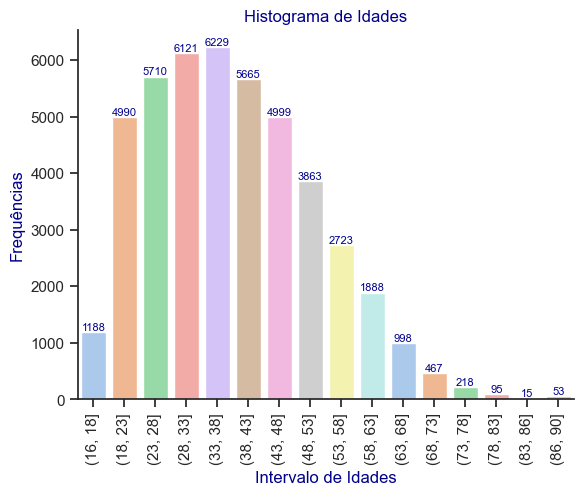

In [ ]:
grafico(1)
sns.barplot(x=Ageclasses.index.astype(str), y=Ageclasses.values, palette="pastel")
plt.xlabel('Intervalo de Idades',color='Darkblue')
plt.xticks(rotation=90)
plt.ylabel('Frequências', color='Darkblue')
plt.title('Histograma de Idades', color='Darkblue')
for i, valor in enumerate(Ageclasses.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom', color='Darkblue', fontsize=8)

Para facilitar a visualização do gráfico circular vamos dividir o a nossa classe idade por categorias sendo que a distribuição dos intervalos foi feita da seguinte forma:
| <center>**Intervalo de Idades**</center> |<center>**Categoria**</center>|
|--------------|----------------|
| <center>16 - 19</center>|<center>Adolescentes</center>|
| <center>20 - 39</center>|<center>Adultos Jovens</center>|
| <center>40 - 59</center>|<center>Adultos</center>|
| <center>≥ 60</center>|<center>Idosos</center>|



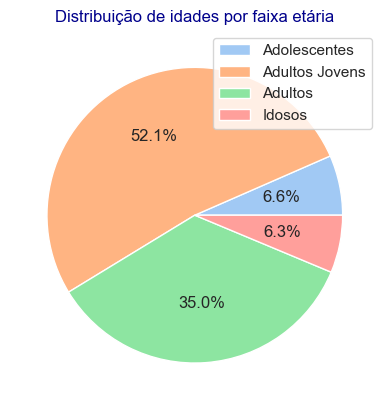

In [ ]:
idadesclasses=pd.cut(dataset['Age'],bins=[16, 20, 40, 60, float('inf')], labels=['Adolescentes','Adultos Jovens', 'Adultos','Idosos'])
grafico(1)
plt.pie(idadesclasses.value_counts().sort_index(), autopct='%1.1f%%')
plt.title('Distribuição de idades por faixa etária', color='Darkblue')
plt.legend(idadesclasses.value_counts().sort_index().index,loc='upper right')


<h2>1.3.-Exploração de Dados</h2>



Como a variável quantitativa *"education-num"* - é igual a variável qualitativa education por inerência os valores são os mesmos, logo a sua interpretação é igual [Variável qualitativa ordinal education](#secao33).

Estar a falar de medidas de tendência central e não central ou medidas de dispersão, estariamos a fazer inferência sobre um numero que representa uma classe a a sua interpretação seria errada.

Assim sendo iremos passar para a varável Quantitativa *"capital-gain"*

<a id="secao312"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [ ] **[Variável quantitativa capital-gain](#secao312)**
- [ ] [Variável quantitativa capital-loss](#secao313)
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

Tal como fizemos na [Variável quantitativa age](#secao310) irão ser criadas duas tabelas: uma com as **medidas de Tendencia central e não central** e outra com as **medidas de dispersão** [funções definidas no inicio do script](#secao0)


<a id="secao312"></a>

In [ ]:
tabela_medidas_tendencia(dataset).iloc[3:4]

index    count     mean      std  min  25%  50%  75%      max  \
3  capital-gain  45222.0  1101.43  7506.43  0.0  0.0  0.0  0.0  99999.0   

    Skew  Moda  
3  11.79   0.0

In [ ]:
tabela_medidas_disperção(dataset).iloc[3:4]

Variável   Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
3  capital-gain  56345246.6                     6.82                2019.77   

   Amplitude  Intervalo Inter-Quartil  Outliers  
3    99999.0                      0.0      3790

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3905354722.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataset['capital-gain'], kde=True, color='darkgreen', palette="pastel")


Text(0, 0.5, 'Frequências')

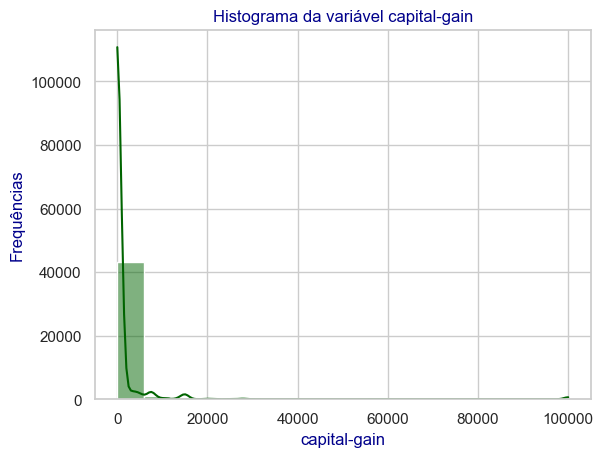

In [ ]:
grafico(3)
sns.histplot(dataset['capital-gain'], kde=True, color='darkgreen', palette="pastel")
plt.title('Histograma da variável capital-gain', color='darkblue')
plt.xlabel('capital-gain', color='darkblue')
plt.ylabel('Frequências',color='darkblue')

Text(0.5, 0, 'capital-gain')

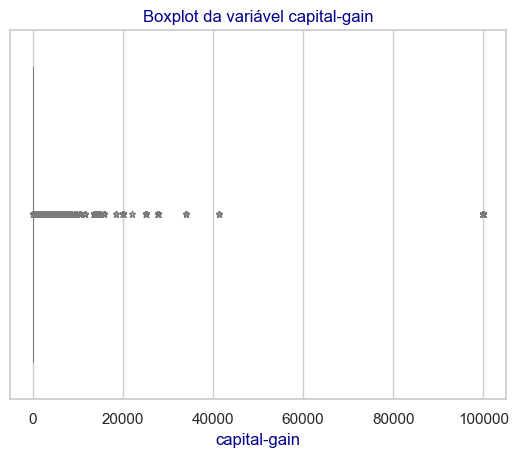

In [ ]:
grafico(3)
sns.boxplot(x=dataset['capital-gain'], linewidth=0.60, flierprops=dict(marker='*', markersize=5))
plt.title('Boxplot da variável capital-gain', color='Darkblue')
plt.xlabel('capital-gain', color='darkblue')

Da mesma forma como procedemos para a [Variável quantitativa age](#secao310) vamos criar classes para facilitar a interpretaçao da classe, sendo que neste caso vamos fazer diferente e vamos utilizar o [`min()`](https://www.w3schools.com/python/ref_func_min.asp) e [`máx()`](https://www.w3schools.com/python/ref_func_max.asp) da nossa variável para definir o limite minimo e limite máximo correspondentemente. a divisão dos intervalos das classes, foi feita de forma a termos os intervalos com a mesma amplitude com a expeção ultimo. Faz sentido tal como no anterior fechar os intervalos a esquerda por uma questão de lógica na interpretação da variável. 

In [ ]:
capitalgainporclasse=pd.cut(dataset['capital-gain'], bins= [min(dataset['capital-gain'])]+ [6000, 12000,18000,24000,30000,36000,42000,90000]+[max(dataset['capital-gain'])+1],right=False).value_counts().sort_index()
Tabeladefreuqências = pd.DataFrame({'V. Absolutos':capitalgainporclasse,'V. Relativos (%)':(capitalgainporclasse*100/dataset.shape[0]).round(2)})
Tabeladefreuqências.index = "[" + Tabeladefreuqências.index.astype(str).str[1:-1] + "["
pd.DataFrame(Tabeladefreuqências)

V. Absolutos  V. Relativos (%)
[0.0, 6000.0[               43169             95.46
[6000.0, 12000.0[            1059              2.34
[12000.0, 18000.0[            637              1.41
[18000.0, 24000.0[             47              0.10
[24000.0, 30000.0[             74              0.16
[30000.0, 36000.0[              4              0.01
[36000.0, 42000.0[              3              0.01
[42000.0, 90000.0[              0              0.00
[90000.0, 100000.0[           229              0.51

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1781155504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=capitalgainporclasse.index,y=capitalgainporclasse.values, palette="pastel")


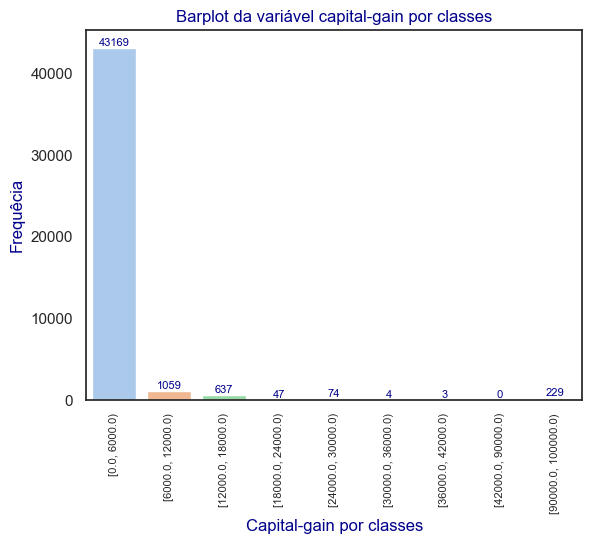

In [ ]:
grafico(2)
sns.barplot(x=capitalgainporclasse.index,y=capitalgainporclasse.values, palette="pastel")
plt.title('Barplot da variável capital-gain por classes', color='Darkblue')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Capital-gain por classes', color='Darkblue')
plt.ylabel('Frequêcia',color='Darkblue')
for i, value in enumerate(capitalgainporclasse.values):
    plt.text(i, value+250, str(value), ha='center', color='darkblue', fontsize=8)

Text(0.5, 1.0, 'Distribuição da variável capital-gain por classes')

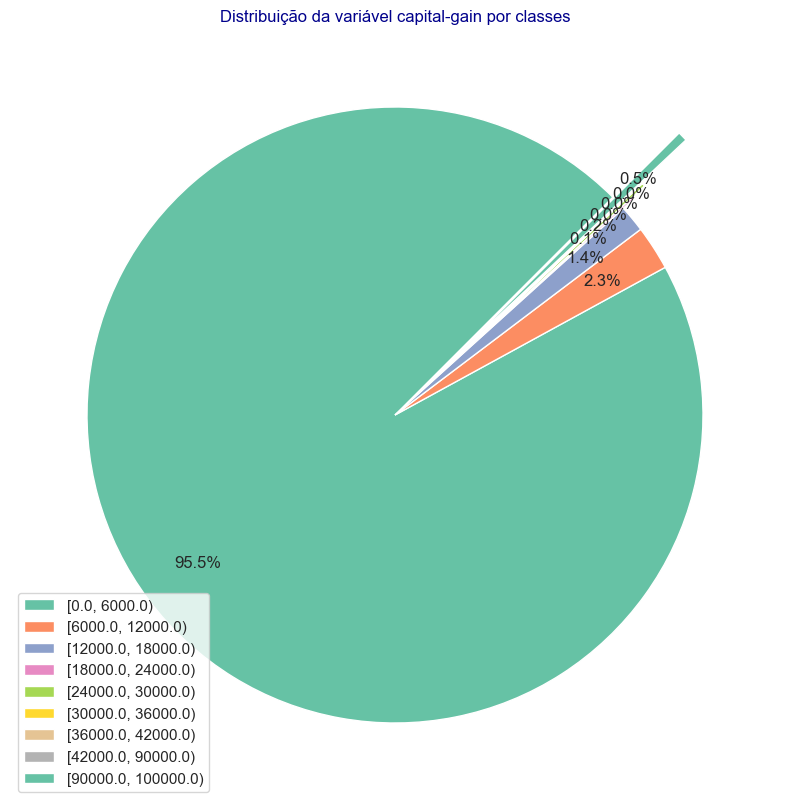

In [ ]:
grafico(2)
plt.figure(figsize=(10,10))
plt.pie(capitalgainporclasse, autopct='%1.1f%%', pctdistance=0.8, startangle=45,explode=(0,0,0,0.05,0.1,0.15,0.2,0.25,0.3))
plt.legend(capitalgainporclasse.index, loc='lower left')
plt.title('Distribuição da variável capital-gain por classes', color='darkblue')


<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [X] [Variável quantitativa capital-gain](#secao312)
- [ ] **[Variável quantitativa capital-loss](#secao313)**
- [ ] [Variável quantitativa fnlwgt](#secao314)
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

Vamos agora analisar a varável quantitativa *"capital-loss"* inciando com as as **medidas de Tendencia central e não central** e outra com as **medidas de dispersão** [funções definidas no inicio do script](#secao0) seguidas dos gráficos correspondentes para uma correta análise da variável.

<a id="secao313"></a>

In [ ]:
tabela_medidas_tendencia(dataset).iloc[4:5]

index    count  mean     std  min  25%  50%  75%     max  Skew  Moda
4  capital-loss  45222.0  88.6  404.96  0.0  0.0  0.0  0.0  4356.0  4.52   0.0

In [ ]:
tabela_medidas_disperção(dataset).iloc[4:5]

Variável  Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
4  capital-loss  163985.81                     4.57                 168.81   

   Amplitude  Intervalo Inter-Quartil  Outliers  
4     4356.0                      0.0      2140

Text(0, 0.5, 'Frequencia')

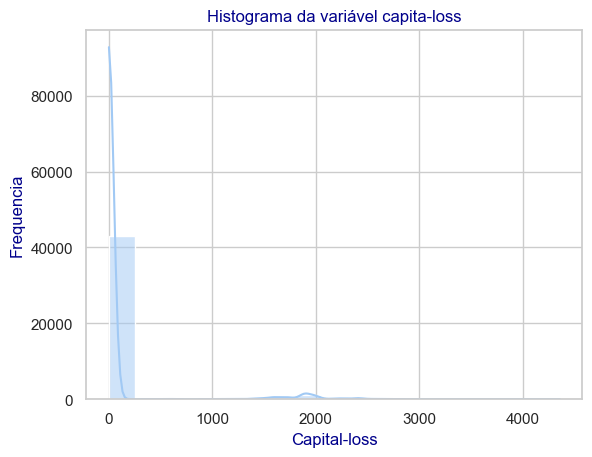

In [ ]:
grafico(3)
sns.histplot(dataset['capital-loss'], kde=True)
plt.title('Histograma da variável capita-loss', color='darkblue')
plt.xlabel('Capital-loss',color='darkblue')
plt.ylabel('Frequencia', color='darkblue')

Text(0.5, 1.0, 'Boxplot da variável capital-loss')

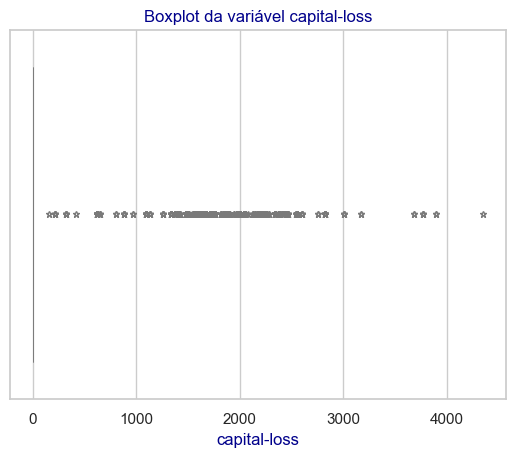

In [ ]:
grafico(3)
sns.boxplot(x=dataset['capital-loss'],linewidth=0.60, flierprops=dict(marker='*', markersize=5))
plt.xlabel('capital-loss', color='darkblue')
plt.title('Boxplot da variável capital-loss', color='darkblue')

Tal como na variável [Variável quantitativa capital-gain](#secao312), esta foi dividia em classes de rendimentos de forma a facilitar a sua análise, de referir que nesta variável, mesmo os valores sendo positivos, os mesmos representam perda, o que em termos matemáticos são numeros "negativos". Faz sentido tal como no anterior fechar os intervalos a esquerda por uma questão de lógica na interpretação da variável. 

In [ ]:
capitallossporclasse=pd.cut(dataset['capital-loss'], bins= [min(dataset['capital-loss'])]+ [500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000]+[max(dataset['capital-loss'])+1],right=False).value_counts().sort_index()
Tabeladefreuqências=pd.DataFrame({'V. Absolutos':capitallossporclasse,'V. Relativos (%)':(capitallossporclasse*100/dataset.shape[0]).round(2)})
Tabeladefreuqências.index = "[" + Tabeladefreuqências.index.astype(str).str[1:-1] + "["
pd.DataFrame(Tabeladefreuqências)

V. Absolutos  V. Relativos (%)
[0.0, 500.0[             43094             95.29
[500.0, 750.0[              21              0.05
[750.0, 1000.0[             10              0.02
[1000.0, 1250.0[            15              0.03
[1250.0, 1500.0[           130              0.29
[1500.0, 1750.0[           514              1.14
[1750.0, 2000.0[           988              2.18
[2000.0, 2250.0[           197              0.44
[2250.0, 2500.0[           197              0.44
[2500.0, 2750.0[            27              0.06
[2750.0, 3000.0[            14              0.03
[3000.0, 3250.0[             6              0.01
[3250.0, 3500.0[             0              0.00
[3500.0, 3750.0[             2              0.00
[3750.0, 4000.0[             6              0.01
[4000.0, 4357.0[             1              0.00

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1977229953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=capitallossporclasse.index, y=capitallossporclasse.values, palette="pastel")


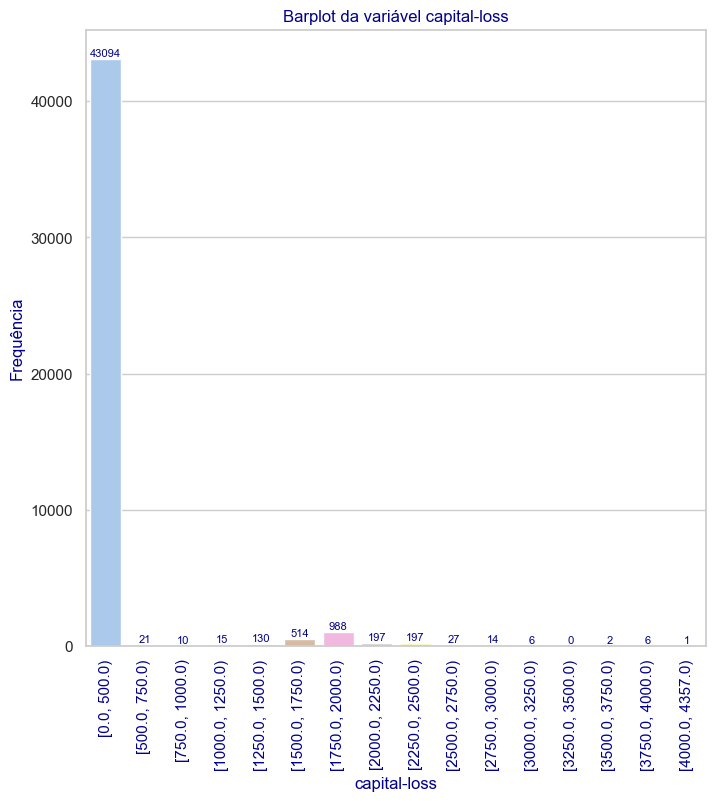

In [ ]:
grafico(3)
plt.figure(figsize=(8,8))
sns.barplot(x=capitallossporclasse.index, y=capitallossporclasse.values, palette="pastel")
plt.title('Barplot da variável capital-loss',color="darkblue")
plt.xlabel('capital-loss', color='darkblue')
plt.ylabel('Frequência', color='Darkblue')
plt.xticks(rotation=90, color='darkblue')
for i, value in enumerate(capitallossporclasse.values):
    plt.text(i, value+200, str(value), color='darkblue', ha='center', fontsize=8)


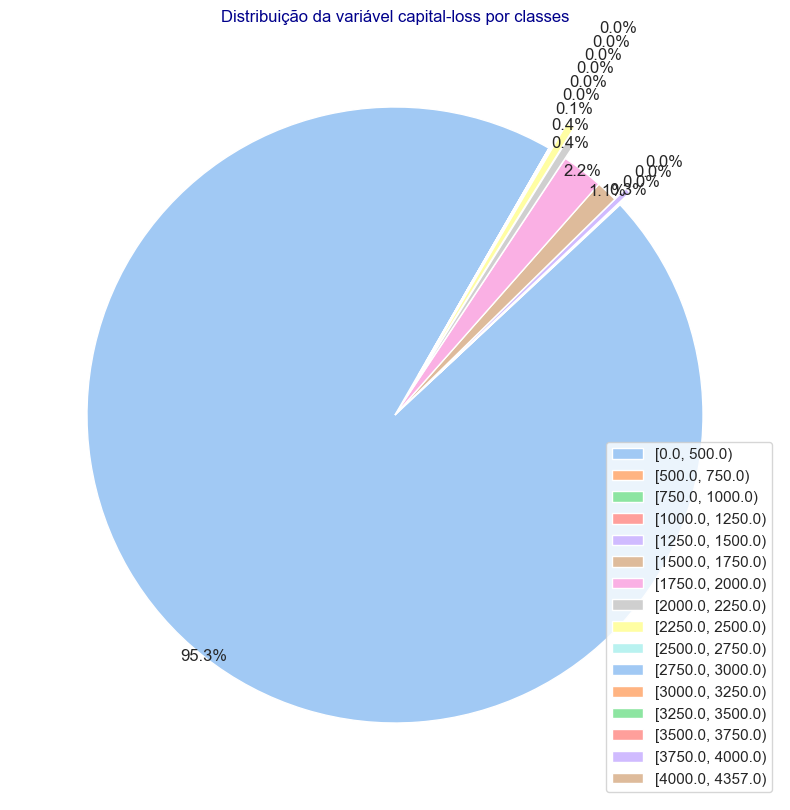

In [ ]:
grafico(3)
plt.figure(figsize=(10,10))
plt.pie(capitallossporclasse, autopct='%1.1f%%', pctdistance=1, startangle=60, explode=(0,0.2,0.15,0.1,0.05,0,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45))
plt.title('Distribuição da variável capital-loss por classes', color='darkblue')
plt.legend(capitallossporclasse.index, loc='lower right')

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [X] [Variável quantitativa capital-gain](#secao312)
- [X] [Variável quantitativa capital-loss](#secao313)
- [ ] **[Variável quantitativa fnlwgt](#secao314)**
- [ ] [Variável quantitativa hours-per-week](#secao315)
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

Na análise inicial a variável *fnlwgt* tinhamos concluido que mesma não tinha dentro do nosso dataset um valor considerado lógico para uma análise estatistica de forma coerente. Contudo e no [site](https://archive.ics.uci.edu/dataset/2/adult) onde retiramos o nosso dataset conseguimos identificar que a filtragem inicial ao dataset original foi feita da seguinte forma **((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))**. A formula anterior faz sentido uma vez que assumingo que a condição **AAGE>16** se refere a nossa variável *Age*, é lógico afirmar que os individuso que irão ganhar mais de $50.000 são os individuos que trabalham e que têm rendimentos, logo filtrar pela idade de 16 anos, é um passo fundamental (iremos ver mais a frente que a filtragem pela idade poderia ser um pouco mais ambicionsa, mais concretamente 18anos). A condicção **(AGI>100)** que corresponde ao *[Adjusted Gross Income](https://www.hrblock.com/tax-center/income/other-income/what-is-adjusted-gross-income-and-taxable-income/)* que pretende identificar em suma quem tem ganhos maiores do que 100. Outra condição é **(AFNLWGT>1)** que descreve o *anual final weight* que em suma é um peso que garanta que aquele individuo é classificado como um elemento com algum tipo de rendimentos. E por fim a condição **(HRSWK>0)**, que garanta que o numero de horas de trabalho é superior a 0, havendo assim registo de horas trabalhadas logo, considerado trabalhado.
Isto para explicar que o nasso variável *fnlwgt* está de certaforma associada a condição anterior e a mesma representa um peso que é condicionado de acordo com uma formula de atribuição que não sabemos. Não havendo um capacidade anlita da nossa variável *fnlwgt*  vamos na mesma fazer as tabelas de **medidas de Tendencia central e não central** e de **medidas de dispersão** [funções definidas no inicio do script](#secao0), seguido dos gráficos da variável, contudo a análise das mesmas vai ficar condicionada.

<a id="secao314"></a>

In [ ]:
tabela_medidas_disperção(dataset).iloc[1:2]

Variável     Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
1   fnlwgt  1.115939e+10                     0.56               77814.75   

   Amplitude  Intervalo Inter-Quartil  Outliers  
1  1476908.0                120537.75      1331

In [ ]:
tabela_medidas_tendencia(dataset).iloc[1:2]

index    count       mean       std      min        25%       50%  \
1  fnlwgt  45222.0  189734.73  105639.2  13492.0  117388.25  178316.0   

        75%        max  Skew      Moda  
1  237926.0  1490400.0  1.45  203488.0

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\475266643.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataset['fnlwgt'], kde=True, palette="pastel")


Text(0, 0.5, 'Frequencias')

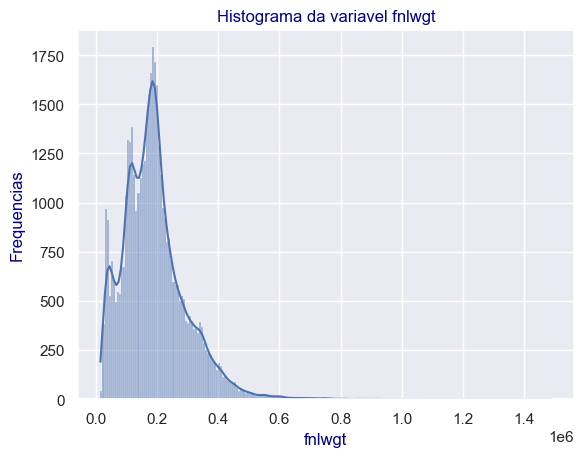

In [ ]:
grafico(4)
sns.histplot(dataset['fnlwgt'], kde=True, palette="pastel")
plt.xlabel('fnlwgt', color='darkblue')
plt.title('Histograma da variavel fnlwgt', color='Darkblue')
plt.ylabel('Frequencias', color='Darkblue')

Text(0.5, 1.0, 'Boxplot da variavel fnlwgt')

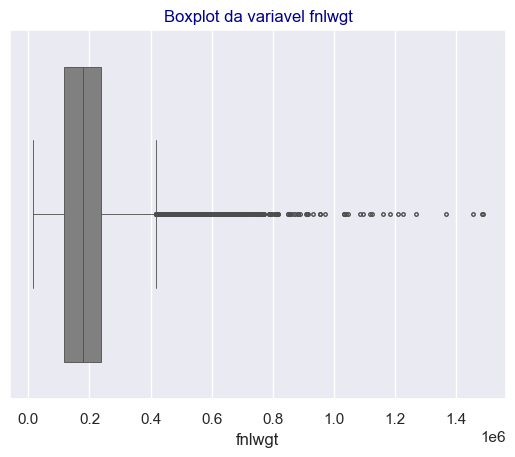

In [ ]:
grafico(4)
sns.boxplot(x=dataset['fnlwgt'],linewidth=0.60, flierprops=dict(marker='.', markersize=5), color='grey')
plt.title('Boxplot da variavel fnlwgt', color='darkblue')

In [ ]:
fnlwgtporclasses=pd.cut(dataset['fnlwgt'], bins=16, right=True, include_lowest=True).value_counts().sort_index()
pd.DataFrame({'V. Absolutos':fnlwgtporclasses, 'V. Relativos (%)':(fnlwgtporclasses*100/dataset.shape[0]).round(2)})
Tabeladefreuqências.index = "]" + Tabeladefreuqências.index.astype(str).str[1:-1] + "]"
pd.DataFrame(Tabeladefreuqências)

V. Absolutos  V. Relativos (%)
]0.0, 500.0]             43094             95.29
]500.0, 750.0]              21              0.05
]750.0, 1000.0]             10              0.02
]1000.0, 1250.0]            15              0.03
]1250.0, 1500.0]           130              0.29
]1500.0, 1750.0]           514              1.14
]1750.0, 2000.0]           988              2.18
]2000.0, 2250.0]           197              0.44
]2250.0, 2500.0]           197              0.44
]2500.0, 2750.0]            27              0.06
]2750.0, 3000.0]            14              0.03
]3000.0, 3250.0]             6              0.01
]3250.0, 3500.0]             0              0.00
]3500.0, 3750.0]             2              0.00
]3750.0, 4000.0]             6              0.01
]4000.0, 4357.0]             1              0.00

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1838861091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fnlwgtporclasses.index, y=fnlwgtporclasses.values, palette="pastel")


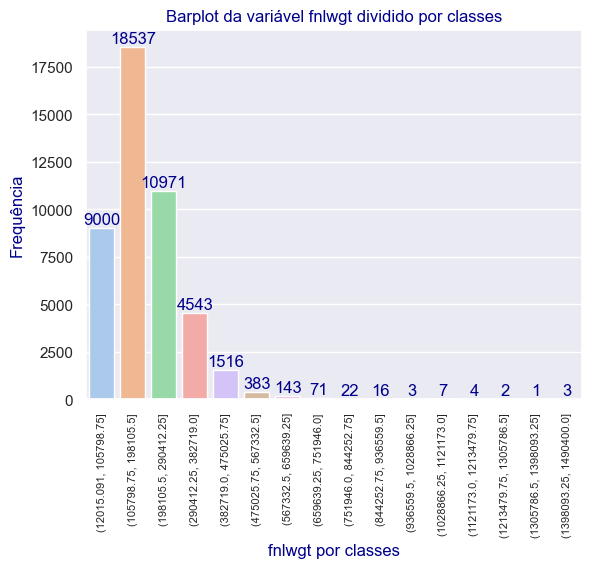

In [ ]:
grafico(4)
sns.barplot(x=fnlwgtporclasses.index, y=fnlwgtporclasses.values, palette="pastel")
plt.title('Barplot da variável fnlwgt dividido por classes', color='darkblue')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('fnlwgt por classes',color='darkblue')
plt.ylabel('Frequência',color='darkblue')
for i, value in enumerate(fnlwgtporclasses.values):
    plt.text(i, value+200, str(value), ha='center', color='darkblue')

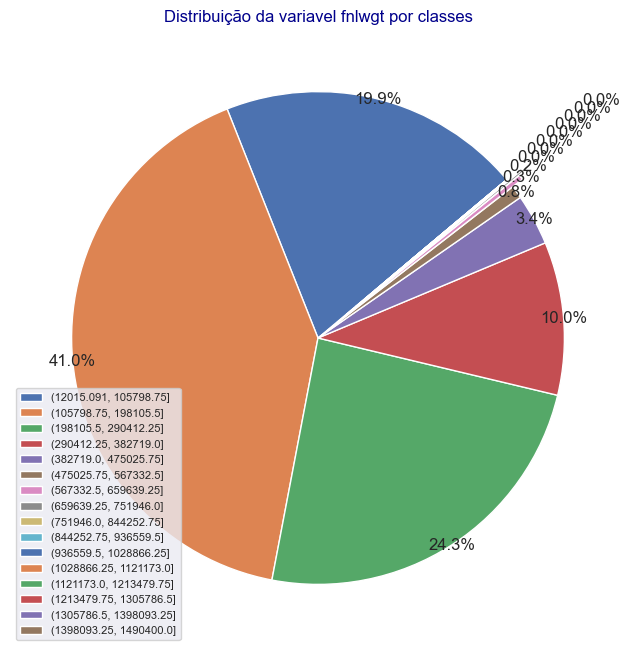

In [ ]:
grafico(4)
plt.figure(figsize=(8,8))
plt.pie(fnlwgtporclasses, autopct='%1.1f%%', pctdistance=1, startangle=40,explode=(0,0,0,0,0,0,0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5))
plt.title('Distribuição da variavel fnlwgt por classes', color='darkblue')
plt.legend(fnlwgtporclasses.index, loc='lower left', fontsize=8)

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [X] [Variável quantitativa capital-gain](#secao312)
- [X] [Variável quantitativa capital-loss](#secao313)
- [X] [Variável quantitativa fnlwgt](#secao314)
- [ ] **[Variável quantitativa hours-per-week](#secao315)**<a id="secao315"></a>
- [ ] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)


Tal como temos feito nas variáveis quantitativas anteriores vamos começar pela análise das tabelas de **medidas de Tendencia central e não central** e de **medidas de dispersão** [funções definidas no inicio do script](#secao0) seguido dos seus gráficos.

<a id="secao315"></a>

In [ ]:
tabela_medidas_disperção(dataset).iloc[3:4]

Variável   Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
3  capital-gain  56345246.6                     6.82                2019.77   

   Amplitude  Intervalo Inter-Quartil  Outliers  
3    99999.0                      0.0      3790

In [ ]:
tabela_medidas_tendencia(dataset).iloc[3:4]

index    count     mean      std  min  25%  50%  75%      max  \
3  capital-gain  45222.0  1101.43  7506.43  0.0  0.0  0.0  0.0  99999.0   

    Skew  Moda  
3  11.79   0.0

Text(0.5, 1.0, 'Boxplot das horas de trabalho por semana')

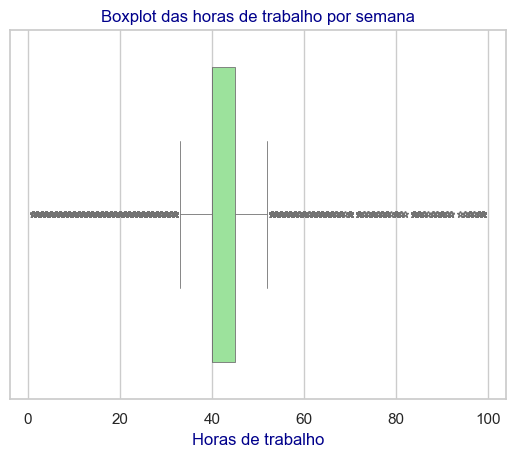

In [ ]:
grafico(3)
sns.boxplot(x=dataset['hours-per-week'], color='lightgreen', linewidth=0.60, flierprops=dict(marker='*', markersize=5))
plt.xlabel('Horas de trabalho', color='darkblue')
plt.title('Boxplot das horas de trabalho por semana', color='darkblue')


C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2625150112.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataset['hours-per-week'], color='darkblue', kde=True, palette="pastel")


Text(0.5, 1.0, 'Histograma das horas de trabalho por semana')

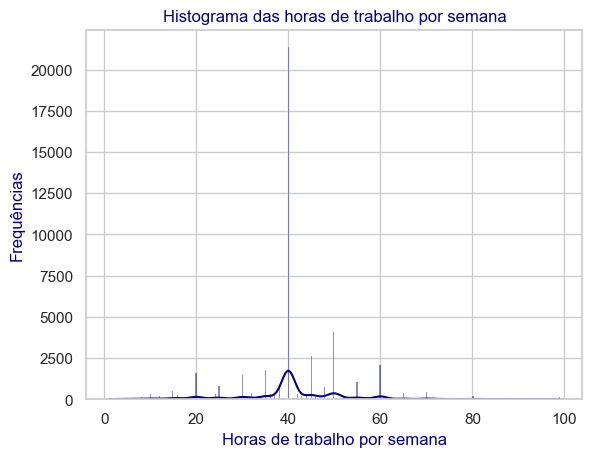

In [ ]:
grafico(3)
sns.histplot(dataset['hours-per-week'], color='darkblue', kde=True, palette="pastel")
plt.xlabel('Horas de trabalho por semana', color='Darkblue')
plt.ylabel('Frequências',color='Darkblue')
plt.title('Histograma das horas de trabalho por semana',color='darkblue')

Vamos ver a quantidade de horas que a variável horas de trabalho por semana têm.

Esta variável, tal como as anteriores, faz sentido analisar em forma de classes respeitando os 16 intervalos de sturges, e iniciando no min da variável finalizando no máximo da mesma, com intervalos abertos a esquerda.

In [ ]:

horasporclasses=pd.cut(dataset['hours-per-week'], bins=([min(dataset['hours-per-week'])]+ [8, 14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, 86, 92] + [max(dataset['hours-per-week'])])).value_counts().sort_index()
Tabeladefreuqências=pd.DataFrame({'V.Absoluta': horasporclasses,'V.Relativas(%)': (horasporclasses*100/dataset.shape[0]).round(2)})
Tabeladefreuqências.index = "]" + Tabeladefreuqências.index.astype(str).str[1:-1] + "]"
pd.DataFrame(Tabeladefreuqências)

V.Absoluta  V.Relativas(%)
]1.0, 8.0]           409            0.90
]8.0, 14.0]          636            1.41
]14.0, 20.0]        2545            5.63
]20.0, 26.0]        1292            2.86
]26.0, 32.0]        2024            4.48
]32.0, 38.0]        3107            6.87
]38.0, 44.0]       22322           49.36
]44.0, 50.0]        7674           16.97
]50.0, 56.0]        1465            3.24
]56.0, 62.0]        2174            4.81
]62.0, 68.0]         428            0.95
]68.0, 74.0]         522            1.15
]74.0, 80.0]         316            0.70
]80.0, 86.0]          90            0.20
]86.0, 92.0]          55            0.12
]92.0, 99.0]         151            0.33

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\24796749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=horasporclasses.index,y=horasporclasses.values, palette="pastel")


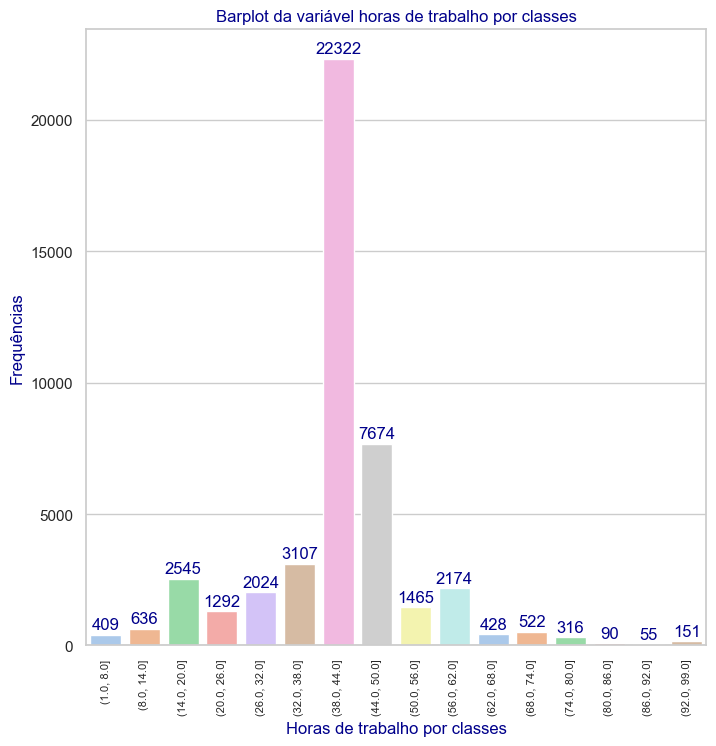

In [ ]:
grafico(3)
plt.figure(figsize=(8,8))
sns.barplot(x=horasporclasses.index,y=horasporclasses.values, palette="pastel")
plt.title('Barplot da variável horas de trabalho por classes', color='Darkblue')
plt.xlabel('Horas de trabalho por classes', color='darkblue')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Frequências', color='darkblue')
for i, value in enumerate(horasporclasses.values):
    plt.text(i,value+200,str(value), ha='center', color='darkblue')

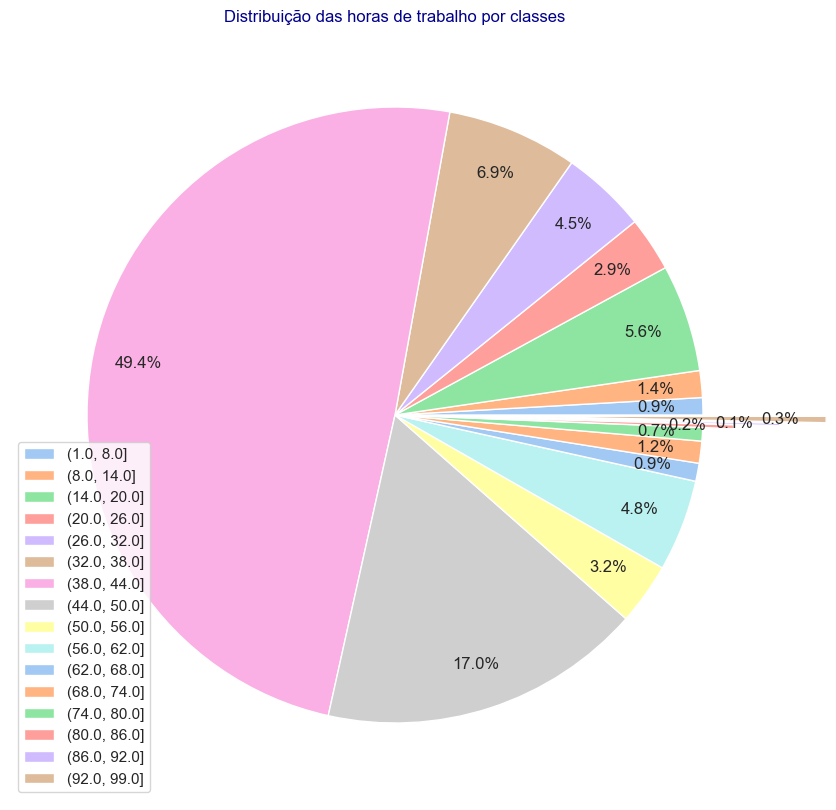

In [ ]:
grafico(3)
plt.figure(figsize=(10,10))
plt.pie(horasporclasses, autopct='%1.1f%%', pctdistance=0.85, explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.25,0.4))
plt.title('Distribuição das horas de trabalho por classes', color='darkblue')
plt.legend(horasporclasses.index, loc='lower left')

<h2>1.3.-Exploração de Dados</h2>

<a id="secao316"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [X] [Variável quantitativa capital-gain](#secao312)
- [X] [Variável quantitativa capital-loss](#secao313)
- [X] [Variável quantitativa fnlwgt](#secao314)
- [X] [Variável quantitativa hours-per-week](#secao315)
- [ ] **[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)**
- [ ] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

Vamos agora estudar a correlação entre as variáveis e a nossa variável alvo, vamos converter todas as variáveis para o tipo categorico e inteiro de forma a podermos aplicar formulas de correlação entre variáveis para isto vamos criar um *dataset dummy*, apenas com este efeito. Vamos gravar o nosso dataset para que possamos voltar a utilizar o mesmo sem as alterações que iremos fazer daqui para a frente.

<a id="secao316"></a>

In [ ]:
dataset.to_csv('Adult.csv', index=False)

In [ ]:
dataset['race']=dataset['race'].astype('category').cat.codes
dataset['Workclass']=dataset['Workclass'].astype('category').cat.codes
dataset['marital-status']=dataset['marital-status'].astype('category').cat.codes
dataset['occupation']=dataset['occupation'].astype('category').cat.codes
dataset['relationship']=dataset['relationship'].astype('category').cat.codes
dataset['gender'] = dataset['gender'].replace({'Male': 0, 'Female': 1}).astype('category').cat.codes
dataset['native-country']=dataset['native-country'].astype('category').cat.codes
dataset['income'] = dataset['income'].replace({'>50K': 1, '<=50K': 0}).astype('category').cat.codes
dataset['education'] = dataset['education'].str.strip().replace({'Preschool': 1,'1st-4th': 2,'5th-6th': 3,'7th-8th': 4,'9th': 5,'10th': 6,'11th': 7,'12th': 8,'HS-grad': 9,'Some-college': 10,'Assoc-voc': 11,'Assoc-acdm': 1,'Bachelors': 13,'Masters': 14,'Prof-school': 15,'Doctorate': 16}).astype('int')
dataset.corr().round(2)

Age  Workclass  fnlwgt  education  education-num  \
Age             1.00       0.09   -0.08       0.04           0.04   
Workclass       0.09       1.00   -0.03       0.04           0.04   
fnlwgt         -0.08      -0.03    1.00      -0.04          -0.04   
education       0.04       0.04   -0.04       1.00           0.76   
education-num   0.04       0.04   -0.04       0.76           1.00   
marital-status -0.27      -0.03    0.03      -0.04          -0.06   
occupation     -0.00       0.02   -0.00       0.08           0.09   
relationship   -0.25      -0.07    0.01      -0.08          -0.09   
race            0.02       0.05   -0.03       0.03           0.03   
gender          0.08       0.07    0.03       0.02           0.00   
capital-gain    0.08       0.03   -0.00       0.12           0.13   
capital-loss    0.06       0.01   -0.00       0.07           0.08   
hours-per-week  0.10       0.05   -0.02       0.12           0.15   
native-country -0.00       0.00   -0.06       0.07           0.09   
income          0.24       0.02   -0.01       0.28           0.33   

                marital-status  occupation  relationship  race  gender  \
Age                      -0.27       -0.00         -0.25  0.02    0.08   
Workclass                -0.03        0.02         -0.07  0.05    0.07   
fnlwgt                    0.03       -0.00          0.01 -0.03    0.03   
education                -0.04        0.08         -0.08  0.03    0.02   
education-num            -0.06        0.09         -0.09  0.03    0.00   
marital-status            1.00        0.02          0.18 -0.07   -0.12   
occupation                0.02        1.00         -0.05 -0.00    0.06   
relationship              0.18       -0.05          1.00 -0.12   -0.58   
race                     -0.07       -0.00         -0.12  1.00    0.09   
gender                   -0.12        0.06         -0.58  0.09    1.00   
capital-gain             -0.04        0.02         -0.06  0.01    0.05   
capital-loss             -0.03        0.02         -0.06  0.02    0.05   
hours-per-week           -0.18        0.02         -0.26  0.04    0.23   
native-country           -0.02       -0.00         -0.01  0.12   -0.00   
income                   -0.19        0.05         -0.25  0.07    0.22   

                capital-gain  capital-loss  hours-per-week  native-country  \
Age                     0.08          0.06            0.10           -0.00   
Workclass               0.03          0.01            0.05            0.00   
fnlwgt                 -0.00         -0.00           -0.02           -0.06   
education               0.12          0.07            0.12            0.07   
education-num           0.13          0.08            0.15            0.09   
marital-status         -0.04         -0.03           -0.18           -0.02   
occupation              0.02          0.02            0.02           -0.00   
relationship           -0.06         -0.06           -0.26           -0.01   
race                    0.01          0.02            0.04            0.12   
gender                  0.05          0.05            0.23           -0.00   
capital-gain            1.00         -0.03            0.08            0.01   
capital-loss           -0.03          1.00            0.05            0.01   
hours-per-week          0.08          0.05            1.00            0.01   
native-country          0.01          0.01            0.01            1.00   
income                  0.22          0.15            0.23            0.02   

                income  
Age               0.24  
Workclass         0.02  
fnlwgt           -0.01  
education         0.28  
education-num     0.33  
marital-status   -0.19  
occupation        0.05  
relationship     -0.25  
race              0.07  
gender            0.22  
capital-gain      0.22  
capital-loss      0.15  
hours-per-week    0.23  
native-country    0.02  
income            1.00

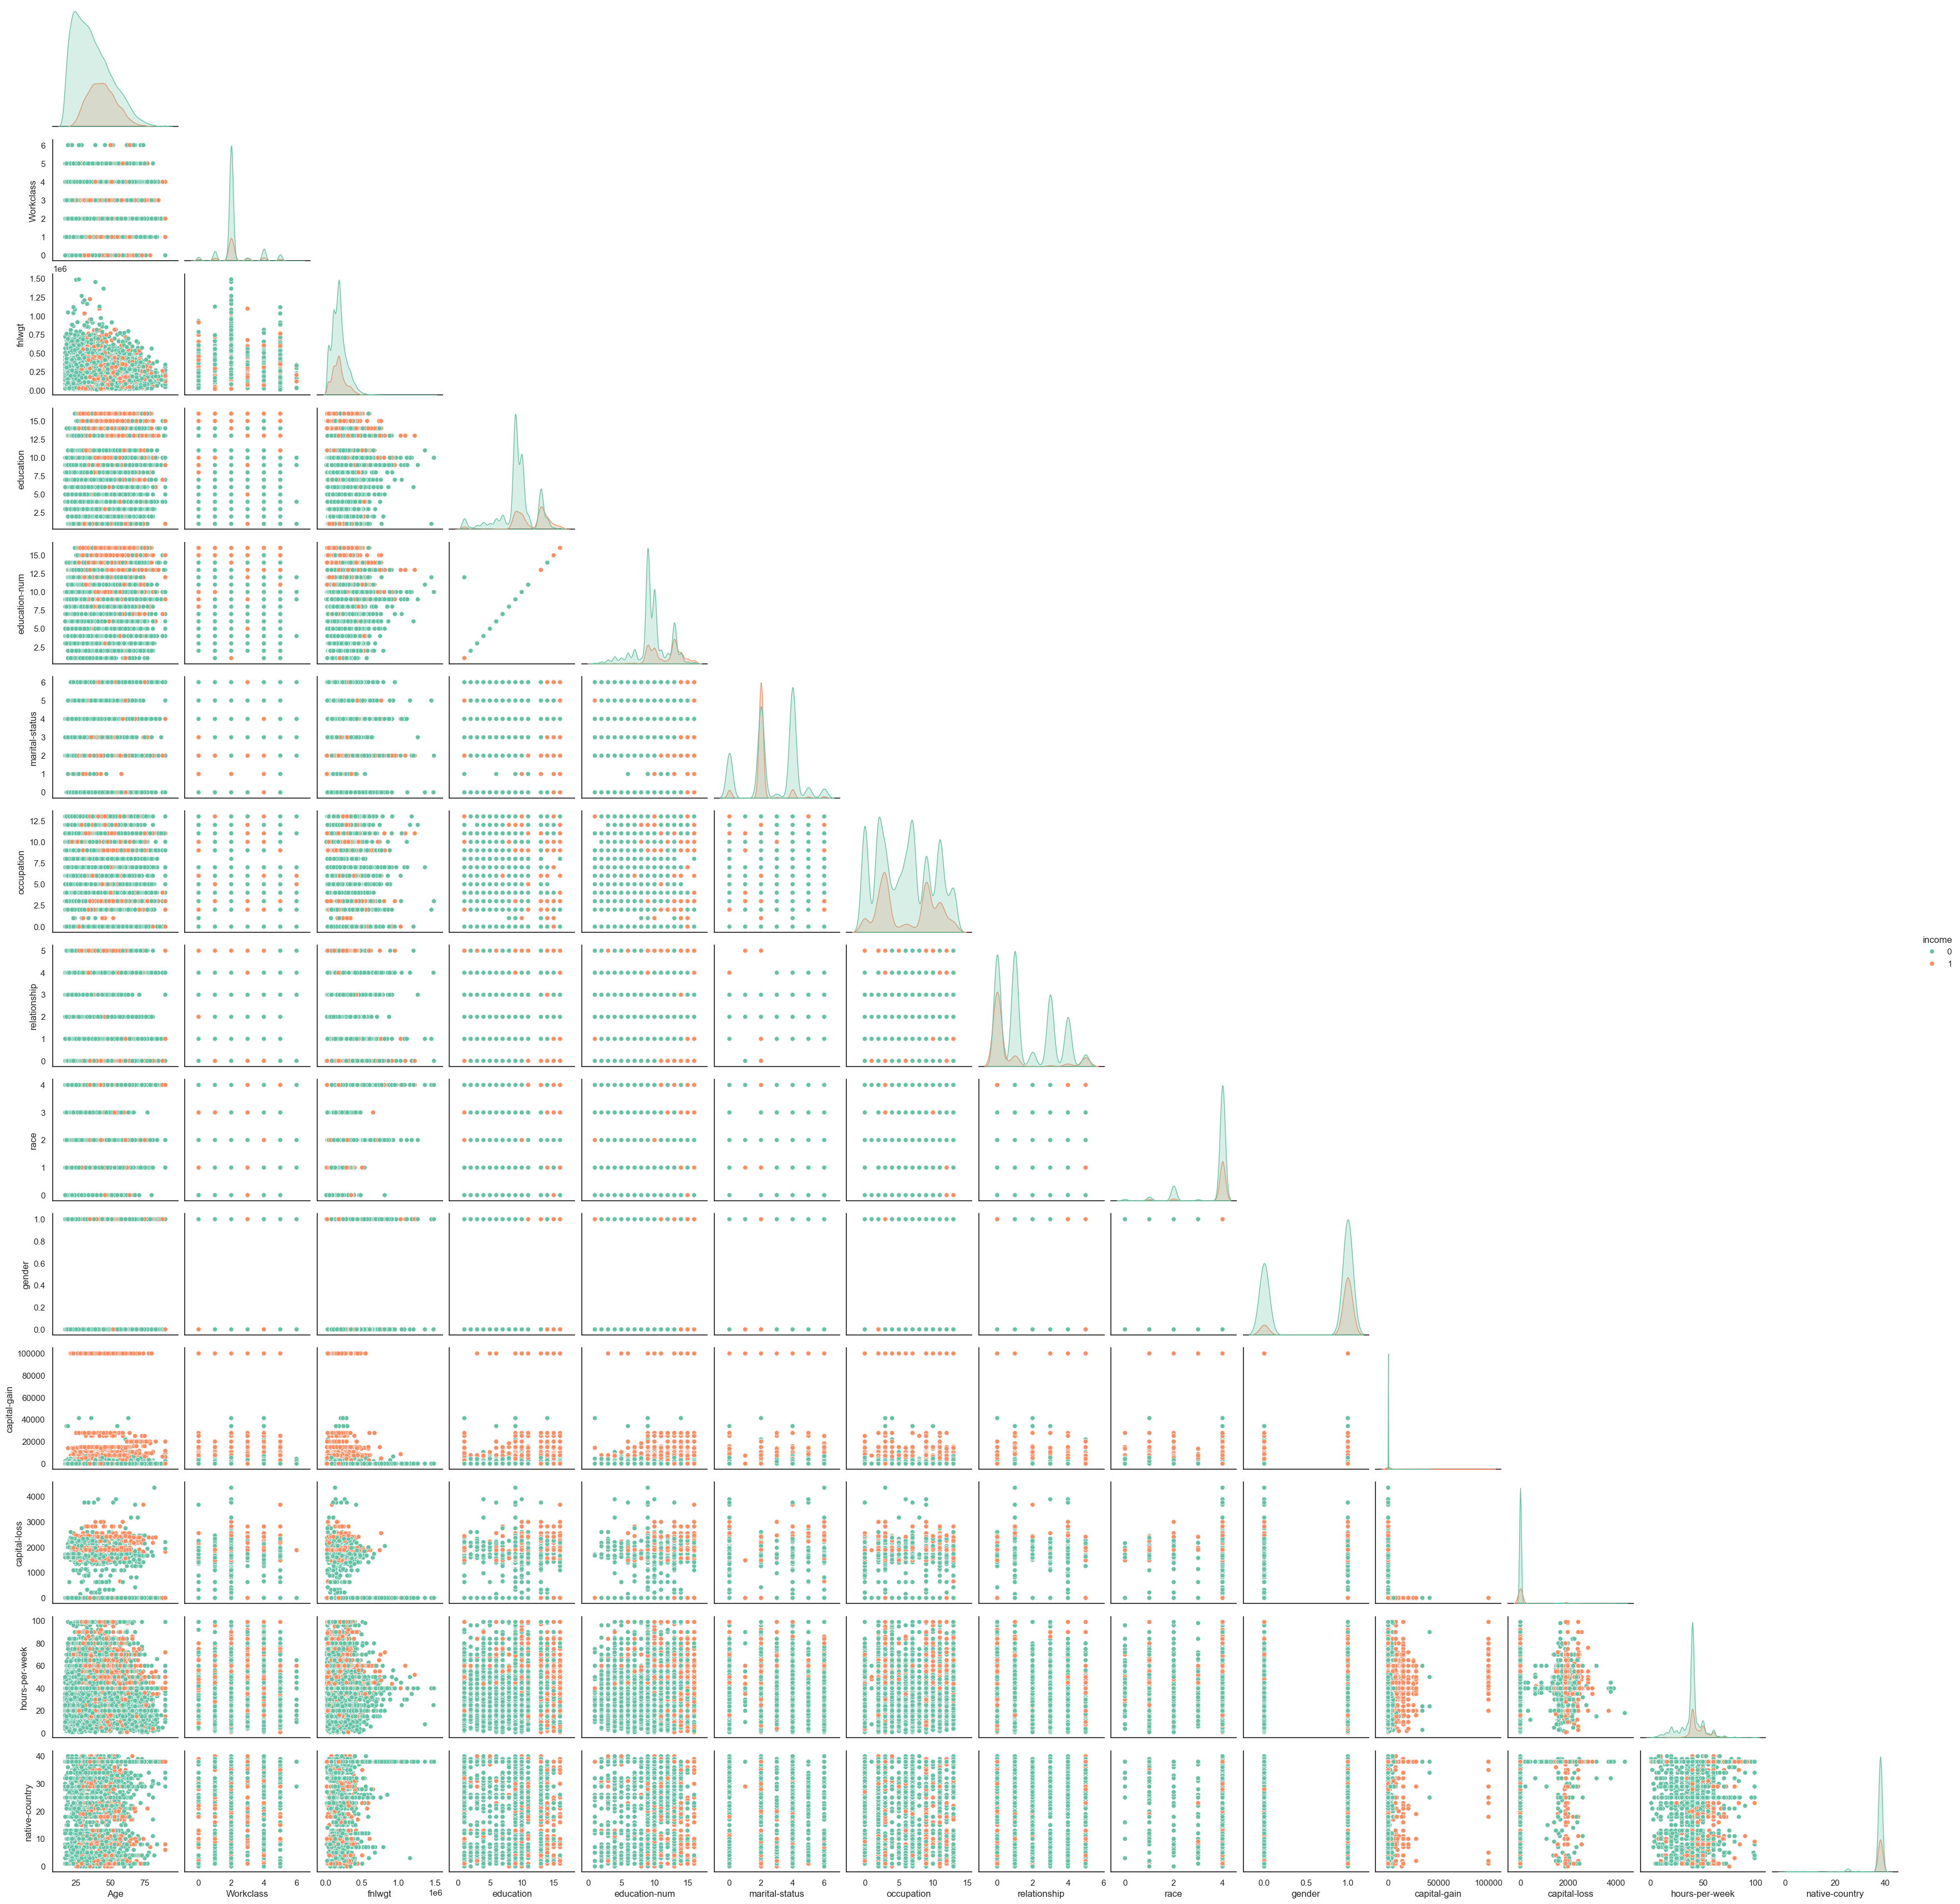

In [ ]:
grafico(2)
sns.pairplot(dataset, hue="income", corner=True)

Text(0.5, 1.0, 'Gráfico de correlação das variáveis com o nosso dataset')

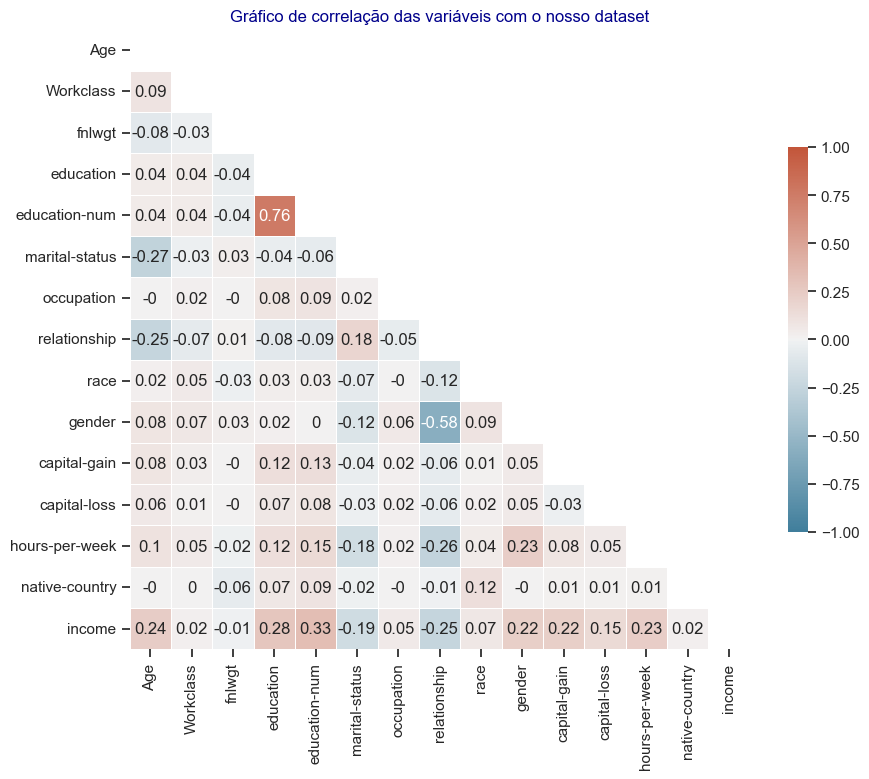

In [ ]:
grafico(1)
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr().round(2),annot=True,mask=np.triu(np.ones_like(dataset.corr(), dtype=bool)) 
,cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=1, vmin=-1, 
center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Gráfico de correlação das variáveis com o nosso dataset', color='Darkblue')

Como vimos pelo gráfico anterior não pareçe existir uma relação linear entre as nossas variáveis em relação a nossa variável algo,  uma vez que as variáveis qualitativas não adequadas para se fazerem testes de correlação, vamos agora fazer o mesmo mas apenas ao conjunto de variáveis quantitativas.
Da análise do gráfico anterior complementado com a tabela, conseguimos identificar que como já tínhamos concluído anteriormente a variável “education-num” e a variável “education” têm um fator de correlação muito forte, o que significa que que é uma variável com muita redundância. 
No que diz respeito á nossa variável alvo, podemos dizer que as variáveis que tem uma menor correlação são as variáveis *“fnlwgt”*, *“native-country”* e *“workclass”* que apresentam valores perto do 0, podendo ser candidatas a serem removidas do dataset. As variáveis *“relationship”* e *“marital-status”* apresentam uma correlação negativa com uma razoável correlação com a variável *“income”* e as restantes variáveis apresentam uma correlação positiva sendo que as que se destacam mais são as variareis *“Age”*, *“education/education-num”*, *“gender”*, *“hours-per-week”*, assim como as variáveis *“capital-gain”* e *“capital-loss“*.

Para a análise da correlação entre as variáveis vamos utilizar a seguinte tabela, de acordo com [Cohen(1992)](https://journals.sagepub.com/doi/10.1111/1467-8721.ep10768783)

| <center>**Coeficiente de Correlação(r)**</center> | <center>**Interpretação**</center>|
|-------------------------------|---------------------------|
| <center>**r = 0,10**</center>| <center>*Correlação fraca*</center>|
| <center>**r = 0,30**</center>| <center>*Correlação moderada*</center>|
| <center>**r = 0,50**</center>| <center>*Correlação forte* </center>|



<h2>1.3.-Exploração de Dados</h2>

<a id="secao317"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [X] [Variável quantitativa capital-gain](#secao312)
- [X] [Variável quantitativa capital-loss](#secao313)
- [X] [Variável quantitativa fnlwgt](#secao314)
- [X] [Variável quantitativa hours-per-week](#secao315)
- [X] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [ ] **[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)**
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

<a id="secao317"></a>

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2553121403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="income", y="hours-per-week", fill=False, gap=.1, ax=axs[0, 0], palette="pastel")
C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2553121403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="income", y="capital-gain", fill=False, gap=.1, ax=axs[0, 1], palette="pastel")
C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2553121403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="

<Axes: xlabel='income', ylabel='education-num'>

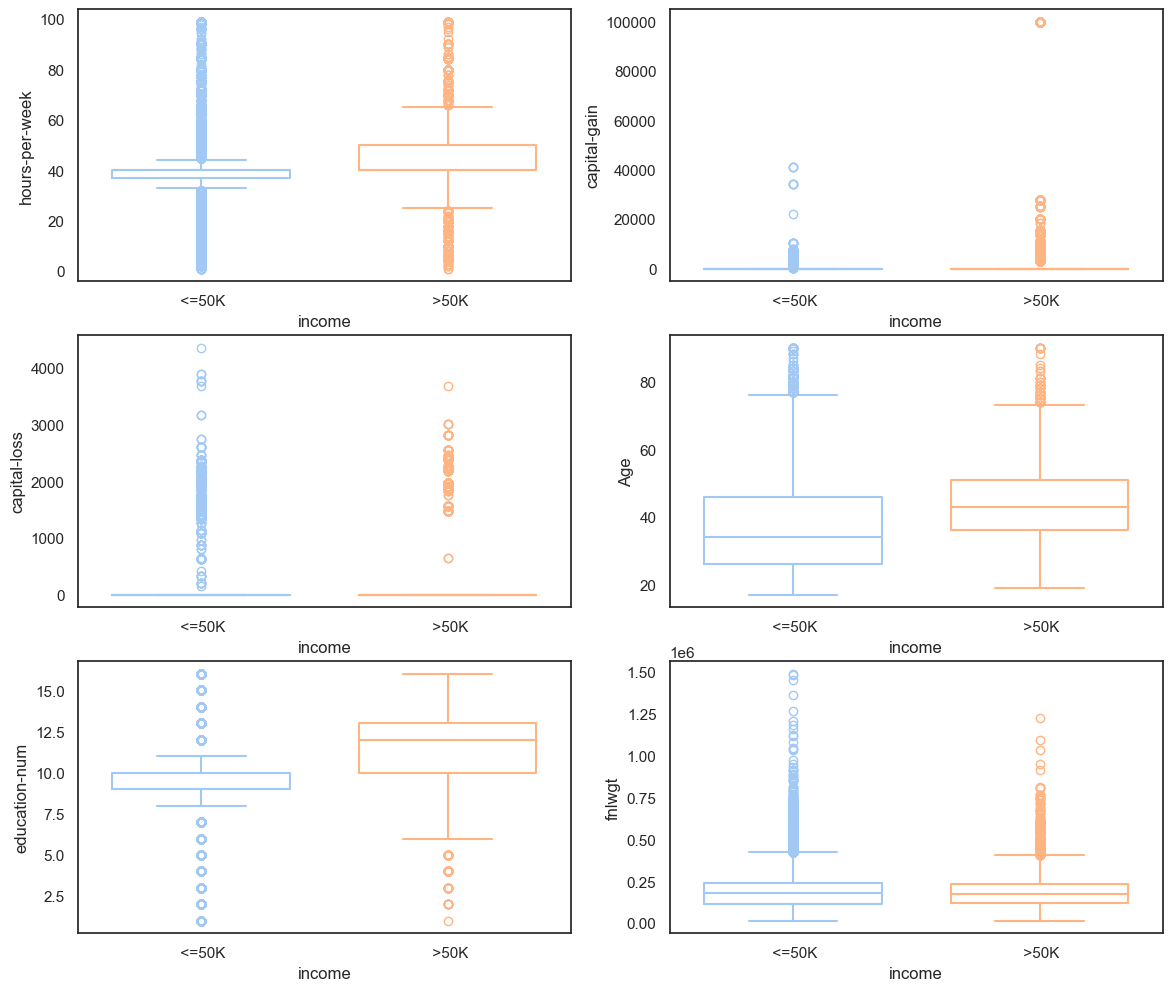

In [ ]:
dataset=pd.read_csv('Adult.csv')
grafico(2)
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
sns.boxplot(data=dataset, x="income", y="hours-per-week", fill=False, gap=.1, ax=axs[0, 0], palette="pastel")
sns.boxplot(data=dataset, x="income", y="capital-gain", fill=False, gap=.1, ax=axs[0, 1], palette="pastel")
sns.boxplot(data=dataset, x="income", y="capital-loss", fill=False, gap=.1, ax=axs[1, 0], palette="pastel")
sns.boxplot(data=dataset, x="income", y="Age", fill=False, gap=.1, ax=axs[1, 1], palette="pastel")
sns.boxplot(data=dataset, x="income", y="fnlwgt", fill=False, gap=.1, ax=axs[2, 1], palette="pastel")
sns.boxplot(data=dataset, x="income", y="education-num", fill=False, gap=.1, ax=axs[2, 0], palette="pastel")

Os gráficos anteriores foram criados da forma apresentada para facilitar a leitura do  mesmo, para tal recorreu-se a funcionalidade [`plt.subplots()`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) onde dividimos a nossa visualização em 2 colunas e 3 linhas dando assim capacidade para presentar 6 gráficos. Cada gráfico tem associado uma poição ax=axs[0, 0] definida na função anterior.

No que diz repeito a variável *fnlwgt* podemos afirmar que existe um certo padrão alieado ao baixo coeficiente de correlação, é uma variável candidata a não ser considerada.
 
Para facilitar a navegação no nosso script vamos dividir a análise nos seguintes pontos (atenção que esta divisão não foi feita no relatório, onde se olhou de forma global)

<h2>1.3.-Exploração de Dados</h2>

<a id="secao3171"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)**
    - [ ] **[Relação entre a variável alvo *“income”* com os subconjuntos das variáveis *"capital-gain"* e *"capital-loss"* ](#secao3171)**
    - [ ] [Relação entre a variável alvo *“income”* com a variável *"Age"*](#secao3172)
    - [ ] [Relação entre a variável alvo *“income”* com a variável *"hours-per-week"*](#secao3173)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)
  
A [Variável quantitativa capital-gain](#secao312) e [Variável quantitativa capital-loss](#secao313) têm um conjunto de outliers que faz sentido analisar individualmente. criando um subconjunto para ser analisado.
<a id="secao3171"></a>

In [ ]:
subconjuntogain = dataset[dataset["capital-gain"] > 0]
subconjuntoloss = dataset[dataset["capital-loss"] > 0]
tabela_medidas_tendencia(subconjuntogain).iloc[3:4]

index   count      mean      std    min     25%     50%      75%  \
3  capital-gain  3790.0  13142.19  22676.0  114.0  3464.0  7298.0  14084.0   

       max  Skew     Moda  
3  99999.0  3.36  15024.0

In [ ]:
tabela_medidas_disperção(subconjuntogain).iloc[3:4]

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2340933877.py:6: RuntimeWarning: invalid value encountered in scalar divide
  coef_variacao = round((np.std(dataset[coluna]) / np.mean(dataset[coluna])),2)


Variável     Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
3  capital-gain  5.140655e+08                     1.73               11873.67   

   Amplitude  Intervalo Inter-Quartil  Outliers  
3    99885.0                  10620.0       236

In [ ]:
dataset['income'] = dataset['income'].replace({'>50K': 1, '<=50K': 0}).astype('category').cat.codes
print("A correlação entre a variável income com o subconjunto da variável capital-gain é de",(dataset['income'].corr(subconjuntogain['capital-gain'])).round(3),
", já com o subconjunto da variável capital-loss é de ", dataset['income'].corr(subconjuntoloss['capital-loss']).round(3))
dataset=pd.read_csv('Adult.csv')


A correlação entre a variável income com o subconjunto da variável capital-gain é de 0.325 , já com o subconjunto da variável capital-loss é de  0.297


In [ ]:
tabela_medidas_disperção(subconjuntoloss).iloc[4:5]

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2340933877.py:6: RuntimeWarning: invalid value encountered in scalar divide
  coef_variacao = round((np.std(dataset[coluna]) / np.mean(dataset[coluna])),2)


Variável  Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
4  capital-loss  126125.44                     0.19                 227.32   

   Amplitude  Intervalo Inter-Quartil  Outliers  
4     4201.0                    305.0       142

In [ ]:
tabela_medidas_tendencia(subconjuntoloss).iloc[4:5]

index   count     mean     std    min     25%     50%     75%  \
4  capital-loss  2140.0  1872.18  355.22  155.0  1672.0  1887.0  1977.0   

      max  Skew    Moda  
4  4356.0  0.06  1902.0

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3928931881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=subconjuntogain["income"], y=subconjuntogain["capital-gain"], fill=False, gap=.1, palette="pastel")


Text(0.5, 1.0, '(conjunto de individuos que obtiveram aumento de capital)')

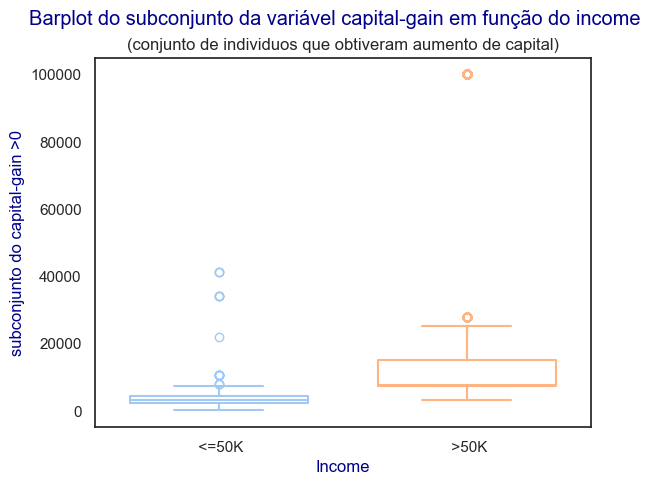

In [ ]:
sns.boxplot(x=subconjuntogain["income"], y=subconjuntogain["capital-gain"], fill=False, gap=.1, palette="pastel")
plt.xlabel("Income", color="darkblue")
plt.ylabel("subconjunto do capital-gain >0", color="darkblue")
plt.suptitle("Barplot do subconjunto da variável capital-gain em função do income", color="darkblue")
plt.title("(conjunto de individuos que obtiveram aumento de capital)")

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\2295890584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=subconjuntoloss["income"], y=subconjuntoloss["capital-loss"], fill=False, gap=.1, palette="pastel")


Text(0.5, 1.0, '(conjunto de individuos que obtiveram uma diminuição de capital)')

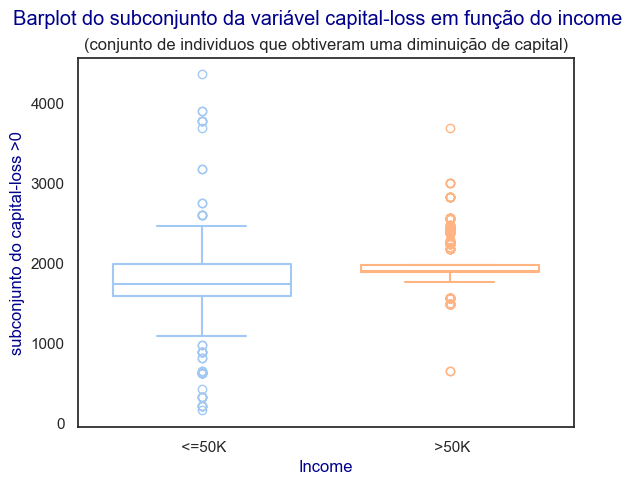

In [ ]:
sns.boxplot(x=subconjuntoloss["income"], y=subconjuntoloss["capital-loss"], fill=False, gap=.1, palette="pastel")
plt.xlabel("Income", color="darkblue")
plt.ylabel("subconjunto do capital-loss >0", color="darkblue")
plt.suptitle("Barplot do subconjunto da variável capital-loss em função do income", color="darkblue")
plt.title("(conjunto de individuos que obtiveram uma diminuição de capital)")

Outra observação interessante a fazer neste subconjunto pode estar relacionado com os outliers, onde verificamos que muito possivelmente o valor $99.999, poderá estar associado com um valor mal introduzido ou com uma condição lógica, isto é, o próprio SGBD ter a opção de $99.999 para identificar os indivíduos que recebem mais do que $50.000, o que no ponto de vista lógico faz sentido pois os indivíduos que passam o valor de $50.000 garantidamente vão ter a variável “income”. com um valor de mais de $50.000. 

Vamos então levantar um teste de hipotses:

**H0: O conjunto de observações dos individuos que ganham mais de $50.000 corresponde ao conjunto de outliers do subconjunto de *capital-gain***

**H1: Não existe relação entre as observações dos individuos que ganham mais de $50.000 com o conjunto de outliers do subconjunto de *capital-gain***

In [ ]:
teste10=dataset[dataset['capital-gain'] >50000]
pd.DataFrame(teste10['income'].value_counts())

income
 >50K     229

Tendo em conta o anterior podemos afirmar que a nossa hipotse se verifica e existe relação entre os  as observações dos individuos que ganham mais de $50.000 com o conjunto de outliers do subconjunto de *capital-gain**

~~**H0: O conjunto de observações dos individuos que ganham mais de $50.000 corresponde ao conjunto de outliers do subconjunto de *capital-gain***~~ 

**H1: Não existe relação entre as observações dos individuos que ganham mais de $50.000 com o conjunto de outliers do subconjunto de *capital-gain***

Da análise desta variável concluimos que o mais acertado para continuar com o nosso trabalho será juntar ambas as variáveis num só preservando assim valores os outliers que são importantes para a classificação da nossa variável alvo.

<h2>1.3.-Exploração de Dados</h2>

<a id="secao3172"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)**
    - [X] [Relação entre a variável alvo *“income”* com os subconjuntos das variáveis *"capital-gain"* e *"capital-loss"* ](#secao3171)
    - [ ] **[Relação entre a variável alvo *“income”* com a variável *"Age"*](#secao3172)**
    - [ ] [Relação entre a variável alvo *“income”* com a variável *"hours-per-week"*](#secao3173)
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

Com a análise do gráfico da relação entre a variável alvo com a variável *Age* verificamos que existe uma porção na parte inferior do gráfico dos individos que ganham mais do $50.000 onde não existem observações, indicando que aquele intervalo de idades apenas contem valores de individuos que ganham menos de $50.000.
Tendo em conta a análise do gráfico parece que o valor anda pela casa dos 18 anos de idade.

Assim sendo foi levantado a seguinte hipotse:

**H0: Existem indiviudos com menos de 19 anos são categorizados com *">50K"***

**H1: Os indiviudos com menos de 19 anos não têm observações *">50K"***

<a id="secao3172"></a>

In [ ]:
teste10=dataset[(dataset["Age"]<19)]
pd.DataFrame(teste10["income"].value_counts())

income
 <=50K    1188

Tendo em conta o anterior podemos afirmar que a nossa hipotse estava correta e que não existem observações de individuos que recebem mais de $50.000 com idades inferiores a 19 anos.

~~**H0: Existem indiviudos com menos de 19 anos são categorizados com *">50K"***~~

**H1: Os indiviudos com menos de 19 anos não têm observações *">50K"***

Uma possibilidade será retirar este subconjunto das observações uma vez que corresponde a cerca de **2.6%**

<h2>1.3.-Exploração de Dados</h2>

<a id="secao3173"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)**
    - [X] [Relação entre a variável alvo *“income”* com os subconjuntos das variáveis *"capital-gain"* e *"capital-loss"* ](#secao3171)
    - [X] [Relação entre a variável alvo *“income”* com a variável *"Age"*](#secao3172)
    - [ ] **[Relação entre a variável alvo *“income”* com a variável *"hours-per-week"*](#secao3173)**
- [ ] [Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)

Analizando agora a variável *hours-per-week*, observamos que o IQR dos indivíduos que ganham mais de $50.000, corresponde a um valor de horas superior ao dos indivíduos que ganham menos de $50.000, evidenciando que a maioria dos indivíduos que ganham mais de $50.000, são aqueles que também trabalham mais horas. 
A variável “hours-per-week” têm uma particularidade que deve ser referida, não influenciando a nossa análise, mas a sua interpretação, isto porque o máximo da variável, o valor 99 horas, muito provavelmente corresponde a um valor do sistema para os indivíduos que trabalham mais de 99 horas, pois o expectável é termos uma diminuição de valores nos valores mais altos da variável “hours-per-week” e identificamos que quando chegamos as 99h temos 123 indivíduos, evidenciando assim um aumento, contudo a proposta é de não considerar esta diferença deixando a variável ficar como está.
<a id="secao3173"></a>

In [ ]:
teste11=dataset[(dataset["hours-per-week"]==99)]
pd.DataFrame(teste11["hours-per-week"].value_counts())

hours-per-week
99.0             123

In [ ]:
pd.DataFrame(teste11["income"].value_counts())

income
 <=50K      83
 >50K       40

Sendo que a quantidade de observações corresponde a 123 individuos sendo que desses inidividuos 40, foram categorizados como ganhassem mais de $50.000 (">50K"), propomos não fazer nada com a variável visto que está pode contribuir para explicar a nossa variável alvo.

<h2>1.3.-Exploração de Dados</h2>

<a id="secao318"></a>

## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] [Variável qualitativa nominal income (variável alvo)](#secao3)
- [X] [Variável qualitativa nominal workclass](#secao32)
- [X] [Variável qualitativa ordinal education](#secao33)
- [X] [Variável qualitativa nominal marital-status](#secao34)
- [X] [Variável qualitativa nominal occupation](#secao35)
- [X] [Variável qualitativa nominal relationship](#secao36)
- [X] [Variável qualitativa nominal race](#secao37)
- [X] [Variável qualitativa nominal gender](#secao38)
- [X] [Variável qualitativa nominal native-country](#secao39)
- [X] [Variável quantitativa age](#secao310)
- [X] [Variável quantitativa education-num](#secao311)
- [X] [Variável quantitativa capital-gain](#secao312)
- [X] [Variável quantitativa capital-loss](#secao313)
- [X] [Variável quantitativa fnlwgt](#secao314)
- [X] [Variável quantitativa hours-per-week](#secao315)
- [X] [Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)
- [X] [Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)
- [ ] **[Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)**


Vamos a semelhança das variáveis quantitativas representar gráficamente o conjunto das variáveis com a nossa variável alvo, a variável “native-country”, como tínhamos descrito, apresentava um resultado que eram pouco conclusivos para a análise do gráfico em relação a nossa variável alvo, assim optamos por não analisar no conjunto das variáveis qualitativas reservando uma análise personalizada, à semelhança do que fizemos com a variável “capital-gain” e “capital-loss”.

A lógica da criação dos gráficos é em tudo semelhante ao da utilizada para as variáveis quantitativas, mas neste pacote, a função que define a posição dos gráficos está diretamente associada a [`.get_xticklabels()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_xticklabels.html)

<a id="secao318"></a>

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1880303686.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(labels, fontsize=8)
C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1880303686.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(labels, fontsize=7)
C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1880303686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(labels, fontsize=6)
C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1880303686.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 0].set_xticklabels(labels, fontsize=6)
C:\Users\garci\AppData\Local\

[Text(0, 0, ' Not-in-\nfamily'),
 Text(1, 0, ' Husband'),
 Text(2, 0, ' Wife'),
 Text(3, 0, ' Own-child'),
 Text(4, 0, ' Unmarried'),
 Text(5, 0, ' Other-\nrelative')]

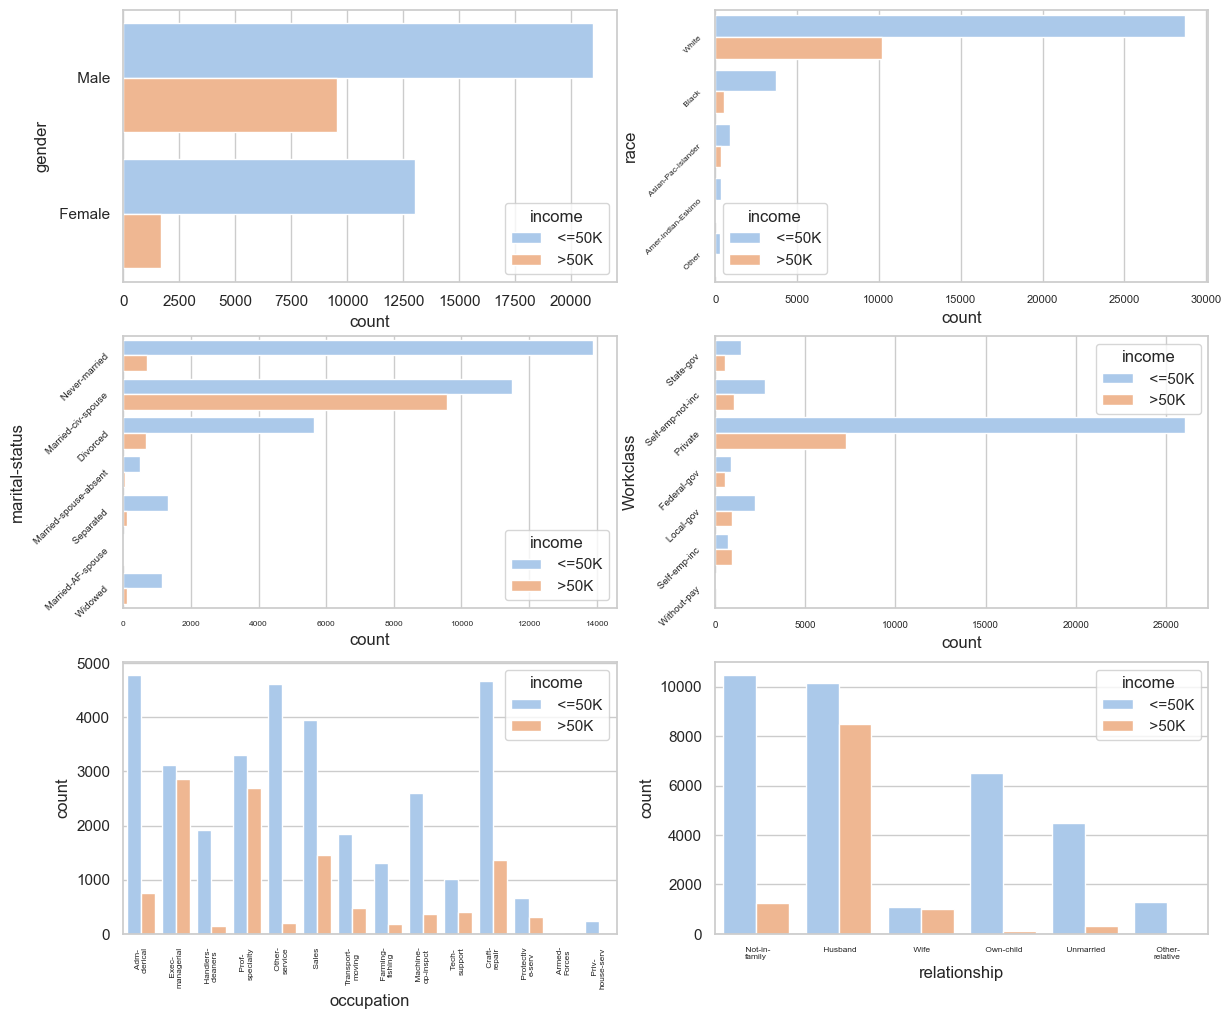

In [ ]:
grafico(3)
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
sns.countplot(dataset, y="gender", hue="income", ax=axs[0,0])
sns.countplot(dataset, y="race", hue="income", ax=axs[0,1])
axs[0, 1].tick_params(axis='y', rotation=45, labelsize=6)
labels = [textwrap.fill(label.get_text(), width=10) for label in axs[0, 1].get_xticklabels()]
axs[0, 1].set_xticklabels(labels, fontsize=8)
sns.countplot(dataset, y="Workclass", hue="income", ax=axs[1,1])
axs[1, 1].tick_params(axis='y', rotation=45, labelsize=7)
labels = [textwrap.fill(label.get_text(), width=10) for label in axs[1, 1].get_xticklabels()]
axs[1, 1].set_xticklabels(labels, fontsize=7)
sns.countplot(dataset, y="marital-status", hue="income", ax=axs[1,0])
axs[1, 0].tick_params(axis='y', rotation=45, labelsize=7)
labels = [textwrap.fill(label.get_text(), width=10) for label in axs[1, 0].get_xticklabels()]
axs[1, 0].set_xticklabels(labels, fontsize=6)
sns.countplot(dataset, x="occupation", hue="income", ax=axs[2,0])
axs[2, 0].tick_params(axis='x', rotation=90, labelsize=5)
labels = [textwrap.fill(label.get_text(), width=10) for label in axs[2, 0].get_xticklabels()]
axs[2, 0].set_xticklabels(labels, fontsize=6)
sns.countplot(dataset, x="relationship", hue="income", ax=axs[2,1])
labels = [textwrap.fill(label.get_text(), width=10) for label in axs[2, 1].get_xticklabels()]
axs[2, 1].set_xticklabels(labels, fontsize=6)

Analisando o gráfico anterior existem um conjunto de hipotses que podem ser levantadas em algumas das variáveis qualitativas de forma a organizar o script vai ser efetuado, como anteriormente, um subconjunto que não faz parte do indece do trabalho.

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~ 
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [X] ~~[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)**
    - [ ] **[Relação entre a variável alvo “income” com a variável qualitativa *race*](#secao3181)**
    - [ ] [Relação entre a variável alvo “income” com a variável qualitativa *workclass*](#secao3182)
    - [ ] [Relação entre a variável alvo “income” com a variável *marital-status* e *relationship*](#secao3183)
    - [ ] [Relação entre a variável alvo “income” com a variável *gender* e *relationship*](#secao3184)
    - [ ] [Relação entre a variável alvo “income” com a variável *native-country*](#secao3185)

Começando então pela [Relação entre a variável alvo “income” com a variável qualitativa *race*](#secao3181) que não apresenta uma associação visível, com a nossa variável alvo, sendo que justifica a correlação existente entre as variáveis (0.07 – Fraco coeficiente de correlação), isto pode ser justificado pelo elevado número de observações no valor “white”.

<a id="secao318"></a>
<a id="secao3181"></a>


In [ ]:
teste99=dataset[dataset["race"]!= " White"]
teste99["income"].value_counts()

 <=50K    5318
 >50K     1001
Name: income, dtype: int64

Como vimos anteriormente existem valores de *income* para *>50K*, para o conjunto de individuos que não têm a *race* de *White*. Logo devemos manter a a variável.

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~ 
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [X] ~~[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)**
    - [X] **[Relação entre a variável alvo “income” com a variável qualitativa *race*](#secao3181)**
    - [ ] [Relação entre a variável alvo “income” com a variável qualitativa *workclass*](#secao3182)
    - [ ] [Relação entre a variável alvo “income” com a variável *marital-status* e *relationship*](#secao3183)
    - [ ] [Relação entre a variável alvo “income” com a variável *gender* e *relationship*](#secao3184)
    - [ ] [Relação entre a variável alvo “income” com a variável *native-country*](#secao3185)

No que diz respeito a variável “Workclass”, uma observação interessante é que os indivíduos que categorizados como “Self-emp-inc” na variável “Workclass” têm mais observações na variável “income” como “>50K” do que “<=50K” sendo a única observação onde isso acontece.

Existe ainda uma categoria que é interessante individualizar que é a “Without-pay” isto porque num problema de classificação de quem recebe mais ou menos do que um determinado valor, os indivíduos desta categoria, é expectável que sejam categorizados como indivíduos que recebem menos de “$50.000”, o que analisando a tabela seguinte isso não acontece.

Levantamos então a hipotse de que a categoria *Without-pay* da variável *Workclass* não iria ter valores de *>50K* na variável *income*:

**H0: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* têm valores na categoria *>50K* na variável *income***

**H1: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* não têm valores na categoria *>50K* na variável *income***

<a id="secao318"></a>
<a id="secao3182"></a>

In [ ]:
teste7=dataset[(dataset['Workclass']==' Without-pay')]
pd.DataFrame(teste7['income'].value_counts())

income
 <=50K      19
 >50K        2

Pela tabela anterior verificamos que a hipotse levantada não se verifica logo:

**H0: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* têm valores na categoria *>50K* na variável *income***

~~**H1: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* não têm valores na categoria *>50K* na variável *income***~~

Uma das possibilidades seria os indivíduos foram categorizados com “>50K” terem tido um aumento de capital nesse ano por algum motivo que não rendimento oriundo do trabalho, contudo e analisando estas duas observações identificamos que não têm valores na variável:

**H0: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* têm valores na categoria *>50K* na variável *income* e não tiveram um aumento do capital, ou seja a variável *capital-gain*>0**

**H0: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* têm valores na categoria *>50K* na variável *income* porque tiveram um aumento do capital, ou seja a variável *capital-gain*>0**

In [ ]:
teste7=dataset[(dataset['Workclass']==' Without-pay')&(dataset['income']==' >50K')]
pd.DataFrame(teste7['capital-gain'].value_counts())

capital-gain
0.0             2

Contudo e mais uma vez a nossa hipotse é refutada novamente sendo que tal não se verifica, logo:

**H0: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* têm valores na categoria *>50K* na variável *income* e não tiveram um aumento do capital, ou seja a variável *capital-gain*>0**

~~**H0: Os individuos que pertencem a categoria *Without-pay* da variável *Workclass* têm valores na categoria *>50K* na variável *income* porque tiveram um aumento do capital, ou seja a variável *capital-gain*>0**~~

Assim sendo estes valores podem ser categorizado como erro, ou não, uma vez que pode identificar também questões relacionadas como fraude que vai de encontro com o quarto objetivo do banco e do nosso problema de data mining correspondente, para tentar perceber quais as profissões que estão associadas a estas duas observações.

In [ ]:
teste7=dataset[(dataset['Workclass']==' Without-pay')&(dataset['income']==' >50K')]
pd.DataFrame(teste7['occupation'].value_counts())

occupation
 Handlers-cleaners           1
 Machine-op-inspct           1

Tendo em conta as profissoes associadas as observações, não era espetável que fossem categorizadas como ' Without-pay', muito menos se não houve um ganho no que diz respeito à varivel *capital-gain*, como e que estes individuos são considerados na nossa variável alvo como *'>50K'*?

Uma das possibilidades é ser um erro, contudo não podemos deixar de acreditar que podem estar associados a causas de fraude.

<h2>1.3.-Exploração de Dados</h2>


## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~ 
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [X] ~~[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)**
    - [X] [Relação entre a variável alvo “income” com a variável qualitativa *race*](#secao3181)
    - [X] [Relação entre a variável alvo “income” com a variável qualitativa *workclass*](#secao3182)
    - [ ] **[Relação entre a variável alvo “income” com a variável *marital-status* e *relationship*](#secao3183)**
    - [ ] [Relação entre a variável alvo “income” com a variável *gender* e *relationship*](#secao3184)
    - [ ] [Relação entre a variável alvo “income” com a variável *native-country*](#secao3185)

As variáveis *“marital-status”* e *“relationship”* têm uma correlação negativa, mas com valores relativamente “altos”, o que indica uma boa relação com a nossa variável alvo. Pela análise do gráfico anterior, podemos ainda identificar que parece existir uma certa relação entre os valores de *“husband”* e *“wife”* da variável *“relationship”* com os valores de “maried civ-spouse” da variável “marital-status”, o que a partida poderá fazer sentido, uma vez que por exemplo, é expectável que os indivíduos que estejam como *“husband”* e *“wife”* sejam categorizados na variável *“relationship”* como *“married”* .

Então temos como hipotse de que:

**H0: Existem individuos pertencentes as categorias *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status*, que têm outras categorias do que *Husband* e *Wife na variável *relationship****

**H1: todos os individuos pertencentes as categorias *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status*, estão categorizados como *Husband* e *Wife* na variável *relationship***

<a id="secao318"></a>
<a id="secao3183"></a>

In [ ]:
pd.DataFrame(dataset["relationship"].value_counts().index ,columns=['relationship'], index=None)

relationship
0          Husband
1    Not-in-family
2        Own-child
3        Unmarried
4             Wife
5   Other-relative

In [ ]:
pd.DataFrame(dataset["marital-status"].value_counts().index)

0
0      Married-civ-spouse
1           Never-married
2                Divorced
3               Separated
4                 Widowed
5   Married-spouse-absent
6       Married-AF-spouse

In [ ]:
teste = dataset[(dataset["marital-status"] == ' Married-civ-spouse') | (dataset["marital-status"] == " Married-spouse-absent") | (dataset["marital-status"] == " Married-AF-spouse")]
pd.DataFrame(teste["relationship"].value_counts())

relationship
 Husband                18666
 Wife                    2091
 Not-in-family            301
 Other-relative           229
 Own-child                183
 Unmarried                169

Verificamos no anterior que a nossa hipotse não se verifica

**H0: Existem individuos pertencentes as categorias *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status*, que têm outras categorias do que *Husband* e *Wife na variável *relationship*,***

~~**H1: todos os individuos pertencentes as categorias *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status*, estão categorizados como *Husband* e *Wife na variável *relationship*,***~~

Tanto não se verifica como aparenta ter erros de preenchimento pois apareçem valores que conceptualmente não fazem sentido tais como *Unmarried* e *Not-in-family*

Pela quantidade de observações que se verificam com este "erro" podemos assumir que ou são erros de introdução ou possiveis fraudes, isto porque se associamos isto porque, se associarmos isto a uma possível fuga a contribuições obrigatórias ao estado, estes indivíduos podem representar, um conjunto da nossa amostra que declara um estado civil diferente para evitar contribuições obrigatórias.

De forma homolga podemos ver na variável *"relationship"* todos os individuos que podem ser categorizados como não percendo a familias e o espéctável é estes não terem valores na variável *Married-AF-spouse* que os associe a estarem casados.

**H0: Existem individuos pertencentes as categorias *Not-in-family*, *Own-child*, e *Other-relative* na variável *relationship*, que têm outras categorias como *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status***

**H1: Todos os individuos pertencentes as categorias *Not-in-family*, *Own-child*, e *Other-relative* na variável *relationship*, pertecem a categorias como *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status***


In [ ]:
teste0 = dataset[(dataset["relationship"] == ' Not-in-family') | (dataset["relationship"] == " Own-child") | (dataset["relationship"] == " Other-relative")]
pd.DataFrame(teste0["marital-status"].value_counts())

marital-status
 Never-married                   13375
 Divorced                         4030
 Separated                         793
 Widowed                           766
 Married-spouse-absent             383
 Married-civ-spouse                328
 Married-AF-spouse                   2

Pela análise da tabela anterior verificamos que a nossa hipotse é refutada e existem individuos que pertencem a outras categorias.

**H0: Existem individuos pertencentes as categorias *Not-in-family*, *Own-child*,  e *Other-relative* na variável *relationship*, que têm outras categorias como *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status***

~~**H1: Todos os individuos pertencentes as categorias *Not-in-family*, *Own-child*,  e *Other-relative* na variável *relationship*, pertecem a categorias como *Married-civ-spouse*, *Married-spouse-absent* e *Married-AF-spouse* na variável *marital-status***~~

A relação entre a variável *relationship* e a variável *marital-status*, não parece ter uma lógica clara de ser detalhada atravez das associações, contudo por uma questão de lógica é expectável que os individuos classificados como *Unmarried*, não estejam associados a valores na tabela *marital-status* como qualquer valores que esteja associado a casamento.

**H0: Existem individuos categorizados como *unmarried* na variável *relationship*, que têm observações noutras categorias sem ser *never-married***

**H1: Não existem individuos categorizados como *unmarried* na variável *relationship*, apenas têm observações nas categorias *never-married***

In [ ]:
teste7=dataset[(dataset["relationship"] == ' Unmarried')]
pd.DataFrame(teste7['marital-status'].value_counts())

marital-status
 Divorced                         2267
 Never-married                    1223
 Separated                         618
 Widowed                           511
 Married-spouse-absent             169

Na análise da tabela anterior podemos concluir que a hipotse levantada não se verifica.

**H0: Existem individuos categorizados como *unmarried* na variável *relationship*, que têm observações noutras categorias sem ser *never-married***

~~**H1: Não existem individuos categorizados como *unmarried* na variável *relationship*, apenas têm observações nas categorias *never-married***~~

A porposta é não mexer na variável mesmo que pareça que a variável têm alguns erros de concepção da variável.

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~ 
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [X] ~~[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)**
    - [X] [Relação entre a variável alvo “income” com a variável qualitativa *race*](#secao3181)
    - [X] [Relação entre a variável alvo “income” com a variável qualitativa *workclass*](#secao3182)
    - [X] [Relação entre a variável alvo “income” com a variável *marital-status* e *relationship*](#secao3183)
    - [ ] **[Relação entre a variável alvo “income” com a variável *gender* e *relationship*](#secao3184)**
    - [ ] [Relação entre a variável alvo “income” com a variável *native-country*](#secao3185)

Outro valor interessante de ser analisado é a relação entre as variáveis “gender” e “relationship”, com uma correlação negativa elevada poderá indicar um certo relacionamento entre as duas variáveis. Esta relação poderá estar até certo ponto relacionada com a variável “relationship”, não na sua totalidade, mas parcialmente, ou seja, para os indivíduos do categorizados como “husband” é espetável ter uma correspondência direta com os valores do género de “male”. Assim como, de forma homóloga os indivíduos categorizados como “Wife” irão ser todos do género “female”. 

**HO: Os individuos categorizados como *husband* na variável *relationship* não são categorizados como *male* na variável *gender*  e os individuos categorizados como *wife* na variável *relationship* não são categorizados como *female* na variável *gender***

**H1: Os individuos categorizados como *husband* na variável *relationship* são categorizados como *male* na variável *gender*  e os individuos categorizados como *wife* na variável *relationship* são categorizados como *female* na variável *gender***

<a id="secao318"></a>
<a id="secao3184"></a>


In [ ]:
teste4 = dataset[(dataset["relationship"]==" Wife")]
pd.DataFrame(teste4["gender"].value_counts())

gender
 Female    2090
 Male         1

In [ ]:
teste41 = dataset[(dataset["relationship"]==" Husband")]
pd.DataFrame(teste41["gender"].value_counts())

gender
 Male     18665
 Female       1

Pela análise das duas tabelas anteriores verificamos que a nossa hipotse é verificada, assumindo que a duas categorizações de uma observação, são observações erráticas.

~~**HO: Os individuos categorizados como *husband* na variável *relationship* não são categorizados como *male* na variável *gender*  e os individuos categorizados como *wife* na variável *relationship* não são categorizados como *female* na variável *gender***~~ 

**H1: Os individuos categorizados como *husband* na variável *relationship* são categorizados como *male* na variável *gender*  e os individuos categorizados como *wife* na variável *relationship* são categorizados como *female* na variável *gender***

Importa agora ver então onde se categorizam os individuos categorizados como *husband* e *wife* na variável *relationship* na variável *marital-status*

In [ ]:
teste2 = dataset[(dataset["relationship"] == ' Husband') | (dataset["relationship"] == " Wife")]
pd.DataFrame(teste2["marital-status"].value_counts())

marital-status
 Married-civ-spouse           20727
 Married-AF-spouse               30

Tendo em conta as tabelas anteriores a proposta é de juntar as categorias *husband* e *wife* em uma unica categoria.

<h2>1.3.-Exploração de Dados</h2>



## Exploração dos Dados [Voltar para a a metodologia CRISP-DM](#secao3)
- [X] ~~[Variável qualitativa nominal income (variável alvo)](#secao3)~~ 
- [X] ~~[Variável qualitativa nominal workclass](#secao32)~~
- [X] ~~[Variável qualitativa ordinal education](#secao33)~~
- [X] ~~[Variável qualitativa nominal marital-status](#secao34)~~
- [X] ~~[Variável qualitativa nominal occupation](#secao35)~~
- [X] ~~[Variável qualitativa nominal relationship](#secao36)~~
- [X] ~~[Variável qualitativa nominal race](#secao37)~~
- [X] ~~[Variável qualitativa nominal gender](#secao38)~~
- [X] ~~[Variável qualitativa nominal native-country](#secao39)~~
- [X] ~~[Variável quantitativa age](#secao310)~~
- [X] ~~[Variável quantitativa education-num](#secao311)~~
- [X] ~~[Variável quantitativa capital-gain](#secao312)~~
- [X] ~~[Variável quantitativa capital-loss](#secao313)~~
- [X] ~~[Variável quantitativa fnlwgt](#secao314)~~
- [X] ~~[Variável quantitativa hours-per-week](#secao315)~~
- [X] ~~[Relação entre a variável alvo “income” com as restantes variáveis do dataset](#secao316)~~
- [X] ~~[Relação entre a variável alvo “income” com as variáveis quantitativas detalhadas](#secao317)~~
- [ ] **[Relação entre a variável alvo “income” com as variáveis qualitativas detalhadas](#secao318)**
    - [X] [Relação entre a variável alvo “income” com a variável qualitativa *race*](#secao3181)
    - [X] [Relação entre a variável alvo “income” com a variável qualitativa *workclass*](#secao3182)
    - [X] [Relação entre a variável alvo “income” com a variável *marital-status* e *relationship*](#secao3183)
    - [X] [Relação entre a variável alvo “income” com a variável *gender* e *relationship*](#secao3184)
    - [ ] **[Relação entre a variável alvo “income” com a variável *native-country*](#secao3185)**

Por fim ao analisar a variável “native-country” que o valor “United-States” tinha uma concertação de aproximadamente 91.3% dos indivíduos, como concluímos anteriormente na análise da variável, o que pode indicar que esta variável seja uma possível candidata a ser um preditor falso. Para isso isolamos os valores que não são “United-States” e fomos verificar a representatividade dos indivíduos na nossa variável alvo.


<a id="secao318"></a>
<a id="secao3185"></a>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ' Cuba'),
  Text(1, 0, ' Jamaica'),
  Text(2, 0, ' India'),
  Text(3, 0, ' Mexico'),
  Text(4, 0, ' Puerto-Rico'),
  Text(5, 0, ' Honduras'),
  Text(6, 0, ' England'),
  Text(7, 0, ' Canada'),
  Text(8, 0, ' Germany'),
  Text(9, 0, ' Iran'),
  Text(10, 0, ' Philippines'),
  Text(11, 0, ' Poland'),
  Text(12, 0, ' Columbia'),
  Text(13, 0, ' Cambodia'),
  Text(14, 0, ' Thailand'),
  Text(15, 0, ' Ecuador'),
  Text(16, 0, ' Laos'),
  Text(17, 0, ' Taiwan'),
  Text(18, 0, ' Haiti'),
  Text(19, 0, ' Portugal'),
  Text(20, 0, ' Dominican-Republic'),
  Text(21, 0, ' El-Salvador'),
  Text(22, 0, ' France'),
  Text(23, 0, ' Guatemala'),
  Text(24, 0, ' Italy'),
  Text(25, 0, ' China'),
  Text(26, 0, ' South'),
  Text(27, 0, ' Japan'),
  Text(28, 0, ' Yug

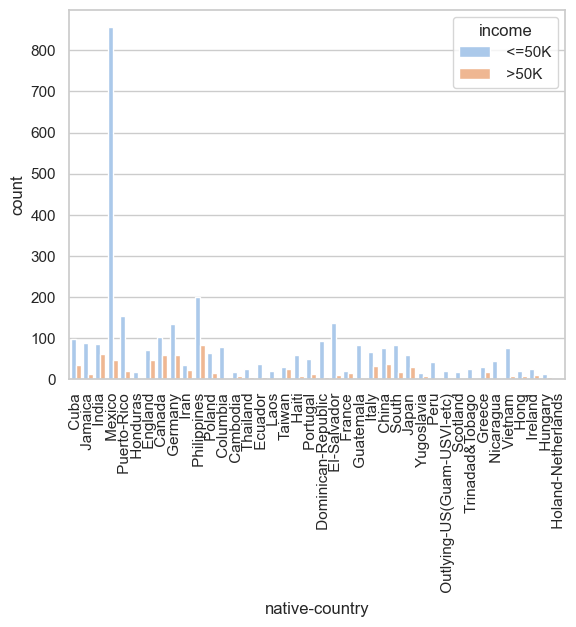

In [ ]:
Teste5= dataset[(dataset["native-country"]!=" United-States")]
sns.countplot(x=Teste5["native-country"], hue=Teste5["income"])
plt.xticks(rotation=90)

In [ ]:
pd.DataFrame(Teste5['income'].value_counts())

income
 <=50K    3170
 >50K      760

<a id="secao4"></a>
<h2>1.3.-Exploração de Dados</h2>

## Metodologia CRISP-DM 
- [X] [Recolha dos Dados Iniciais](#secao1)
- [X] [Descrição dos Dados](#secao2)
- [X] [Exploração de Dados](#secao3)
- [ ] **[Verificação da Qualidade dos Dados](#secao4)**

Tirando tudo o que já foi visto até agora a tabela seguinte pretende resumir a análise das variáveis.

|<center>**Variável**</center>|<center>**Descrição**</center>|<center>**Ações**</center>|
|--------|-------------|--------------|
| age              | Existe um subconjunto relacionado com os indivíduos com 18 ou menos anos que não têm observações de “>50K”                                               | Não considerar o subconjunto da amostra dos indivíduos nesta situação.                                                                                 |
| workclass        | Existe nesta variável observações registadas como “Without-pay” que é expectável que não tenham valores de “income” como “>50K”, muito menos quando o “capital-income” é 0. | Manter a variável, mas considerar estas duas observações ou como erro ou como observações que representam possível fraude.                                |
| fnlwgt           | A variável não faz sentido estatístico da forma como está no dataset, alem de não se conseguir identificar uma relação com as outras variáveis             | Não considerar a variável para os problemas levantados de DM                                                                                            |
| education & education-num | Estas duas variáveis têm o mesmo significado. Mas uma é quantitativa e a outra é qualitativa.                                                             | Apenas usar uma delas, mas manter as duas variáveis pois existem algoritmos que funcionam melhor com variáveis quantitativas e outros com variáveis qualitativas |
| marital-status   | A variável em si é muito discriminativa, deixando espaço para possíveis erros de interpretação sendo que a deveria se relacionar com a variável “relationship” e não se consegue identificar nenhum padrão. | Manter a variável como está.                                                                                                                          |
| occupation       | Nada a referir                                                                                 | Nada a referir                                                                                                                                         |
| relationship     | As variáveis “husband” e “wife” referem se ao mesmo estado civil, o que difere é no sexo do indivíduo.                                                  | - Conjugar as duas categorias “husband” e “wife”, numa categoria comum “married”.<br>- Existe um indivíduo que está classificado como “Male” e outro que está classificado como “female” erradamente o que propomos é a substituição para o valor de relationship correto. |
| race             | Nada a referir                                                                                 | Nada a referir                                                                                                                                         |
| gender           | Nada a referir                                                                                 | Nada a referir                                                                                                                                         |
| capital-gain & capital-loss| Ambas as variáveis representam a mesma intenção identificar quanto é que um indivíduo (ganhou ou perdeu).                                               | - Esta variável poderá ser conjugada em uma única variável sendo que os valores da perda serão representados como valores negativos e os valores representativos ao ganho com valores positivos. <br>- Outra alteração a fazer a estas variáveis será ou a eliminação dos valores maiores do que $50.000 ou pelo menos mudar o label desses valores para $50.000. |
| hours-per-week  | Esta variável apresenta um conjunto de valores com o valor de 99 que podem representar um conjunto de indivíduos que trabalham mais do que 99 horas por semana. | Não fazer nada, apenas ficar com esta informação para análises estatísticas futuras.                                                                  |
| native-country  | Valor da variável concentrado na observação “United-States”. Os valores das restantes observações poucas relações têm com a nossa variável alvo          | - Variável passível de não ser considerada<br>- Ou poderá ser transformada em um booleano.                                                            |
| income           | Variável alvo                                                                                  | Nada a referir                                                                                                                                         |


Como proposta de soluções para os nossos problemas de DM propomos o seguinte:


|        | <center>DM Obj1</center> | <center>DM Obj2</center> | <center>DM Obj3</center> | <center>DM Obj4</center> |
|--------|---------|---------|---------|---------|
| <center>SVM </center>   |       | <center>X </center>      |         |   <center>X </center>       |
| <center>Decision Tree</center> | <center>X </center> |  <center>X </center>     |         |         |
| <center>Random Forest </center>| <center>X  </center>|       | <center>X </center>      |         |
| <center>Regressão Logistica</center> |  |     <center>X </center>     |         |         |
| <center>Regressão Linear</center> |  <center>X</center>  |      |      |         |
| <center>K-Nearest Neighbors</center> | <center>X</center> |         |      |     <center>X </center>     |
| <center>Naive Bayes</center> |    | <center>X  </center>     |         |         |
| <center>SVR</center> |    |    |    <center>X</center>       |       |




vamos fazer o load do dataset sem as alterações feitas até aqui desde a ultima gravação

In [ ]:
dataset=pd.read_csv('Adult.csv')



## Metodologia CRISP-DM [(1ª Parte do Trabalho)](#secao0)
- [X] [Recolha dos Dados Iniciais](#secao1)
- [X] [Descrição dos Dados](#secao2)
- [X] [Exploração de Dados](#secao3)
- [X] [Verificação da Qualidade dos Dados](#secao4)


## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)
- [ ] [Preparação dos Dados](#secao22)
    - [ ] [Seleção dos Dados](#secao23)
    - [ ] [Limpeza dos Dados](#secao24)
    - [ ] [Derivar Novos Dados](#secao25)
    - [ ] [Integrar Dados](#secao26)
    - [ ] [Formatar Dados](#secao27)
    - [ ] [Criação do Dataset](#secao28)
- [ ] [Preparação dos Dados](#secao52)
    - [ ] [Escolha de Técnicas de modelação](#secao521)
    - [ ] [Definir mecanismos de teste](#secao522)
    - [ ] [Construção do Modelo](#secao52)
    - [ ] [Avaliar o Modelo](#secao524)
- [ ] [Avaliação](#secao31)
    - [ ] [Avaliar os Resultados](#secao32)
    - [ ] [Revisão do Processo](#secao33)
    - [ ] [Determinar Ações Futuras](#secao34)
- [ ] [Colocação em produção](#secao41)
    - [ ] [Planeamento da colocação em produção](#secao42)
    - [ ] [Planeamento da monitorização e manutenção](#secao43)
    - [ ] [Elaboração do relatório final](#secao44)
    - [ ] [Revisão do projeto](#secao45)


<a id="secao99"></a>

Vamos então começar a trabalhar num novo ficheiro que denominamos de Adultparte2 onde vamos fazer as alterações designadas sem perder os valores de origem.



In [ ]:
dataset.to_csv('Adultparte2.csv', index=False)


## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao22)
    - [ ] [Seleção dos Dados](#secao23)
    - [ ] [Limpeza dos Dados](#secao24)
    - [ ] [Derivar Novos Dados](#secao25)
    - [ ] [Integrar Dados](#secao26)
    - [ ] [Formatar Dados](#secao27)
    - [ ] [Criação do Dataset](#secao28)

<a id="secao22"></a>

Tendo em conta a nossa compreensão de dados, resumida na nossa tabela 46, decidimos então nesta fase do projeto assumir a partir deste ponto os seguintes prossupostos:

| <center>**Variável**</center> | <center>**Decisão a tomar**</center> |
|-----------------|-----------------|
| <center>**fnlwgt**</center> | Eliminar esta variável do nosso dataset. |
| <center>**education e education-num**</center>  | Manter as duas variáveis para serem aplicados nos diferentes testes. Pois dependendo do teste pode este ser mais recetível a variáveis quantitativas ou a variáveis qualitativas. Contudo apenas será usado uma das variáveis, isto é, ao usar a variável *“education”* não usaremos *“education-num”* e vice-versa.Contudo e por uma questão de clareza vamos somente referir-nos a esta variável como *“education”* sendo que depois na parte prática poderá ser aplicada uma ou outra variável. |
| <center>**native-country**</center> | Esta variável vai ser transformada em uma variável binominal. (indivíduos que pertencem a categoria de *“United-States”* vs indivíduos que pertencem a categoria de *“No-United-States”*). |
| <center>**capital-gain e capital-loss**</center> | Iremos conjugar as duas variáveis em uma única variável, denominada de “capital” sendo que os valores da perda serão representados como valores negativos e os valores representativos ao ganho com valores positivos. Por uma questão de pormenor vamos mudar o *“label”* das observações outliers com valores iguais a $99.999 para $50.000. |
| <center>**relationship**</center> | Conjugar os indivíduos categorizados como *“husband”* e *“wife”*, numa categoria comum *“married”*. |
| <center>**age**</center> | Remover o subconjunto relacionado com os indivíduos com até 18 anos que não têm observações de “>50K”. |


## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao2.2)
    - [X] **[Seleção dos Dados](#secao2.3)**
    - [ ] [Limpeza dos Dados](#secao2.4)
    - [ ] [Derivar Novos Dados](#secao2.5)
    - [ ] [Integrar Dados](#secao2.6)
    - [ ] [Formatar Dados](#secao2.7)
    - [ ] [Criação do Dataset](#secao2.8)


|                    | Workclass           | Education | Marital-status | Occupation | Relationship | Race | Gender | country category | age | capital | Hours per week | income |
|--------------------|---------------------|-----------|----------------|------------|--------------|------|--------|------------------|-----|---------|----------------|--------|
| **Objetivo 1 de DM – (Regressão)** |
| Decision Tree     | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| Random Forest     | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| Regressão Logistica | X                 | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| K-Nearest Neighbors | X                | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| **Objetivo 2 de DM – (Classificação)**|
| Decision Tree     | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| Random Forest     | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| SVM               | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| Regressão Linear  | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| Naive Bayes       | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| **Objetivo 3 de DM – (Regressão)**  |
| Regressão Linear  | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| Random Forest     | X                   | X         | X              | X          | X            | X    | X      | X                | X   | X       | X              | X      |
| **Objetivo 4 de DM – (Classificação)**|
| SVM               | X                   |           | X              |            |              |      | X      |                  |     |         |                |        |
| K-Nearest Neighbors | X                 |           | X              |            |              |      | X      |                  |     |         |                |        |


In [ ]:
dataset2=pd.read_csv('Adultparte2.csv')

## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao22)
    - ~~[X] [Seleção dos Dados](#secao23)~~
    - [X] **[Limpeza dos Dados](#secao24)**
    - [ ] [Derivar Novos Dados](#secao25)
    - [ ] [Integrar Dados](#secao26)
    - [ ] [Formatar Dados](#secao27)
    - [ ] [Criação do Dataset](#secao28)

<a id="secao24"></a>

| Variável     | Alterações                                                   | Tamanho do dataset após a alteração |
|--------------|--------------------------------------------------------------|-------------------------------------|
| Workclass,Occupation e Native Country   | Eliminação de valores omissos.                                | 45222 (-13.23%)                     |
| fnlwgt       | Eliminação da variável                                        | NTR                                 |
| Age          | Remoção de indivíduos com menos de 18 anos                   | 44034 (-2.7%)                       |
| capital-gain e capital-loss | Eliminação das variáveis após criação da nova                | NTR                                 |
| Gender       | Substituição de dois valores erráticos na variável gender    | NTR                                 |


Retiramos os valores omissos do nosso dataset ([aqui](#NAN))

| Variável        | Valores Omissos | % dos valores omissos |
|-----------------|-----------------|-----------------------|
| Workclass       | 2799            | 5.73                  |
| Occupation      | 2809            | 5.75                  |
| Native Country  | 857             | 1.75                  |



Eliminamos a variável “fnlwgt” do nosso dataset pois não nos interessa manter a mesma, não trazendo esta valor acrescido para os nossos problemas. 



In [ ]:
dataset2.drop(columns=['fnlwgt'], inplace=True)

Remover o subconjunto relacionado com os indivíduos com até 18 anos que não têm observações de “>50K”.

In [ ]:
dataset2 = dataset2[dataset2['Age'] > 18]
dataset2.shape

(44034, 14)

<a id="secao2.5"></a>

## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao2.2)
    - ~~[X] [Seleção dos Dados](#secao2.3)~~
    - ~~[X] [Limpeza dos Dados](#secao2.4)~~
    - [X] [Derivar Novos Dados](#secao2.5)
      - [ ] [capital](#secao2.5)
      - [ ] [native-country](#secao2.51)
    - [ ] [Integrar Dados](#secao2.6)
    - [ ] [Formatar Dados](#secao2.7)
    - [ ] [Criação do Dataset](#secao2.8)



Vamos então criar a variável capital resultante da junção das duas variáveis quantitativas “capital-gain” e “capital-loss” numa variável quantitativa denominada de “capital” vamos aproveitar, este processo para alterar os valores dos indivíduos classificados como como tendo o “capital-gain” igual a $99.999 que já identificamos que no conceito do nosso dataset/problema este valor corresponde aos indivíduos que recebem mais do que 51.000 (este valor é meramente informativo, e provem de ser coerente com a nossa variável alvo onde identificamos o conjunto de indivíduos que ganham mais do que $50.000 – “>50K”). 

In [ ]:
dataset2['capital']= dataset2['capital-gain']-dataset2['capital-loss']
dataset2['capital'] = dataset2['capital'].replace(99999, 51000)
dataset2.drop(columns=['capital-gain'], inplace=True)
dataset2.drop(columns=['capital-loss'], inplace=True)
dataset2.to_csv('Adultparte2.csv', index=False)

Existia um subconjunto de individuos com idade menor do que 18 anos do que apenas eram categorizados como recebendo menos do que $50.000, assim e de acordo com o descrito na [verificação da qualidade dos dados](#aqui)

Tabela de medidas de dispersão da variável capital

In [ ]:
tabela_medidas_disperção(dataset2).iloc[3:4]

Variável    Variância  Coeficiente de Variação  Desvio Médio Absoluto  \
3  capital  20165362.14                     5.72                1615.98   

   Amplitude  Intervalo Inter-Quartil  Outliers  
3    55356.0                      0.0      5876

Tabela de medidas de tendencia central e não central da variável capital

In [ ]:
tabela_medidas_tendencia(dataset2).iloc[3:4]

index    count    mean      std     min  25%  50%  75%      max  Skew  \
3  capital  44034.0  784.52  4490.64 -4356.0  0.0  0.0  0.0  51000.0  8.32   

   Moda  
3   0.0

Vamos então fazer o histograma da variável assim como o boxplot, conseguimos verificar que a variável continua com uma assimetria positiva muito concentrada com o maior numero de observaçoes em torno do 0, sendo que o skenw reduziu indicando uma maior dispersão dos dados quando comparado acom a variável constituida pelas vairáveis de origem capital gain e capital loss

Text(0, 0.5, 'Frequências')

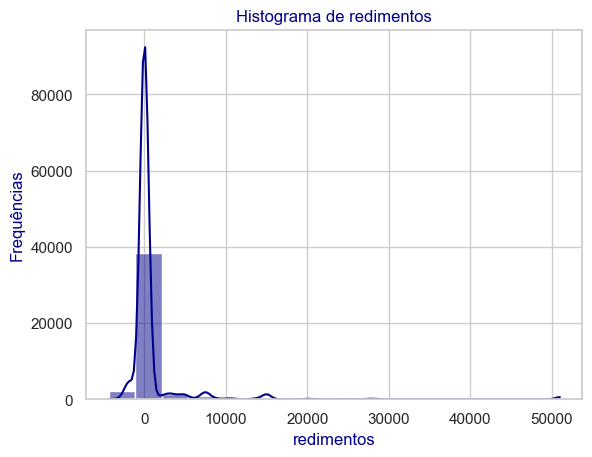

In [ ]:
sns.histplot(dataset2['capital'],color='Darkblue',kde=True)
plt.title('Histograma de redimentos', color='Darkblue')
plt.xlabel('redimentos', color='Darkblue')
plt.ylabel('Frequências', color='Darkblue')

Text(0.5, 0, 'Rendimentos')

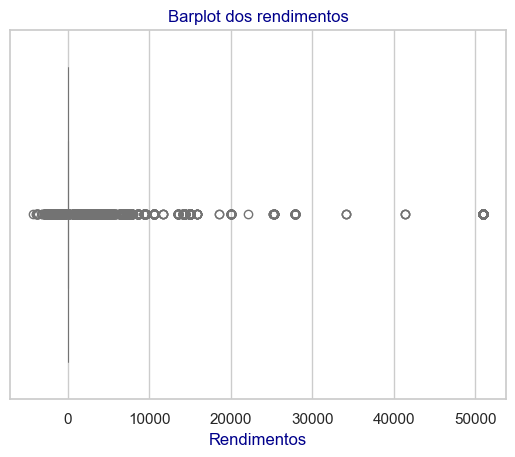

In [ ]:
sns.boxplot(x=dataset2['capital'], color='lightgreen', linewidth=0.75)
plt.title('Barplot dos rendimentos', color='Darkblue')
plt.xlabel('Rendimentos', color='Darkblue')

De forma facilitar a sua observação fizemos a tabela de valores absolutos e relativos e aplicamos a um gráfico de barras e circular de forma a conseguirmos visualizar melhor os dados.

In [ ]:
intervalos = [min(dataset2['capital']),0,3000,6000,9000, 12000, 15000,18000, 21000, 24000,27000,30000,33000,36000,39000,42000, max(dataset2['capital'])]
capitalporclasses=pd.cut(dataset2['capital'],bins=intervalos, include_lowest=True, right=False).value_counts().round(2).sort_index()
Tabeladefreuqências=pd.DataFrame({'V.Absolutos':capitalporclasses,'V.Relativos (%)':capitalporclasses*100/dataset2.shape[0]}).round(2)
Tabeladefreuqências.index = "]" + Tabeladefreuqências.index.astype(str).str[1:-1] + "]"
Tabeladefreuqências

V.Absolutos  V.Relativos (%)
]-4356.0, 0.0]             2118             4.81
]0.0, 3000.0]             38743            87.98
]3000.0, 6000.0]           1121             2.55
]6000.0, 9000.0]            939             2.13
]9000.0, 12000.0]           120             0.27
]12000.0, 15000.0]          121             0.27
]15000.0, 18000.0]          516             1.17
]18000.0, 21000.0]           46             0.10
]21000.0, 24000.0]            1             0.00
]24000.0, 27000.0]           18             0.04
]27000.0, 30000.0]           56             0.13
]30000.0, 33000.0]            0             0.00
]33000.0, 36000.0]            3             0.01
]36000.0, 39000.0]            0             0.00
]39000.0, 42000.0]            3             0.01
]42000.0, 51000.0]            0             0.00

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1722991442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=capitalporclasses.index.astype(str),y=capitalporclasses.values, palette="pastel")


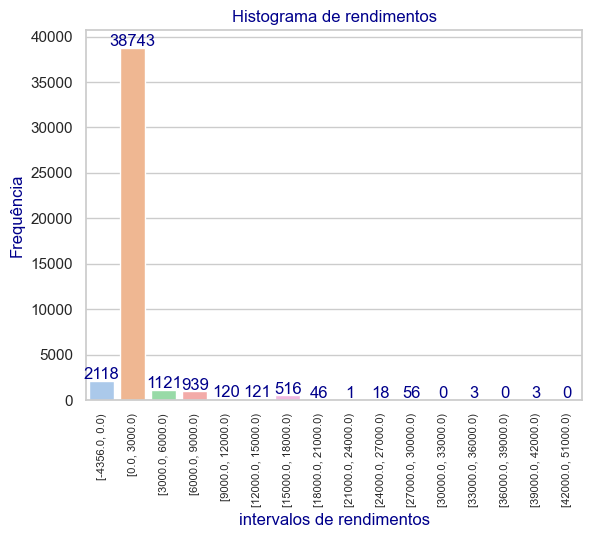

In [ ]:
sns.barplot(x=capitalporclasses.index.astype(str),y=capitalporclasses.values, palette="pastel")
plt.xlabel('intervalos de rendimentos',color='Darkblue', )
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Frequência', color='Darkblue')
plt.title('Histograma de rendimentos', color='Darkblue')
for i, value in enumerate(capitalporclasses.values):
    plt.text(i, value+200, str(value), color='Darkblue', ha='center')

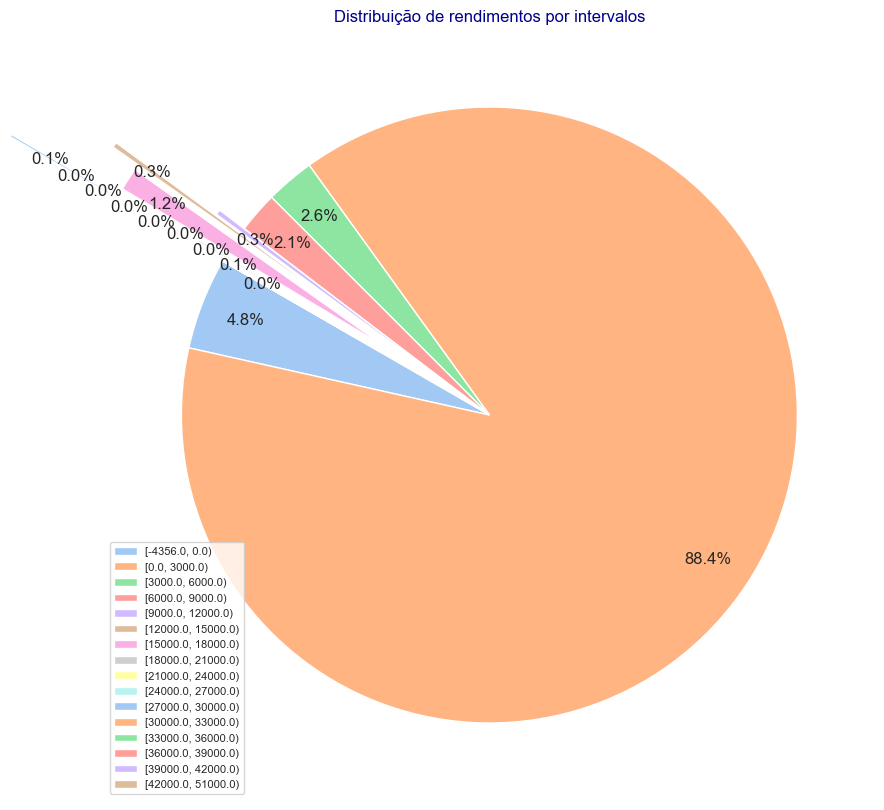

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(capitalporclasses, autopct='%1.1f%%', pctdistance=0.85, startangle=150, explode=(0,0,0,0,0.1,0.5,0.4,0.1,0.3,0.2,0.8,0.6,0.5,0.4,0.7,0))
plt.title('Distribuição de rendimentos por intervalos', color='Darkblue')
plt.legend(capitalporclasses.index, loc='lower left', fontsize=8)

<a id="secao2.51"></a>

Vamos então agora juntar a variável native country numa só variável

In [ ]:
dataset2=pd.read_csv('Adultparte2.csv')

In [ ]:
dataset2.loc[dataset2['native-country'] == ' United-States', 'country_category'] = 'United-States'
dataset2.loc[dataset2['native-country'] != ' United-States', 'country_category'] = 'Not-United-States'
dataset2.drop(columns=['native-country'], inplace=True)
dataset2.to_csv('Adultparte2.csv', index=False)
pd.DataFrame({'V. Absolutos': dataset2["country_category"].value_counts(), 'V.Relativos': (dataset2["country_category"].value_counts()*100/dataset2.shape[0]).round(2)})

V. Absolutos  V.Relativos
United-States             40155        91.19
Not-United-States          3879         8.81

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\3976499988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country_category", data=dataset2, order=dataset2['country_category'].value_counts().index, palette="pastel")


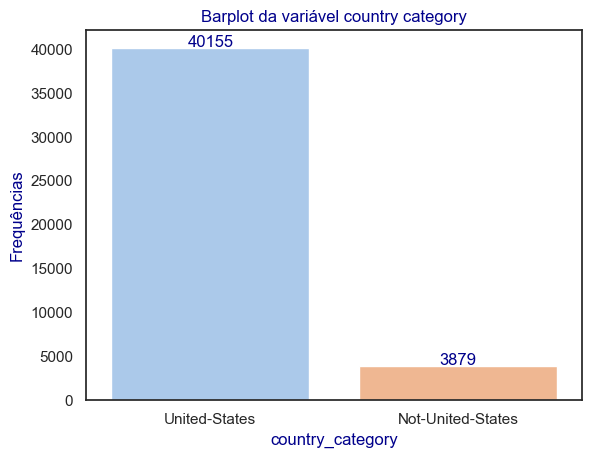

In [ ]:
grafico(2)
sns.countplot(x="country_category", data=dataset2, order=dataset2['country_category'].value_counts().index, palette="pastel")
plt.title('Barplot da variável country category', color='Darkblue')
plt.xlabel('country_category', color='Darkblue')
plt.ylabel('Frequências', color= 'Darkblue')
for i,value in enumerate (dataset2['country_category'].value_counts()):
    plt.text(i,value+100, str(value), ha='center', color='Darkblue')

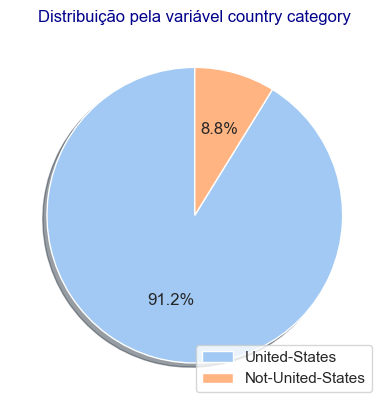

In [ ]:
grafico(3)
plt.pie(dataset2['country_category'].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribuição pela variável country category', color='Darkblue')
plt.legend(dataset2['country_category'].value_counts().index,loc='lower right')

## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao22)
    - ~~[X] [Seleção dos Dados](#secao23)~~
    - ~~[X] [Limpeza dos Dados](#secao24)~~
    - ~~[X] [Derivar Novos Dados](#secao25)~~
    - [X] [Integrar Dados](#secao26)
    - [ ] [Formatar Dados](#secao27)
    - [ ] [Criação do Dataset](#secao28)

<a id="secao26"></a>

Neste ponto e de forma a ter variáveis que possam descrever o nosso dataset de uma forma mais abrangente vamos criar três variáveis qualitativas, que não vão ser integradas no dataset, mas vão ficar apenas para que posteriormente numa análise do dataset se possa fazer um estudo mais concreto e realista. 
O primeiro prende-se com a variável idade, isto porque o valor numérico da idade é importante para que se consiga identificar o individuo pela idade do mesmo, contudo e numa análise como um todo interessa perceber o mesmo por faixa etária para tirar conclusões mais generalistas.


In [ ]:
Age_structure=pd.cut(dataset2['Age'],bins=[min(dataset2['Age']),20,40,60, max(dataset2['Age'])], labels=['Adolescents', 'Yong Adult', 'Adults', 'Eldery'])
pd.DataFrame(Age_structure.value_counts().index)

0
0   Yong Adult
1       Adults
2       Eldery
3  Adolescents

O segundo têm a ver com a educação, mais uma vez interessa nos estudar ao pormenor esta variável, mas numa fase de apresentar os dados será mais importante utilizar uma variável que defina de uma forma geral o tipo de habilitações literárias que os indivíduos possuem (por exemplo: ensino básico, ensino secundário, etc…).Como neste caso o [`.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) está orientado para valores numéricos usamos o [`.isin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) que nos permite depois criar uma lista com o comando [`.select()`](https://numpy.org/doc/stable/reference/generated/numpy.select.html) da biblioteca [Numpy](https://numpy.org/pt/)

In [ ]:
no_education = dataset2['education'] == 'Preschool'
primary_education = dataset2['education'] == '1st-4th'
lower_secondary_education = dataset2['education'].isin(['5th-6th', '7th-8th', '9th'])
upper_secondary_education = dataset2['education'].isin(['10th', '11th', '12th', 'HS-grad'])
vocational_education = dataset2['education'].isin(['Assoc-voc', 'Assoc-acdm', 'Prof-school'])
higher_education = dataset2['education'].isin(['Some-college', 'Doctorate', 'Masters', 'Bachelors'])

conditions = [
    no_education,
    primary_education,
    lower_secondary_education,
    upper_secondary_education,
    vocational_education,
    higher_education
]
choices = [
    'No Education',
    'Primary Education',
    'Lower Secondary Education',
    'Upper Secondary Education',
    'Vocational Education',
    'Higher Education'
]

Education_category = pd.DataFrame(np.select(conditions, choices, default='Unknown'))
Education_category.value_counts()



Unknown    44034
dtype: int64

Por fim e de um ponto de vista do banco interessa também perceber que tipo sector de trabalho (publico/privado e os que não trabalham que foram categorizados como outro) e a sua relação com a nossa variável alvo. Utilizando a mesma lógica do anterior:

In [ ]:
Public = dataset2['Workclass'].isin(['Federal-gov', 'State-gov', 'Local-gov'])
Private = dataset2['Workclass'].isin(['Private', 'Self-emp-not-inc', 'Self-emp-inc'])
Other = dataset2['Workclass'].isin(['Whitout-pay'])

conditions2 = [
    Public,
    Private,
    Other,
]
choices2 = [
    'Public',
    'Private',
    'Other',
]
Employment_Type = pd.DataFrame(np.select(conditions2, choices2, default='Unknown'))
Employment_Type.value_counts()

Unknown    44034
dtype: int64

## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao22)
    - ~~[X] [Seleção dos Dados](#secao23)~~
    - ~~[X] [Limpeza dos Dados](#secao24)~~
    - ~~[X] [Derivar Novos Dados](#secao25)~~
    - ~~[X] [Integrar Dados](#secao26)~~
    - [X] [Formatar Dados](#secao27)
    - [ ] [Criação do Dataset](#secao28)

<a id="secao27"></a>

| Variável        | Formatação                                                                                   | Alteração                                                                                                                                                     |
|-----------------|----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Relationship    | Junção das categorias “husband” e “wife” em uma categoria única denominada de “married”     | Não altera a descrição da variável apenas junta duas categorias que representam a mesma relação.                                                            |
| Income          | Esta variável tinha quatro valores possíveis ' <=50K', ' >50K', ' <=50K.', ' >50K.', contudo a informação era que pretendem transmitir é a mesma logo optamos pela formatação de:  ' <=50K', ' >50K' | Passagem das categorias ' <=50K', ' >50K', ' <=50K.', ' >50K.' para ' <=50K', ' >50K'                                                                        |
| Workclass, Education, Marital-status, Occupation,Relationship Race, Gender        | Todas as variáveis quantitativas tinham no início de cada palavra um espaço.                | Remoção do espaço antes de cada palavra das variáveis. 

No que diz respeito ao tratamento do nosso dataset, alguns pormenores já foram feitos ao longo da compreensão dos dados de forma a retirar insights sem erros. Nomeadamente no que diz respeito a valores omissos onde o dataset apresentava valores omissos representados pelo caracter “?”, substituímos por valores “NA” de forma a serem eliminados de seguida [(foi feito aqui)](#NAN). A quantidade de valores substituídos foram:
 
A nossa variável alvo, também continha alguns erros nomeadamente verificámos que esta recebia 4 valores: ' <=50K', ' >50K', ' <=50K.', ' >50K.', assim e para uniformizar o dataset optamos por utilizar a nomenclatura, ' <=50K', ' >50K'[(foi feito aqui)](#income).

Existiam duas observações que estavam registados como *"husband"* e *"wife"* e estavam classificados na variável *gender* como *"female"* e *male* respetivamente, indicando um erro de introdução, assim alterou-se essas observações.

In [ ]:
dataset2[(dataset2['gender'] == ' Male') & (dataset2['relationship'] == ' Wife')]
dataset2.loc[530:531, 'gender']=' Female'
dataset2.iloc[530:531]

Age Workclass   education  education-num  marital-status     occupation  \
530   23   Private   Bachelors           13.0   Never-married   Adm-clerical   

    relationship    race   gender  hours-per-week  income  capital  \
530    Own-child   White   Female            40.0   <=50K      0.0   

    country_category  
530    United-States

In [ ]:
dataset2[(dataset2['gender'] == ' Female') & (dataset2['relationship'] == ' Husband')]
dataset2.loc[6551:6552, 'gender']=' Male'
dataset2.iloc[6551:6552]

Age Workclass education  education-num marital-status  \
6551   27   Private   HS-grad            9.0      Separated   

              occupation relationship    race gender  hours-per-week  income  \
6551   Machine-op-inspct    Own-child   White   Male            40.0   <=50K   

      capital country_category  
6551      0.0    United-States

In [ ]:
dataset2['relationship'] = dataset2['relationship'].replace({' Husband': 'Married', ' Wife': 'Married'})
pd.DataFrame({'V. Absolutos:': dataset2['relationship'].value_counts(),'V. Relatiovos:': (dataset2['relationship'].value_counts()*100/dataset2.shape[0]).round(2) })

V. Absolutos:  V. Relatiovos:
Married                  20747           47.12
 Not-in-family           11615           26.38
 Own-child                5614           12.75
 Unmarried                4774           10.84
 Other-relative           1284            2.92

C:\Users\garci\AppData\Local\Temp\ipykernel_1368\1198968050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset2["relationship"].value_counts().index, y=dataset2['relationship'].value_counts().values, palette='pastel')


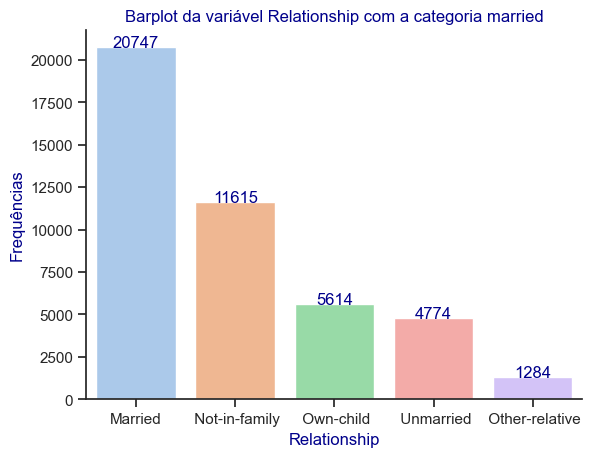

In [ ]:
grafico(1)
sns.barplot(x=dataset2["relationship"].value_counts().index, y=dataset2['relationship'].value_counts().values, palette='pastel')
plt.xlabel('Relationship', color="darkblue")
plt.ylabel('Frequências', color= "darkblue")
plt.title('Barplot da variável Relationship com a categoria married', color="Darkblue")
for i, value in enumerate(dataset2['relationship'].value_counts().values):
    plt.text(i,value,str(value), ha='center', color='darkblue')

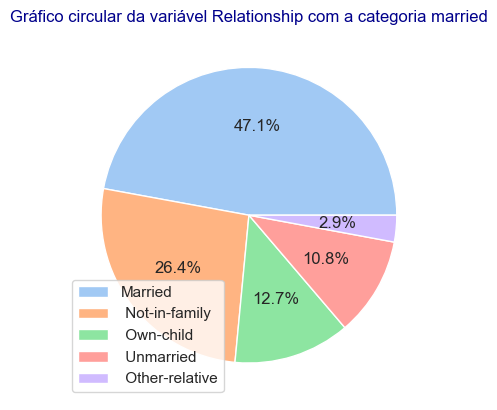

In [ ]:
grafico(1)
plt.pie(dataset2['relationship'].value_counts(), autopct= '%1.1f%%')
plt.title('Gráfico circular da variável Relationship com a categoria married', color= "darkblue")
plt.legend(dataset2['relationship'].value_counts().index, loc="lower left")


Retirar os espaços das variáveis qualitativas.

In [ ]:
dataset2['income'] = dataset2['income'].replace(' >50K', '>50K')
dataset2['income'] = dataset2['income'].replace(' <=50K', '<=50K')
dataset2['Workclass'] = dataset2['Workclass'].replace(' Private', 'Private')
dataset2['Workclass'] = dataset2['Workclass'].replace(' Self-emp-not-inc', 'Self-emp-not-inc')
dataset2['Workclass'] = dataset2['Workclass'].replace(' Local-gov', 'Local-gov')
dataset2['Workclass'] = dataset2['Workclass'].replace(' State-gov', 'State-gov')
dataset2['Workclass'] = dataset2['Workclass'].replace(' Self-emp-inc', 'Self-emp-inc')
dataset2['Workclass'] = dataset2['Workclass'].replace(' Federal-gov', 'Federal-gov')
dataset2['Workclass'] = dataset2['Workclass'].replace(' Without-pay', 'Without-pay')
dataset2['education'] = dataset2['education'].replace(' HS-grad', 'HS-grad')
dataset2['education'] = dataset2['education'].replace(' Some-college', 'Some-college')
dataset2['education'] = dataset2['education'].replace(' Bachelors', 'Bachelors')
dataset2['education'] = dataset2['education'].replace(' Masters', 'Masters')
dataset2['education'] = dataset2['education'].replace(' Assoc-voc', 'Assoc-voc')
dataset2['education'] = dataset2['education'].replace(' 11th', '11th')
dataset2['education'] = dataset2['education'].replace(' Assoc-acdm', 'Assoc-acdm')
dataset2['education'] = dataset2['education'].replace(' 10th', '10th')
dataset2['education'] = dataset2['education'].replace(' 7th-8th', '7th-8th')
dataset2['education'] = dataset2['education'].replace(' Prof-school', 'Prof-school')
dataset2['education'] = dataset2['education'].replace(' 9th', '9th')
dataset2['education'] = dataset2['education'].replace(' 12th', '12th')
dataset2['education'] = dataset2['education'].replace(' Doctorate', 'Doctorate')
dataset2['education'] = dataset2['education'].replace(' 5th-6th', '5th-6th')
dataset2['education'] = dataset2['education'].replace(' 1st-4th', '1st-4th')
dataset2['education'] = dataset2['education'].replace(' Preschool', 'Preschool')
dataset2['education'] = dataset2['education'].replace(' Married-civ-spouse', 'Married-civ-spouse')
dataset2['education'] = dataset2['education'].replace(' Never-married', 'Never-married')
dataset2['education'] = dataset2['education'].replace(' Divorced', 'Divorced')
dataset2['education'] = dataset2['education'].replace(' Separated', 'Separated')
dataset2['education'] = dataset2['education'].replace(' Widowed', 'Widowed')
dataset2['education'] = dataset2['education'].replace(' Married-spouse-absent', 'Married-spouse-absent')
dataset2['education'] = dataset2['education'].replace(' Married-AF-spouse', 'Married-AF-spouse')
dataset2['occupation'] = dataset2['occupation'].replace(' Craft-repair', 'Craft-repair')
dataset2['occupation'] = dataset2['occupation'].replace(' Prof-specialty', 'Prof-specialty')
dataset2['occupation'] = dataset2['occupation'].replace(' Exec-managerial', 'Exec-managerial')
dataset2['occupation'] = dataset2['occupation'].replace(' Adm-clerical', 'Adm-clerical')
dataset2['occupation'] = dataset2['occupation'].replace(' Sales', 'Sales')
dataset2['occupation'] = dataset2['occupation'].replace(' Other-service', 'Other-service')
dataset2['occupation'] = dataset2['occupation'].replace(' Machine-op-inspct', 'Machine-op-inspct')
dataset2['occupation'] = dataset2['occupation'].replace(' Transport-moving', 'Transport-moving')
dataset2['occupation'] = dataset2['occupation'].replace(' Handlers-cleaners', 'Handlers-cleaners')
dataset2['occupation'] = dataset2['occupation'].replace(' Farming-fishing', 'Farming-fishing')
dataset2['occupation'] = dataset2['occupation'].replace(' Tech-support', 'Tech-support')
dataset2['occupation'] = dataset2['occupation'].replace(' Protective-serv', 'Protective-serv')
dataset2['occupation'] = dataset2['occupation'].replace(' Priv-house-serv', 'Priv-house-serv')
dataset2['occupation'] = dataset2['occupation'].replace(' Armed-Forces', 'Armed-Forces')
dataset2['relationship'] = dataset2['relationship'].replace(' Not-in-family', 'Not-in-family')
dataset2['relationship'] = dataset2['relationship'].replace(' Own-child', 'Own-child')
dataset2['relationship'] = dataset2['relationship'].replace(' Unmarried', 'Unmarried')
dataset2['relationship'] = dataset2['relationship'].replace(' Other-relative', 'Other-relative')
dataset2['race'] = dataset2['race'].replace(' White', 'White')
dataset2['race'] = dataset2['race'].replace(' Black', 'Black')
dataset2['race'] = dataset2['race'].replace(' Asian-Pac-Islander', 'Asian-Pac-Islander')
dataset2['race'] = dataset2['race'].replace(' Amer-Indian-Eskimo', 'Amer-Indian-Eskimo')
dataset2['race'] = dataset2['race'].replace(' Other', 'Other')
dataset2['gender'] = dataset2['gender'].replace(' Male', 'Male')
dataset2['gender'] = dataset2['gender'].replace(' Female', 'Female')

Por questões de facilidade com os comandos de modelação vamos colocar a nossa variável alvo como a primeira coluna com o comando [`.reindex()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html), de forma a simplificar tambem todas as tecnicas vamos colocar as variáveis educatione  education num no final do dataset para ser de fácil utilização de uma ou de outra.

Criando assim o nosso dataset para aplicar aos nossos modelos

## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)

- [X] [Preparação dos Dados](#secao22)
    - ~~[X] [Seleção dos Dados](#secao23)~~
    - ~~[X] [Limpeza dos Dados](#secao24)~~
    - ~~[X] [Derivar Novos Dados](#secao25)~~
    - ~~[X] [Integrar Dados](#secao26)~~
    - ~~[X] [Formatar Dados](#secao27)~~
    - **[ ] [Criação do Dataset](#secao28)**

<a id="secao28"></a>

In [ ]:
dataset2 = dataset2.reindex(columns=['income', 'Age', 'Workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'capital', 'country_category', 'education-num','education'])
dataset2.to_csv('Adultparte2.csv', index=False)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44034 entries, 0 to 44033
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income            44034 non-null  object 
 1   Age               44034 non-null  int64  
 2   Workclass         44034 non-null  object 
 3   marital-status    44034 non-null  object 
 4   occupation        44034 non-null  object 
 5   relationship      44034 non-null  object 
 6   race              44034 non-null  object 
 7   gender            44034 non-null  object 
 8   hours-per-week    44034 non-null  float64
 9   capital           44034 non-null  float64
 10  country_category  44034 non-null  object 
 11  education-num     44034 non-null  float64
 12  education         44034 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.4+ MB


In [ ]:
dataset2['race']=dataset2['race'].astype('category').cat.codes
dataset2['Workclass']=dataset2['Workclass'].astype('category').cat.codes
dataset2['marital-status']=dataset2['marital-status'].astype('category').cat.codes
dataset2['occupation']=dataset2['occupation'].astype('category').cat.codes
dataset2['relationship']=dataset2['relationship'].astype('category').cat.codes
dataset2['gender'] = dataset2['gender'].replace({'Male': 0, 'Female': 1}).astype('category').cat.codes
dataset2['country_category']=dataset2['country_category'].astype('category').cat.codes
dataset2['income'] = dataset2['income'].replace({'>50K': 1, '<=50K': 0}).astype('category').cat.codes
dataset2['education'] = dataset2['education'].str.strip().replace({'Preschool': 1,'1st-4th': 2,'5th-6th': 3,'7th-8th': 4,'9th': 5,'10th': 6,'11th': 7,'12th': 8,'HS-grad': 9,'Some-college': 10,'Assoc-voc': 11,'Assoc-acdm': 1,'Bachelors': 13,'Masters': 14,'Prof-school': 15,'Doctorate': 16}).astype('int')
dataset2.to_csv('Adultparte22.csv', index=False)

è importante verificarmos como é que ficou a correlação com as nossas variáveis  criadas para o efeito o que resultou no seguinte corplot

Text(0.5, 1.0, 'Gráfico de correlação das variáveis com o nosso dataset')

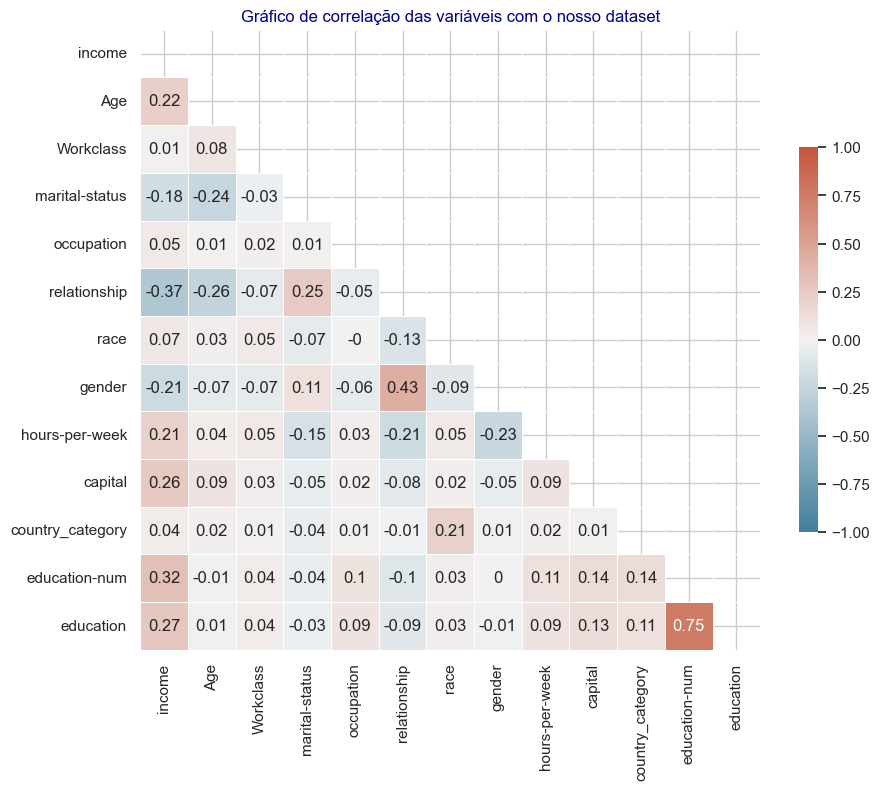

In [ ]:
grafico(3)
plt.figure(figsize=(10,10))
sns.heatmap(dataset2.corr().round(2),annot=True,mask=np.triu(np.ones_like(dataset2.corr(), dtype=bool)) 
,cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=1, vmin=-1, 
center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Gráfico de correlação das variáveis com o nosso dataset', color='Darkblue')

In [ ]:
dataset2 = dataset2.reindex(columns=['Age', 'marital-status', 'relationship', 'gender', 'hours-per-week', 'capital', 'education-num', 'Workclass', 'occupation', 'race', 'country_category','education','income'])
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44034 entries, 0 to 44033
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               44034 non-null  int64  
 1   marital-status    44034 non-null  int8   
 2   relationship      44034 non-null  int8   
 3   gender            44034 non-null  int8   
 4   hours-per-week    44034 non-null  float64
 5   capital           44034 non-null  float64
 6   education-num     44034 non-null  float64
 7   Workclass         44034 non-null  int8   
 8   occupation        44034 non-null  int8   
 9   race              44034 non-null  int8   
 10  country_category  44034 non-null  int8   
 11  education         44034 non-null  int32  
 12  income            44034 non-null  int8   
dtypes: float64(3), int32(1), int64(1), int8(8)
memory usage: 1.8 MB


Importa então e antes de começar mos com a aplicaçºoes dos modelos definir as nossas variáveis e a dimensão do conjuntod e treino e conjunto de teste


## Metodologia CRISP-DM [(2ª Parte do Trabalho)](#secao99)
- ~~[X] [Preparação dos Dados](#secao22)~~
- [X] [Preparação dos Dados](#secao52)
    - [X] **[Escolha de Técnicas de modelação](#secao521)**
    - [ ] [Definir mecanismos de teste](#secao522)
    - [ ] [Construção do Modelo](#secao52)
    - [ ] [Avaliar o Modelo](#secao524)
- [ ] [Avaliação](#secao31)
    - [ ] [Avaliar os Resultados](#secao32)
    - [ ] [Revisão do Processo](#secao33)
    - [ ] [Determinar Ações Futuras](#secao34)
- [ ] [Colocação em produção](#secao41)
    - [ ] [Planeamento da colocação em produção](#secao42)
    - [ ] [Planeamento da monitorização e manutenção](#secao43)
    - [ ] [Elaboração do relatório final](#secao44)
    - [ ] [Revisão do projeto](#secao45)


<a id="secao521"></a>

ASsim e para os nossos problemas iremos aplicar as seguintes condições:

- A nossa variável preditores correpondem a todas as variáveis do nosso dataset diferentes da variável income, Não consederamos a variável education
- A nossa variável classe correponde a variável income
- O conjunto de treino é composto por 70% do dataset e o conjunto de treino por 30%
- Renomeamos duas listas com a ordem das nossas colunas do dataset de forma a ser mais facil a construções dos nosso gráficos
- Não faz sentido aplicarmos tecnicas de redução de dimensionalidade uma vez que as nossas variáveis alvos para os nossos problemas de DM são sempre Binominais como tal as nossas variáveis alvo tem as dimensoes otimas.
- A seleção de features é feito em cada modelo especifico.
- A seleção de modelo é justificado no markdown seguinte

In [ ]:
preditores = dataset2.iloc[:, 0:11].values
classe = dataset2.iloc[:,12].values
todas_caracteristicas = ('Age', 'marital-status', 'relationship', 'gender', 'hours-per-week', 'capital', 'education-num', 'Workclass', 'occupation', 'race', 'country_category','education')
nomes_caracteristicas = ('Age', 'marital-status', 'relationship', 'gender', 'hours-per-week', 'capital', 'education-num', 'Workclass', 'occupation', 'race', 'country_category')
x_treino, x_teste, y_treino, y_teste = train_test_split(preditores, classe, test_size=0.3, random_state=42)


Os dois blocos de codigo seguinte correspondem a seleção de atributos que de forma ciclica aplicamos a todos os modelos que iremos utilizar tanto para a regressão como para a classificação, assim sendo e de forma a ser mais simples, aplicamos dois codigos:
- um que tem o conjunto de todas as tencinas utilizadas, mas que em contrapartida demora muito tempo a definir os parametros corretos. Aqui podiamos criar uma variável apra guardar os resultados, contudo e no ponto de vista avaliativo a lógica será ver se o objetivo é conseguido logo no nosso ponto de vista nao faria sentido guardar como uma variável, pois para verificar essa variável teria que se correr o código. Assim colocamos o codigo como comentário para não correr e "colocar" o programa lento.
- Em alternativa fizemos o mesmo bloco de codigo mas sem as tecnicas de SVR e SVM que eram as que faziam o programa mais lento. o que corresponde ao segundo bloco de codigo que é a copia do primeiro sem as duas tecncias referidas.

In [ ]:
dataset2["relationship"].value_counts()

0    20747
1    11615
3     5614
4     4774
2     1284
Name: relationship, dtype: int64

In [ ]:
#warnings.filterwarnings('ignore')
#seed = 42
#modelosC = {
    #'LogisticRegression': LogisticRegression(random_state=seed),
    #'K-Nearest Neighbors': KNeighborsClassifier(),
    #'Naïve Bayes': GaussianNB(),
    #'SVM': SVC(),
    #'DecisionTree': DecisionTreeClassifier(random_state=seed),
    #'Random Forest': RandomForestClassifier(random_state=seed)
#}
#param_grid_classificacao = {
    #'LogisticRegression': {'C': [0.1, 1, 10]},
    #'K-Nearest Neighbors': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
    #'Naïve Bayes': {},
    #'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    #'DecisionTree': {'max_depth': [3, 5, None]},
    #'Random Forest': {'n_estimators': [50, 100, 200]}
#}
#modelosR = {
    #'LinearRegression': LinearRegression(),
    #'Random Forest': RandomForestRegressor(random_state=seed),
    #'K-Nearest Neighbors': KNeighborsRegressor(),
    #'SVR': SVR(),
    #'DecisionTree': DecisionTreeRegressor(random_state=seed)
#}
#param_grid_regressao = {
    #'LinearRegression': {},
    #'Random Forest': {'n_estimators': [50, 100, 200]},
    #'K-Nearest Neighbors': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
    #'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    #'DecisionTree': {'max_depth': [3, 5, None]}
#}
#scaler = StandardScaler()
#x_treinox = scaler.fit_transform(x_treino)
#x_testex = scaler.transform(x_teste)
#crosval = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
#for name, modeloC in modelosC.items():
    #grid_search = GridSearchCV(modeloC, param_grid_classificacao[name], scoring='accuracy', cv=crosval, n_jobs=-1)
    #grid_search.fit(x_treinox, y_treino)
    #print(f'{name}: Mean Accuracy = {grid_search.best_score_}')
    #print(f'Best Parameters: {grid_search.best_params_}')
#print('\n')
#for name, modeloR in modelosR.items():
    #grid_search = GridSearchCV(modeloR, param_grid_regressao[name], scoring='neg_mean_squared_error', cv=crosval, n_jobs=-1)
    #grid_search.fit(x_treinox, y_treino)
    #print(f'{name}: Mean MSE = {-grid_search.best_score_}')
    #print(f'Best Parameters: {grid_search.best_params_}')
#print('\n')


In [ ]:
warnings.filterwarnings('ignore')
seed = 42
modelosC = {
    'LogisticRegression': LogisticRegression(random_state=seed),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed)
}
param_grid_classificacao = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'K-Nearest Neighbors': {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11]},
    'Naïve Bayes': {},
    'SVM': {},
    'DecisionTree': {'max_depth': [3, 5, None]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}
for name, modeloC in modelosC.items():
    grid_search = GridSearchCV(modeloC, param_grid_classificacao[name], scoring='accuracy', cv=10)
    grid_search.fit(x_treino, y_treino)
    print(f'{name}: Mean Accuracy = {grid_search.best_score_}')
    print(f'Best Parameters: {grid_search.best_params_}')

print('\n')
modelosR = {
    'LinearRegression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=seed),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=seed)
}
param_grid_regressao = {
    'LinearRegression': {},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'LinearRegression': {},
    'K-Nearest Neighbors': {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11]},
    'SVR': {},
    'DecisionTree': {'max_depth': [3, 5, None]}
}

for name, modeloR in modelosR.items():
    grid_search = GridSearchCV(modeloR, param_grid_regressao[name], scoring='neg_mean_squared_error', cv=10)
    grid_search.fit(x_treino, y_treino)
    print(f'{name}: Mean MSE = {-grid_search.best_score_}')
    print(f'Best Parameters: {grid_search.best_params_}')

print('\n')
crosval = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)


LogisticRegression: Mean Accuracy = 0.8082605980378889
Best Parameters: {'C': 1}
K-Nearest Neighbors: Mean Accuracy = 0.8456344720151096
Best Parameters: {'n_neighbors': 8}
Naïve Bayes: Mean Accuracy = 0.8176357210408212
Best Parameters: {}
SVM: Mean Accuracy = 0.7902538212209341
Best Parameters: {}
DecisionTree: Mean Accuracy = 0.8439800602117113
Best Parameters: {'max_depth': 5}
Random Forest: Mean Accuracy = 0.8406706998648467
Best Parameters: {'n_estimators': 200}


LinearRegression: Mean MSE = 0.13515745173597246
Best Parameters: {}
Random Forest: Mean MSE = 0.11511137181874906
Best Parameters: {'n_estimators': 200}
K-Nearest Neighbors: Mean MSE = 0.10883982728830097
Best Parameters: {'n_neighbors': 11}
SVR: Mean MSE = 0.1711330095968319
Best Parameters: {}
DecisionTree: Mean MSE = 0.11141078156696016
Best Parameters: {'max_depth': 5}




- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - **[ ] [Definir mecanismos de teste](#secao522)**
    - [ ] [Construção do Modelo](#secao52)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao522"></a>

### DM1

|    Modelo         | Workclass | Education | Marital-status | Occupation | Relationship | Race | Gender | Country category | Age | Capital | Hours per week | Income |
|:-----------------:|:---------:|:---------:|:--------------:|:----------:|:------------:|:----:|:------:|:----------------:|:---:|:-------:|:--------------:|:------:|
| Decision Tree     |     X     |           |       X        |            |       X      |   X  |    X   |         X        |     |         |                |        |
| Random Forest     |     X     |           |       X        |            |       X      |   X  |    X   |         X        |     |         |                |        |
| Regressão Linear  |     X     |     X     |       X        |      X     |       X      |   X  |    X   |         X        |  X  |    X    |       X        |    X   |
| K-Nearest Neighbors |   X     |     X     |       X        |      X     |       X      |   X  |    X   |         X        |  X  |    X    |       X        |    X   |

**Comparação dentre dos Modelos:**

$R^2_{ajustado} = 1 - \frac{{(n - p - 1)}}{{(1 - R^2)(n - 1)}}$

$R^2 = 1 - \frac{SumSquare_{res}}{SumSquare_{total}}$

Melhor modelo:

O que apresentar melhor métrica de $R^2$

**Comparação entre Modelos:**

$MSE = \frac{1}{N} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$

Modelo preferível:
$\text{Modelo preferível} = \min({MSE}_{\text{DT}}, {MSE}_{\text{RF}}, {MSE}_{\text{RL}}, {MSE}_{\text{KNN}})$

### DM2

|    Modelo         | Workclass | Education | Marital-status | Occupation | Relationship | Race | Gender | Country category | Age | Capital | Hours per week | Income |
|:-----------------:|:---------:|:---------:|:--------------:|:----------:|:------------:|:----:|:------:|:----------------:|:---:|:-------:|:--------------:|:------:|
| Decision Tree     |     X     |           |       X        |            |       X      |      |        |                  |     |         |                |        |
| SVM |   X     |     X     |       X        |      X     |       X      |   X  |    X   |         X        |  X  |    X    |  X  |    X    |
| Regressão Logística |   X     |     X     |       X        |      X     |       X      |   X  |    X   |         X        |  X  |    X    |       X        |    X   |
| Naive Bayes       |     X     |     X     |                |      X     |       X      |   X  |    X   |         X        |     |         |                |        |

**Comparação dentro dos Modelos:**

$R^2_{ajustado} = 1 - \frac{{(n - p - 1)}}{{(1 - R^2)(n - 1)}}$

$R^2 = 1 - \frac{SumSquare_{res}}{SumSquare_{total}}$

Melhor modelo:
O que apresentar melhor métrica de $R^2$

**Comparação entre Modelos:**

$\text{accuracy\%} = \frac{{VP + VN}}{{VP + VN + FP + FN}} \times 100$


Modelo preferível:
O que apresentar melhor métrica de *accuracy*

### DM3

|    Modelo         | Workclass | Education | Marital-status | Occupation | Relationship | Race | Gender | Country category | Age | Capital | Hours per week | Income |
|:-----------------:|:---------:|:---------:|:--------------:|:----------:|:------------:|:----:|:------:|:----------------:|:---:|:-------:|:--------------:|:------:|
| Regressão Linear  |     X     |     X     |       X        |      X     |       X      |   X  |    X   |         X        |  X  |    X    |       X        |    X   |
| Random Forest     |     X     |           |       X        |            |              |      |        |        X         |     |         |        X       |        |

**Comparação dentro dos Modelos:**

$R^2_{ajustado} = 1 - \frac{{(n - p - 1)}}{{(1 - R^2)(n - 1)}}$

$R^2 = 1 - \frac{SumSquare_{res}}{SumSquare_{total}}$

Melhor modelo:
O que apresentar melhor métrica de $R^2$


**Comparação entre Modelos:**

$MSE = \frac{1}{N} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$

Modelo preferível:
$\text{Modelo preferível} = \min({MSE}_{\text{RF}}, {MSE}_{\text{RL}})$

### DM4
$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}} \
$

Melhor modelo:
O que apresentar melhor métrica de *Precision*

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - [X] [DM1](#secao5241)
        - [X] [DT](#secao52411)
        - [ ] [RF](#secao52412)
        - [ ] [RL](#secao52413)
        - [ ] [KNN](#secao52414)
      - [ ] [DM2](#secao6)
        - [ ] [DT](#secao61)
        - [ ] [SVM](#secao62)
        - [ ] [RLog](#secao63)
        - [ ] [NB](#secao64)
      - [ ] [DM3](#secao7)
        - [ ] [RF](#secao71)
        - [ ] [RL](#secao72)
      - [ ] [DM4](#secao8)
        - [ ] [DT](#secao81)
        - [ ] [SVM](#secao82)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao5241"></a>


Vamos utilizar [`DecisionTreeRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor)

In [ ]:
arvore = DecisionTreeRegressor(random_state=42, max_depth=5)
arvore.fit(x_treino, y_treino)
previsoes_arvore = arvore.predict(x_teste)
score=arvore.score(x_teste, y_teste)
r2 = r2_score(y_teste, previsoes_arvore)
mse= mean_squared_error(y_teste, previsoes_arvore)
mse_DT= mse
r2_ajustado = 1 - (1 - r2) * (x_teste.shape[0] - 1) / (x_teste.shape[0] - x_teste.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.4154          0.415  0.1106

arvore de decisão sem a seleção de atributos, os pesos das variáveis são as seguintes, utilizando o comando [`ExtraTreesRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)

In [ ]:
arvorepodada = ExtraTreesRegressor(random_state=42, max_depth=5)
arvorepodada.fit(x_treino, y_treino)
importancias = arvorepodada.feature_importances_.round(3)
pd.DataFrame({    
    'Característica': nomes_caracteristicas,
    'Importância': importancias})

Característica  Importância
0                Age        0.019
1     marital-status        0.162
2       relationship        0.384
3             gender        0.010
4     hours-per-week        0.006
5            capital        0.175
6      education-num        0.241
7          Workclass        0.001
8         occupation        0.002
9               race        0.000
10  country_category        0.000

Neste caso as variáveis mais importantes são a primeira, a terceira, a quinta,a sexta e a sétima relembrar que nós dividimos os nossos preditores da coluna 1 a 12(inclusive) e a ordem nossas colunas está da seguinte forma:


| Número | Valor           |
|--------|-----------------|
| 0      | Age             |
| 1      | marital-status  |
| 2      | relationship    |
| 3      | gender          |
| 4      | hours-per-week  |
| 5      | capital         |
| 6      | education-num   |
| 7      | Workclass       |
| 8      | occupation      |
| 9      | race            |
| 10     | country_category|
| 11     | education       |


O que significa que o modelo sem seleção de features irá contemplar as variáveis  relationship, marital-status, capital e education-num sendo que são estas que contribuem mais para a definição dos indiviudos que ganham mais ou menos de $50.000.

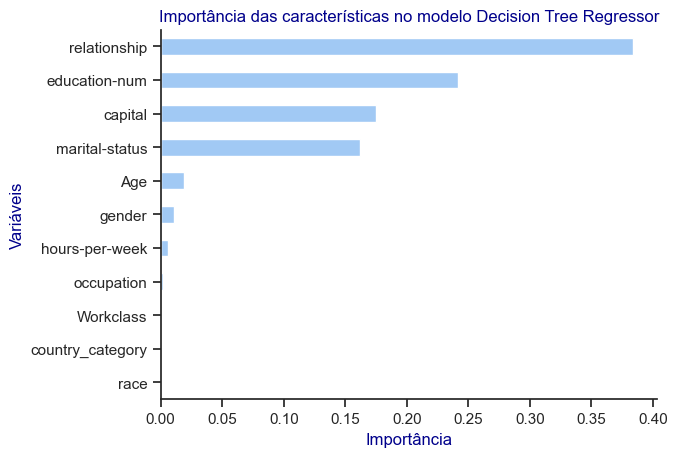

In [ ]:
importancias= pd.DataFrame({
    'Característica': nomes_caracteristicas,
    'Importância': arvorepodada.feature_importances_
})
grafico(1)
importancias= importancias.sort_values(by='Importância', ascending=False)
importancias.plot(kind='barh', x='Característica', y='Importância', legend=False)
plt.title('Importância das características no modelo Decision Tree Regressor', color='darkblue')
plt.xlabel('Importância', color='darkblue')
plt.ylabel('Variáveis', color='darkblue')
plt.gca().invert_yaxis()
plt.show()


Vamos então agora fazer a seleção de features mais concretamente SequentialFeatureSelector-  [`SFS()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)

In [ ]:
warnings.filterwarnings('ignore')
sfs1=SFS(arvore, k_features=11, forward=True, floating=False, verbose=2, scoring='neg_mean_squared_error', cv=crosval)
sfs1=sfs1.fit(preditores,classe)
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


[2024-06-19 08:38:49] Features: 1/11 -- score: -0.1489661492072757
[2024-06-19 08:38:50] Features: 2/11 -- score: -0.12204663885558567
[2024-06-19 08:38:52] Features: 3/11 -- score: -0.11121010060944123
[2024-06-19 08:38:55] Features: 4/11 -- score: -0.11101581953676298
[2024-06-19 08:38:58] Features: 5/11 -- score: -0.11101011857682937
[2024-06-19 08:39:01] Features: 6/11 -- score: -0.11100917418625925
[2024-06-19 08:39:04] Features: 7/11 -- score: -0.11101759570848951
[2024-06-19 08:39:06] Features: 8/11 -- score: -0.1110090807221135
[2024-06-19 08:39:08] Features: 9/11 -- score: -0.11101768745360806
[2024-06-19 08:39:10] Features: 10/11 -- score: -0.11104087217086771
[2024-06-19 08:39:10] Features: 11/11 -- score: -0.11115511531004492

feature_idx  \
1                                 (5,)   
2                               (2, 5)   
3                            (2, 5, 6)   
4                         (2, 4, 5, 6)   
5                      (2, 4, 5, 6, 7)   
6                   (1, 2, 4, 5, 6, 7)   
7                (1, 2, 3, 4, 5, 6, 7)   
8            (1, 2, 3, 4, 5, 6, 7, 10)   
9         (1, 2, 3, 4, 5, 6, 7, 9, 10)   
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [-0.14882200364723877, -0.1445155137310531, -0... -0.148966   
2   [-0.12098513498278834, -0.11996891851897296, -... -0.122047   
3   [-0.11143336049023171, -0.10768242684917592, -...  -0.11121   
4   [-0.11087378437516761, -0.10770688334893334, -... -0.111016   
5   [-0.11087541760490514, -0.10770879709439184, -...  -0.11101   
6   [-0.11087541760490514, -0.10770879709439184, -... -0.111009   
7   [-0.11087541760490514, -0.10770879709439184, -... -0.111018   
8   [-0.11087541760490514, -0.10770879709439184, -... -0.111009   
9   [-0.11087541760490514, -0.10770879709439184, -... -0.111018   
10  [-0.11087541760490514, -0.10770879709439184, -... -0.111041   
11  [-0.11062886481404881, -0.1075171715042135, -0... -0.111155   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (5,)  0.001528  0.004029  0.000748  
2                               (2, 5)  0.001023  0.002697  0.000501  
3                            (2, 5, 6)  0.001151  0.003035  0.000564  
4                         (2, 4, 5, 6)  0.001229   0.00324  0.000602  
5                      (2, 4, 5, 6, 7)  0.001221  0.003221  0.000598  
6                   (1, 2, 4, 5, 6, 7)  0.001227  0.003236  0.000601  
7                (1, 2, 3, 4, 5, 6, 7)  0.001221  0.003219  0.000598  
8            (1, 2, 3, 4, 5, 6, 7, 10)  0.001223  0.003226  0.000599  
9         (1, 2, 3, 4, 5, 6, 7, 9, 10)  0.001223  0.003225  0.000599  
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.001222  0.003223  0.000598  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.001162  0.003065  0.000569

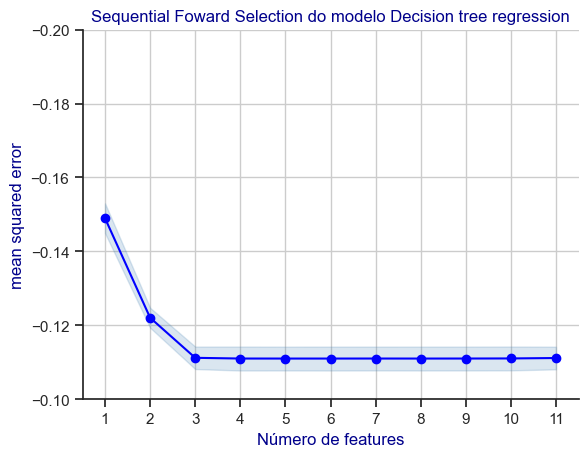

In [ ]:
plot_sfs(sfs1.get_metric_dict(),kind='std_dev')
plt.ylim([-0.1, -0.2])
plt.title('Sequential Foward Selection do modelo Decision tree regression', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('mean squared error', color="darkblue")
plt.grid()
plt.show()

Atraves da análise do gráfico anterior e da tabela podemos afirmar que o modelo com 3 features a 2,5,6 é o modelo mais otimizado. Sendo que as variáveis que otimizam o modelo são as (2, 5, 6)  que correspondem a “relationship”, “education-num” e “capital” sendo que os valores das nossas métricas da avaliação são:

In [ ]:
arvorepodada = ExtraTreesRegressor(random_state=42,max_depth=5)
x_treino2 = x_treino[:,[2, 5, 6]]
x_teste2 = x_teste[:,[2, 5, 6]]
arvorepodada.fit(x_treino2, y_treino)
previsoes_arvorepodada = arvorepodada.predict(x_teste2)
mse= mean_squared_error(y_teste, previsoes_arvorepodada)
r2 = abs(r2_score(y_teste, previsoes_arvorepodada))
r2_ajustado2 = 1 - (1 - r2) * (x_teste2.shape[0] - 1) / (x_teste2.shape[0] - x_teste2.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.376         0.3758  0.1181

A nossa arvore de decisão simplificada por ser traduzida no seguinte gráfico, [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (devido as suas dimensões vamos remeter o mesmo para anexo)

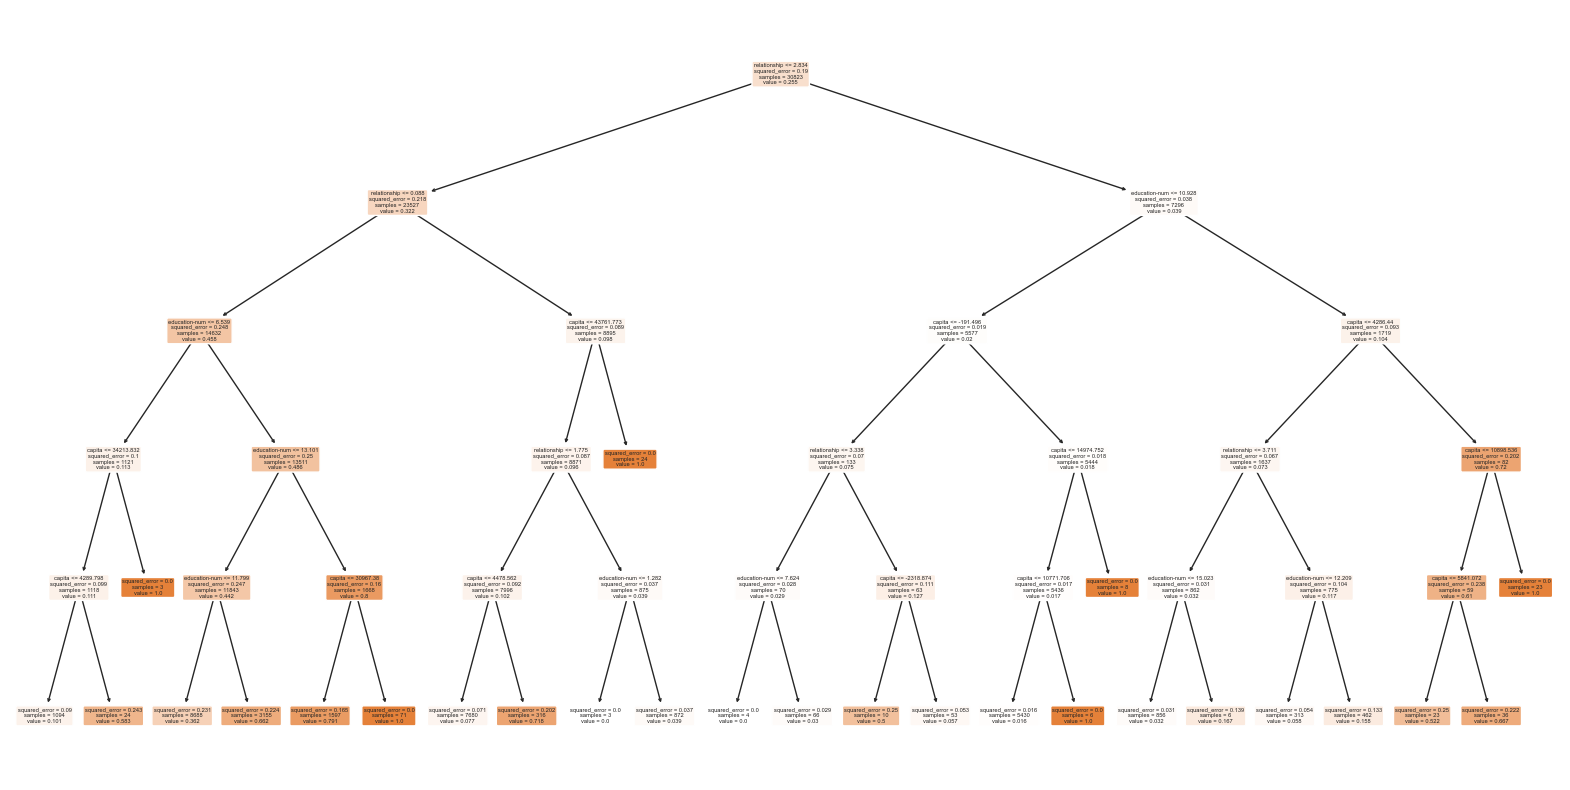

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(arvorepodada.estimators_[0], feature_names=['relationship', 'capita', 'education-num'], filled=True, rounded=True)
plt.show()


- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - [X] [DM1](#secao5241)
        - ~~[X] [DT](#secao52411)~~
        - [X] [RF](#secao52412)
        - [ ] [RL](#secao52413)
        - [ ] [KNN](#secao52414)
      - [ ] [DM2](#secao6)
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao5242"></a>

Assim está a nossa floresta [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) com os parametros definidos

In [ ]:
floresta = RandomForestRegressor(n_estimators = 200, random_state=42)
floresta.fit(x_treino, y_treino)
previsoes_floresta=floresta.predict(x_teste)
pd.DataFrame({    
    'Característica': nomes_caracteristicas,
    'Importância': floresta.feature_importances_.round(4)})

Característica  Importância
0                Age       0.1797
1     marital-status       0.0111
2       relationship       0.2153
3             gender       0.0186
4     hours-per-week       0.1011
5            capital       0.1616
6      education-num       0.1456
7          Workclass       0.0510
8         occupation       0.0839
9               race       0.0195
10  country_category       0.0125

In [ ]:
r2 = r2_score(y_teste, previsoes_floresta)
r2_ajustado = 1 - (1 - r2) * (x_teste.shape[0] - 1) / (x_teste.shape[0] - x_teste.shape[1] - 1)
mse= mean_squared_error(y_teste, previsoes_floresta)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.4053         0.4048  0.1125

Verificamos pelo anterior que as caracteristicas mais imporantes para o modelo de Radom forest são a primeira, a terceira, a quinta sexta e sétima, sendo que em comparação com o modelo anterior o que difere é o peso atribuido as variáveis.

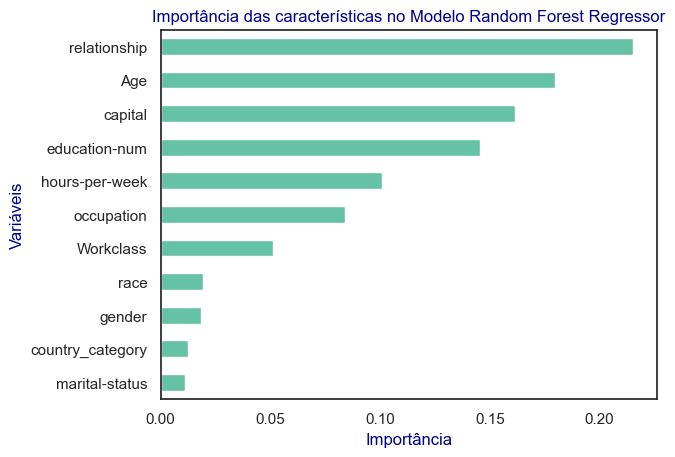

In [ ]:
nomes_caracteristicas = ['Age', 'marital-status', 'relationship', 'gender', 'hours-per-week', 'capital', 'education-num', 'Workclass', 'occupation', 'race', 'country_category']
importancias= pd.DataFrame({
    'Característica': nomes_caracteristicas,
    'Importância': floresta.feature_importances_
})
grafico(2)
importancias= importancias.sort_values(by='Importância', ascending=False)
importancias.plot(kind='barh', x='Característica', y='Importância', legend=False)
plt.title('Importância das características no Modelo Random Forest Regressor', color='darkblue')
plt.xlabel('Importância', color='darkblue')
plt.ylabel('Variáveis', color='darkblue')
plt.gca().invert_yaxis()
plt.show()


Vamos então fazer a seleção de features para o nosso modelo de *Random Forest*

In [ ]:
warnings.filterwarnings('ignore')
sfs2=SFS(floresta, k_features=11, forward=True, floating=False, verbose=2, scoring='neg_mean_squared_error', cv=crosval)
sfs2=sfs2.fit(preditores,classe)
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T


[2024-06-19 09:46:43] Features: 1/11 -- score: -0.1419317469567371
[2024-06-19 10:02:56] Features: 2/11 -- score: -0.11631561010294074
[2024-06-19 10:23:01] Features: 3/11 -- score: -0.10242422886743978
[2024-06-19 10:52:01] Features: 4/11 -- score: -0.10033527392545565
[2024-06-19 11:27:49] Features: 5/11 -- score: -0.10100102924402535
[2024-06-19 12:03:05] Features: 6/11 -- score: -0.10185025413850227
[2024-06-19 12:36:06] Features: 7/11 -- score: -0.10297675406082579
[2024-06-19 13:06:12] Features: 8/11 -- score: -0.10411965725744249
[2024-06-19 13:32:21] Features: 9/11 -- score: -0.10581421992713971
[2024-06-19 13:53:31] Features: 10/11 -- score: -0.11022513692560201
[2024-06-19 14:07:19] Features: 11/11 -- score: -0.11322192410845015

feature_idx  \
1                                 (5,)   
2                               (2, 5)   
3                            (2, 5, 6)   
4                         (2, 5, 6, 8)   
5                      (2, 3, 5, 6, 8)   
6                  (2, 3, 5, 6, 8, 10)   
7               (1, 2, 3, 5, 6, 8, 10)   
8            (1, 2, 3, 5, 6, 8, 9, 10)   
9         (1, 2, 3, 5, 6, 7, 8, 9, 10)   
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [-0.14221364843432782, -0.13738770584564908, -... -0.141932   
2   [-0.11513855872270863, -0.1138814600876797, -0... -0.116316   
3   [-0.10297157902819204, -0.0998750532753212, -0... -0.102424   
4   [-0.09958014864295608, -0.09826964298836098, -... -0.100335   
5   [-0.10037700773727655, -0.09873957480717074, -... -0.101001   
6   [-0.10102985966754488, -0.10002723850707242, -...  -0.10185   
7   [-0.1012363035139993, -0.10074292662000561, -0... -0.102977   
8   [-0.10251461273890813, -0.1012709748458655, -0...  -0.10412   
9   [-0.104305262702038, -0.10302668843015854, -0.... -0.105814   
10  [-0.10940114028629763, -0.10785469259812767, -... -0.110225   
11  [-0.111848882608601, -0.10877499452670637, -0.... -0.113222   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (5,)  0.001398  0.003687  0.000685  
2                               (2, 5)  0.000964  0.002542  0.000472  
3                            (2, 5, 6)  0.000973  0.002565  0.000476  
4                         (2, 5, 6, 8)   0.00103  0.002715  0.000504  
5                      (2, 3, 5, 6, 8)  0.001049  0.002767  0.000514  
6                  (2, 3, 5, 6, 8, 10)  0.001037  0.002733  0.000508  
7               (1, 2, 3, 5, 6, 8, 10)  0.001059  0.002792  0.000518  
8            (1, 2, 3, 5, 6, 8, 9, 10)  0.001039   0.00274  0.000509  
9         (1, 2, 3, 5, 6, 7, 8, 9, 10)  0.001141   0.00301  0.000559  
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.001283  0.003384  0.000628  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.001196  0.003154  0.000586

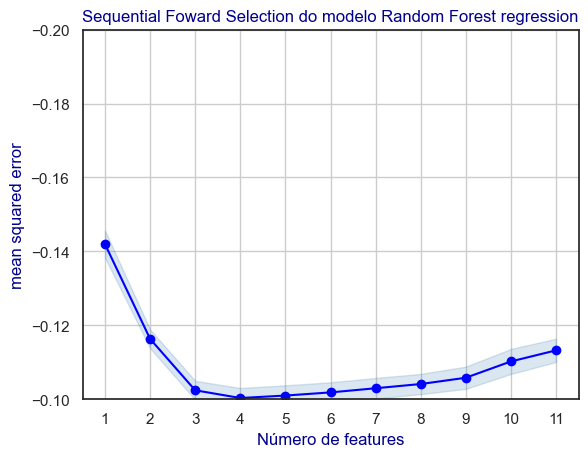

In [ ]:
grafico(2)
plot_sfs(sfs2.get_metric_dict(),kind='std_dev')
plt.ylim([-0.1, -0.2])
plt.title('Sequential Foward Selection do modelo Random Forest regression', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('mean squared error', color="darkblue")
plt.grid()
plt.show()

In [ ]:
x_treino2 = x_treino[:,[2,5,6,8]]
x_teste2 = x_teste[:,[2,5,6,8]]
previsoes_floresta_aparada = RandomForestRegressor(n_estimators = 200, random_state=42)
previsoes_floresta_aparada.fit(x_treino2, y_treino)
previsoes2 = previsoes_floresta_aparada.predict(x_teste2)
mse= mean_squared_error(y_teste, previsoes2)
mse_RF=mse
r2 = r2_score(y_teste, previsoes2)
r2_ajustado2 = 1 - (1 - r2) * (x_teste2.shape[0] - 1) / (x_teste2.shape[0] - x_teste2.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.4702           0.47  0.1002

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - [X] [DM1](#secao5241)
        - ~~[X] [DT](#secao52411)~~
        - ~~[X] [RF](#secao52412)~~
        - [X] [RL](#secao52413)
        - [ ] [KNN](#secao52414)
      - [ ] [DM2](#secao6)
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao5242"></a>

Vamos então aplicar o modelor de Regressão Linear [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
regressao_linear = LinearRegression()
regressao_linear.fit(x_treino, y_treino)
previsoes_regressao_linear=regressao_linear.predict(x_teste)
regressao_linear.coef_

array([ 4.16228420e-03, -1.61212415e-02, -7.27527463e-02, -6.52163668e-02,
        3.27422630e-03,  1.74524814e-05,  4.57089278e-02, -2.04490229e-02,
        7.95474999e-04,  7.46702112e-03, -1.53352214e-02])

In [ ]:
warnings.filterwarnings('ignore')
sfs3=SFS(regressao_linear, k_features=11, forward=True, floating=False, verbose=2, scoring='neg_mean_squared_error', cv=crosval)
sfs3=sfs3.fit(preditores,classe)
pd.DataFrame.from_dict(sfs3.get_metric_dict()).T


[2024-06-19 14:07:29] Features: 1/11 -- score: -0.16402868820039204
[2024-06-19 14:07:32] Features: 2/11 -- score: -0.1481387343275337
[2024-06-19 14:07:37] Features: 3/11 -- score: -0.14091011253122226
[2024-06-19 14:07:41] Features: 4/11 -- score: -0.138016628201468
[2024-06-19 14:07:44] Features: 5/11 -- score: -0.13598305448278133
[2024-06-19 14:07:48] Features: 6/11 -- score: -0.13521023098174642
[2024-06-19 14:07:51] Features: 7/11 -- score: -0.1347467441771363
[2024-06-19 14:07:53] Features: 8/11 -- score: -0.13445273213817335
[2024-06-19 14:07:56] Features: 9/11 -- score: -0.1344231658291374
[2024-06-19 14:07:57] Features: 10/11 -- score: -0.134413533345275
[2024-06-19 14:07:58] Features: 11/11 -- score: -0.13440973721946745

feature_idx  \
1                                 (2,)   
2                               (2, 6)   
3                            (2, 5, 6)   
4                         (0, 2, 5, 6)   
5                      (0, 2, 4, 5, 6)   
6                   (0, 2, 3, 4, 5, 6)   
7                (0, 1, 2, 3, 4, 5, 6)   
8             (0, 1, 2, 3, 4, 5, 6, 7)   
9          (0, 1, 2, 3, 4, 5, 6, 7, 9)   
10     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [-0.16292748722057698, -0.15983435039223967, -... -0.164029   
2   [-0.14845443950439943, -0.1434868105482718, -0... -0.148139   
3   [-0.14072460322291072, -0.13650630697207722, -...  -0.14091   
4   [-0.13737431904857225, -0.13418896773617, -0.1... -0.138017   
5   [-0.13507916935328776, -0.1317131786385465, -0... -0.135983   
6   [-0.13426916076633644, -0.13086168740519696, -...  -0.13521   
7   [-0.13406105916279928, -0.13040815393087668, -... -0.134747   
8   [-0.1339316716876482, -0.1302079910329103, -0.... -0.134453   
9   [-0.13388422871853536, -0.13013806462910707, -... -0.134423   
10  [-0.13385500140551093, -0.130155798671591, -0.... -0.134414   
11  [-0.13385787592134196, -0.13014724546950546, -...  -0.13441   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (2,)  0.001075  0.002833  0.000526  
2                               (2, 6)  0.001106  0.002917  0.000542  
3                            (2, 5, 6)  0.001097  0.002894  0.000537  
4                         (0, 2, 5, 6)  0.001071  0.002824  0.000524  
5                      (0, 2, 4, 5, 6)  0.001071  0.002823  0.000524  
6                   (0, 2, 3, 4, 5, 6)  0.001071  0.002825  0.000525  
7                (0, 1, 2, 3, 4, 5, 6)  0.001048  0.002763  0.000513  
8             (0, 1, 2, 3, 4, 5, 6, 7)  0.001058   0.00279  0.000518  
9          (0, 1, 2, 3, 4, 5, 6, 7, 9)   0.00106  0.002794  0.000519  
10     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10)  0.001063  0.002804  0.000521  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.001064  0.002806  0.000521

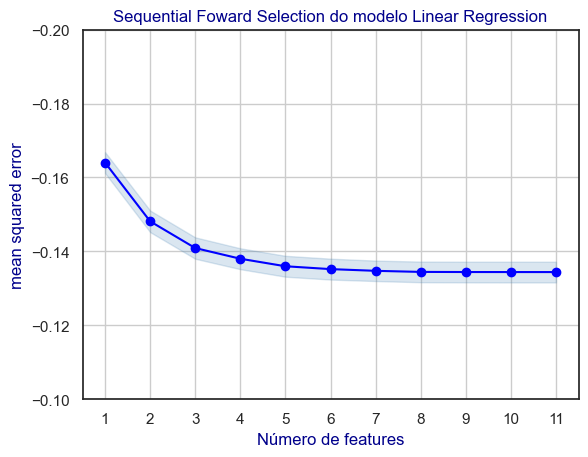

In [ ]:
grafico(2)
plot_sfs(sfs3.get_metric_dict(),kind='std_dev')
plt.ylim([-0.1, -0.2])
plt.title('Sequential Foward Selection do modelo Linear Regression', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('mean squared error', color="darkblue")
plt.grid()
plt.show()

Então a equação da reta linear definida por : 

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Vamos aplicar o mesmo ao nosso problema


In [ ]:
print("A equação da Regressão é:")
print("Income^= ß0 + ß1 x Age + ß2 x marital-status + ß3 x relationship + ß4 x gender + ß5 x hours-per-week + ß6 x capital + ß7 x education-num + ß8 x Workclass + ß9 x occupation + ß10 x race + ß11 x country_category")
ß1,ß2,ß3,ß4,ß5,ß6,ß7,ß8,ß9,ß10,ß11=regressao_linear.coef_
ß0=regressao_linear.intercept_
print("Substituindo pelos valores da regressão temos:")
print("Income^=", round(ß0,4),"+", round(ß1,4)," x Age + ", round(ß2,4), " x marital-status +", round(ß3,4)," x relationship + ", round(ß4,4)," x gender + ", round(ß5,4)," x hours-per-week + ", round(ß6,4)," x capital + ", round(ß7,4)," x education-num + ", round(ß8,4)," x Workclass + ", round(ß9,4)," x occupation + ", round(ß10,4), " x race + ", round(ß11,4)," x country_category")

A equação da Regressão é:
Income^= ß0 + ß1 x Age + ß2 x marital-status + ß3 x relationship + ß4 x gender + ß5 x hours-per-week + ß6 x capital + ß7 x education-num + ß8 x Workclass + ß9 x occupation + ß10 x race + ß11 x country_category
Substituindo pelos valores da regressão temos:
Income^= -0.3518 + 0.0042  x Age +  -0.0161  x marital-status + -0.0728  x relationship +  -0.0652  x gender +  0.0033  x hours-per-week +  0.0  x capital +  0.0457  x education-num +  -0.0204  x Workclass +  0.0008  x occupation +  0.0075  x race +  -0.0153  x country_category


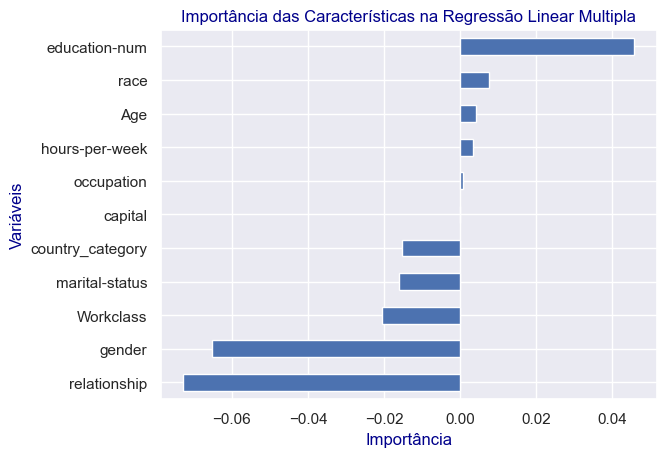

In [ ]:
nomes_caracteristicas = ['Age', 'marital-status', 'relationship', 'gender', 'hours-per-week', 'capital', 'education-num', 'Workclass', 'occupation', 'race', 'country_category']
importancias= pd.DataFrame({
    'Característica': nomes_caracteristicas,
    'Importância': regressao_linear.coef_
})
grafico(4)
importancias= importancias.sort_values(by='Importância', ascending=False)
importancias.plot(kind='barh', x='Característica', y='Importância', legend=False)
plt.title('Importância das Características na Regressão Linear Multipla', color='darkblue')
plt.xlabel('Importância', color='darkblue')
plt.ylabel('Variáveis', color='darkblue')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
r2 = r2_score(y_teste, previsoes_regressao_linear)
r2_ajustado = 1 - (1 - r2) * (x_teste.shape[0] - 1) / (x_teste.shape[0] - x_teste.shape[1] - 1)
mse= mean_squared_error(y_teste, previsoes_regressao_linear)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado,4)],
    'mse:':[round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.2987         0.2981  0.1327

Vamos então aplicar a selecção de features que no nossa caso correponde ao processo de eliminar as variáveis que tem o p-value>alfa que no nosso caso alfa é 0.05.

In [ ]:
X=preditores
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10]]
X_opt= X_opt.astype(np.float64)
regressao_linear_parc = sm.OLS(classe, X_opt).fit()
regressao_linear_parc.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                 108.012
Model:                            OLS   Adj. R-squared (uncentered):            108.039
Method:                 Least Squares   F-statistic:                             -4039.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                        1.00
Time:                        14:07:59   Log-Likelihood:                         -18570.
No. Observations:               44034   AIC:                                  3.716e+04
Df Residuals:                   44023   BIC:                                  3.726e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0028      0.000     21.245      0.000       0.003       0.003
x2            -0.0248      0.001    -21.134      0.000      -0.027      -0.022
x3            -0.0804      0.001    -56.051      0.000      -0.083      -0.078
x4            -0.0771      0.004    -18.215      0.000      -0.085      -0.069
x5             0.0018      0.000     12.719      0.000       0.002       0.002
x6          1.835e-05   3.97e-07     46.227      0.000    1.76e-05    1.91e-05
x7             0.0392      0.001     59.200      0.000       0.038       0.041
x8            -0.0268      0.002    -14.895      0.000      -0.030      -0.023
x9            -0.0006      0.000     -1.418      0.156      -0.001       0.000
x10           -0.0152      0.002     -7.818      0.000      -0.019      -0.011
x11           -0.0443      0.006     -7.045      0.000      -0.057      -0.032
==============================================================================
Omnibus:                     4762.759   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4294.922
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       2.345   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como o p-value da variável 9, era maior do que alfa então, vamos então tirar a variável 9 que corrsponde ao array 8.

In [ ]:
X_opt=X[:,[0,1,2,3,4,5,6,7,9,10]]
regressao_linear_parc = sm.OLS(classe, X_opt).fit()
regressao_linear_parc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                 108.017
Model:                            OLS   Adj. R-squared (uncentered):            108.041
Method:                 Least Squares   F-statistic:                             -4444.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                        1.00
Time:                        14:07:59   Log-Likelihood:                         -18571.
No. Observations:               44034   AIC:                                  3.716e+04
Df Residuals:                   44024   BIC:                                  3.725e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0028      0.000     21.197      0.000       0.002       0.003
x2            -0.0249      0.001    -21.286      0.000      -0.027      -0.023
x3            -0.0804      0.001    -56.081      0.000      -0.083      -0.078
x4            -0.0768      0.004    -18.171      0.000      -0.085      -0.069
x5             0.0018      0.000     12.655      0.000       0.002       0.002
x6          1.835e-05   3.97e-07     46.239      0.000    1.76e-05    1.91e-05
x7             0.0391      0.001     59.711      0.000       0.038       0.040
x8            -0.0269      0.002    -14.957      0.000      -0.030      -0.023
x9            -0.0154      0.002     -7.901      0.000      -0.019      -0.012
x10           -0.0445      0.006     -7.077      0.000      -0.057      -0.032
==============================================================================
Omnibus:                     4762.844   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4295.110
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       2.345   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_treino2 = x_treino[:, [0,1,2,3,4,5,6,7,9,10]]
x_teste2 = x_teste[:, [0,1,2,3,4,5,6,7,9,10]]
regressao_linear_parc = LinearRegression()
regressao_linear_parc.fit(x_treino2, y_treino)
previsoes_regressao_linear_parc = regressao_linear_parc.predict(x_teste2)
mse= mean_squared_error(y_teste, previsoes_regressao_linear_parc)
mse_log=mse
r2 = r2_score(y_teste, previsoes_regressao_linear_parc)
r2_ajustado2 = 1 - (1 - r2) * (x_teste2.shape[0] - 1) / (x_teste2.shape[0] - x_teste2.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.2987         0.2982  0.1327

Então o nosso novo modelo de regressão linear mais simplificado é:

In [ ]:
print("A equação da Regressão é:")
print("Income^= ß0 + ß1 x Age + ß2 x marital-status + ß3 x relationship + ß4 x gender + ß5 x hours-per-week + ß6 x capital + ß7 x education-num + ß8 x Workclass + ß9 x race + ß10 x country_category")
ß1,ß2,ß3,ß4,ß5,ß6,ß7,ß8,ß9,ß10=regressao_linear_parc.coef_
ß0=regressao_linear_parc.intercept_
print("Substituindo pelos valores da regressão temos:")
print("Income^=", round(ß0,4),"+", round(ß1,4)," x Age + ", round(ß2,4), " x marital-status +", round(ß3,4)," x relationship + ", round(ß4,4)," x gender + ", round(ß5,4)," x hours-per-week + ", round(ß6,4)," x capital + ", round(ß7,4)," x education-num + ", round(ß8,4)," x Workclass + ", round(ß9,4), " x race + ", round(ß10,4)," x country_category")

A equação da Regressão é:
Income^= ß0 + ß1 x Age + ß2 x marital-status + ß3 x relationship + ß4 x gender + ß5 x hours-per-week + ß6 x capital + ß7 x education-num + ß8 x Workclass + ß9 x race + ß10 x country_category
Substituindo pelos valores da regressão temos:
Income^= -0.3482 + 0.0042  x Age +  -0.0161  x marital-status + -0.0728  x relationship +  -0.0657  x gender +  0.0033  x hours-per-week +  0.0  x capital +  0.0458  x education-num +  -0.0204  x Workclass +  0.0074  x race +  -0.0153  x country_category


- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - [X] [DM1](#secao5241)
        - ~~[X] [DT](#secao52411)~~
        - ~~[X] [RF](#secao52412)~~
        - ~~[X] [RL](#secao52413)~~
        - **[ ] [KNN](#secao52414)**
      - [ ] [DM2](#secao6)
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao5242"></a>

Por fim e para responder ao nosso problema de DM1 utilizamos o KNN regressor [`KNeighborsRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), já tinhamos confirmado que o numero de features ideal para o KNN era 11 contudo e para verificarmos qual as métricas associadas ao mesmo fizemos um ciclo for para nos apresentar o resultado do nosso MSE e do R2 ao longo dos testes com features

In [ ]:
for k in range(1, 12):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_treino, y_treino)
    previsoes=knn.predict(x_teste)
    mse= mean_squared_error(y_teste, previsoes)
    r2 = r2_score(y_teste, previsoes)
    r2_ajustado2 = 1 - (1 - r2) * (x_teste.shape[0] - 1) / (x_teste.shape[0] - x_teste.shape[1] - 1)
    pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]})
    pontuacao_treino = knn.score(x_treino, y_treino)
    pontuacao_teste = knn.score(x_teste, y_teste)
    print(f'Pontuação para k={k}: Treino={pontuacao_treino}, Teste={pontuacao_teste} R^2',[round(r2,4)],'R^2 ajustado:', [round(r2_ajustado2,4)],'mse:', [round(mse,4)])



Pontuação para k=1: Treino=0.8326407156373584, Teste=0.00421379227556129 R^2 [0.0042] R^2 ajustado: [0.0034] mse: [0.1884]
Pontuação para k=2: Treino=0.7098963425397578, Teste=0.2382575574498469 R^2 [0.2383] R^2 ajustado: [0.2376] mse: [0.1441]
Pontuação para k=3: Treino=0.6482608782051829, Teste=0.3255183192802593 R^2 [0.3255] R^2 ajustado: [0.325] mse: [0.1276]
Pontuação para k=4: Treino=0.6116368035191915, Teste=0.36915703508738795 R^2 [0.3692] R^2 ajustado: [0.3686] mse: [0.1194]
Pontuação para k=5: Treino=0.587264680796932, Teste=0.3863652529498818 R^2 [0.3864] R^2 ajustado: [0.3859] mse: [0.1161]
Pontuação para k=6: Treino=0.5709331090896664, Teste=0.3979318602999956 R^2 [0.3979] R^2 ajustado: [0.3974] mse: [0.1139]
Pontuação para k=7: Treino=0.5563096956610826, Teste=0.40939159959368165 R^2 [0.4094] R^2 ajustado: [0.4089] mse: [0.1117]
Pontuação para k=8: Treino=0.547059921490169, Teste=0.41694097047713785 R^2 [0.4169] R^2 ajustado: [0.4165] mse: [0.1103]
Pontuação para k=9: Tre

Então o nosso modelo de KNN regressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(x_treino, y_treino)
previsoes=knn.predict(x_teste)
mse= mean_squared_error(y_teste, previsoes)
mse_KNN=mse
r2 = r2_score(y_teste, previsoes)
r2_ajustado2 = 1 - (1 - r2) * (x_teste.shape[0] - 1) / (x_teste.shape[0] - x_teste.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.4312         0.4307  0.1076

In [ ]:
sfs4=SFS(knn, k_features=11, forward=True, floating=False, verbose=2, scoring='neg_mean_squared_error', cv=5)
sfs4=sfs4.fit(preditores,classe)
pd.DataFrame.from_dict(sfs4.get_metric_dict()).T


[2024-06-19 14:11:34] Features: 1/11 -- score: -0.14622869190340734
[2024-06-19 14:13:12] Features: 2/11 -- score: -0.11932435895848567
[2024-06-19 14:14:00] Features: 3/11 -- score: -0.10868274680476811
[2024-06-19 14:14:29] Features: 4/11 -- score: -0.10693993285174704
[2024-06-19 14:14:51] Features: 5/11 -- score: -0.10474649424202798
[2024-06-19 14:15:16] Features: 6/11 -- score: -0.10383827694158745
[2024-06-19 14:15:40] Features: 7/11 -- score: -0.10320330359852883
[2024-06-19 14:16:01] Features: 8/11 -- score: -0.10308319855878342
[2024-06-19 14:16:20] Features: 9/11 -- score: -0.10322845999231275
[2024-06-19 14:16:32] Features: 10/11 -- score: -0.10364342543327539
[2024-06-19 14:16:39] Features: 11/11 -- score: -0.10721038114039183

feature_idx  \
1                                 (5,)   
2                               (2, 5)   
3                            (2, 5, 6)   
4                         (0, 2, 5, 6)   
5                      (0, 2, 5, 6, 8)   
6                   (0, 1, 2, 5, 6, 8)   
7                (0, 1, 2, 5, 6, 7, 8)   
8             (0, 1, 2, 3, 5, 6, 7, 8)   
9         (0, 1, 2, 3, 5, 6, 7, 8, 10)   
10     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [-0.14132728755394605, -0.1465156848374743, -0... -0.146229   
2   [-0.12399603245727712, -0.11819955388604293, -... -0.119324   
3   [-0.10885311927871048, -0.10880995301445974, -... -0.108683   
4   [-0.10678583057991997, -0.1060154066027493, -0...  -0.10694   
5   [-0.10285113175376084, -0.10493061961418744, -... -0.104746   
6   [-0.10183015576452616, -0.10486211662961563, -... -0.103838   
7   [-0.10261090210923504, -0.10360278778995295, -... -0.103203   
8   [-0.10294497145865374, -0.10323962813201744, -... -0.103083   
9   [-0.10316924835334777, -0.1031410964418799, -0... -0.103228   
10  [-0.10316361797105418, -0.10329311676380638, -... -0.103643   
11  [-0.10621716196826904, -0.1091327615992913, -0...  -0.10721   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (5,)  0.003972  0.003091  0.001545  
2                               (2, 5)  0.003358  0.002613  0.001306  
3                            (2, 5, 6)  0.001528  0.001189  0.000594  
4                         (0, 2, 5, 6)  0.000989  0.000769  0.000385  
5                      (0, 2, 5, 6, 8)   0.00167  0.001299   0.00065  
6                   (0, 1, 2, 5, 6, 8)  0.001619  0.001259   0.00063  
7                (0, 1, 2, 5, 6, 7, 8)  0.000623  0.000485  0.000242  
8             (0, 1, 2, 3, 5, 6, 7, 8)  0.000278  0.000217  0.000108  
9         (0, 1, 2, 3, 5, 6, 7, 8, 10)   0.00028  0.000218  0.000109  
10     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10)  0.000866  0.000674  0.000337  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002131  0.001658  0.000829

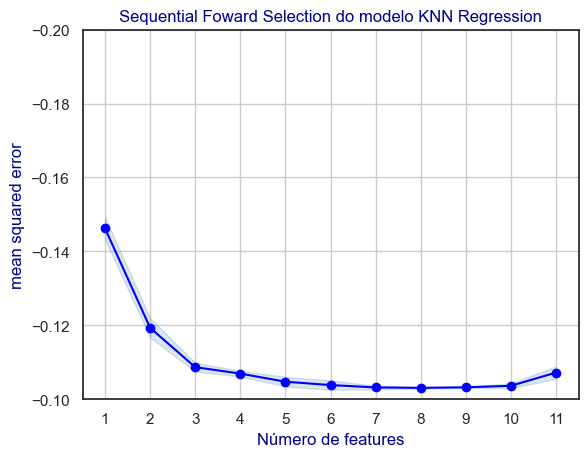

In [ ]:
grafico(2)
plot_sfs(sfs4.get_metric_dict(),kind='std_dev')
plt.ylim([-0.1, -0.2])
plt.title('Sequential Foward Selection do modelo KNN Regression', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('mean squared error', color="darkblue")
plt.grid()
plt.show()

Através da análise dos dados anteriores chegamos a conclusão que o nosso modelo de KNN regressor apresentava umas métricas melhores quando utilizamos as variáveis , 2,0,5 e 6. Então voltamos a treinar o modelo tendo em conta essas variáveis

In [ ]:
x_treino2 = x_treino[:, [0, 2, 5, 6]]
x_teste2 = x_teste[:, [0, 2, 5, 6]]
knn_aparado = KNeighborsRegressor(n_neighbors=11)
knn_aparado.fit(x_treino2, y_treino)
knn_previsoes=knn_aparado.predict(x_teste2)
mse= mean_squared_error(y_teste, knn_previsoes)
mse_KNN=mse
r2 = r2_score(y_teste, knn_previsoes)
r2_ajustado2 = 1 - (1 - r2) * (x_teste.shape[0] - 1) / (x_teste.shape[0] - x_teste.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:   mse:
0  0.4397         0.4393  0.106

      Característica  Importância
5            capital     0.394880
0                Age     0.113814
6      education-num     0.103738
1     marital-status     0.065317
2       relationship     0.047681
4     hours-per-week     0.040778
8         occupation     0.022669
7          Workclass     0.003708
3             gender     0.001275
10  country_category     0.000176
9               race    -0.000367


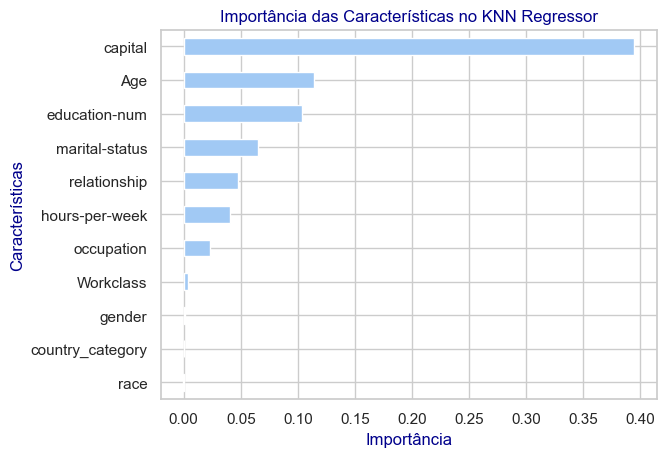

In [ ]:
result = permutation_importance(knn, x_teste, y_teste, n_repeats=10, random_state=42)
importancias= pd.DataFrame({
    'Característica': nomes_caracteristicas,
    'Importância': result.importances_mean
})
importancias= importancias.sort_values(by='Importância', ascending=False)
print(importancias)
grafico(3)
importancias.plot(kind='barh', x='Característica', y='Importância', legend=False)
plt.title('Importância das Características no KNN Regressor', color='darkblue')
plt.xlabel('Importância', color='darkblue')
plt.ylabel('Características', color='darkblue')
plt.gca().invert_yaxis()
plt.show()

Vamos então fazer o boxplot comparativo dos modelos utilizados

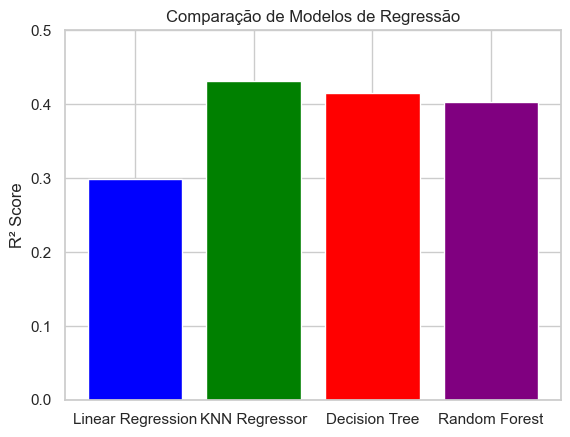

Scores R²:
Linear Regression: 0.2987
KNN Regressor: 0.4312
Decision Tree: 0.4154
Random Forest: 0.4029


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=11),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

scores = {}
for name, model in models.items():
    model.fit(x_treino, y_treino)
    y_pred = model.predict(x_teste)
    score = r2_score(y_teste, y_pred)
    scores[name] = score

plt.bar(scores.keys(), scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 0.5)
plt.ylabel('R² Score')
plt.title('Comparação de Modelos de Regressão')
plt.show()

print("Scores R²:")
for name, score in scores.items():
    print(f"{name}: {score:.4f}")


**Problema de DM2**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - [X] [DM2](#secao6)
        - [X] [DT](#secao61)
        - [ ] [SVM](#secao62)
        - [ ] [RLog](#secao63)
        - [ ] [NB](#secao64)
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao6"></a>

De forma homolga com o anterior vamos começar com a nossa arvore de decisão sem estar aparada e comparar a mesma com o modelo aparado.

In [ ]:
arvore = DecisionTreeClassifier(max_depth=5, criterion='entropy')
arvore.fit(x_treino, y_treino)
previsoes = arvore.predict(x_teste)


Text(0, 0.5, 'Real')

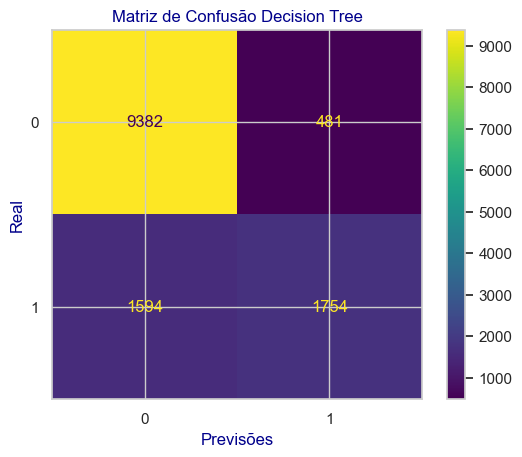

In [ ]:
confusao = metrics.confusion_matrix(y_teste, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão Decision Tree', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

Pra este problema de DM precisavamos da accuracy como métrica comparativa entre os modelos, contudo e de forma a percebermos melhor o modelo como um todo acabamos por apresentar todas as metricas defenidas no trabalho escrito.

$precision\% = \frac{VP}{VP + FP} \times 100$

$recall\% = \frac{VP}{VP + FN} \times 100$

$F1\ Score = \frac{2 \times (\text{precision} \times \text{recall})}{\text{precision} + \text{recall}}$


In [ ]:
Accuracy = metrics.accuracy_score(y_teste, previsoes)
Precision = metrics.precision_score(y_teste, previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, previsoes)
F1_score = metrics.f1_score(y_teste, previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8429      0.7848   0.5239     0.6283

In [ ]:
warnings.filterwarnings('ignore')
sfs5=SFS(arvore, k_features=11, forward=True, floating=False, verbose=2, scoring='accuracy', cv=crosval)
sfs5=sfs5.fit(preditores,classe)
pd.DataFrame.from_dict(sfs5.get_metric_dict()).T


[2024-06-19 14:20:10] Features: 1/11 -- score: 0.8130763202008594
[2024-06-19 14:20:15] Features: 2/11 -- score: 0.8135456352558453
[2024-06-19 14:20:21] Features: 3/11 -- score: 0.8437420413338029
[2024-06-19 14:20:28] Features: 4/11 -- score: 0.8442038786204518
[2024-06-19 14:20:36] Features: 5/11 -- score: 0.8441963080246458
[2024-06-19 14:20:43] Features: 6/11 -- score: 0.8442038786204518
[2024-06-19 14:20:50] Features: 7/11 -- score: 0.8442038786204518
[2024-06-19 14:20:56] Features: 8/11 -- score: 0.8441963080246458
[2024-06-19 14:21:02] Features: 9/11 -- score: 0.8442038786204518
[2024-06-19 14:21:05] Features: 10/11 -- score: 0.8441735962372283
[2024-06-19 14:21:08] Features: 11/11 -- score: 0.8433181378204622

feature_idx  \
1                                 (5,)   
2                               (5, 6)   
3                            (2, 5, 6)   
4                         (2, 4, 5, 6)   
5                     (2, 4, 5, 6, 10)   
6                  (2, 4, 5, 6, 8, 10)   
7               (2, 3, 4, 5, 6, 8, 10)   
8            (1, 2, 3, 4, 5, 6, 8, 10)   
9         (1, 2, 3, 4, 5, 6, 8, 9, 10)   
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.8133514986376021, 0.8217529518619436, 0.808...  0.813076   
2   [0.8181198910081744, 0.821071752951862, 0.8081...  0.813546   
3   [0.840599455040872, 0.8496821071752951, 0.8437...  0.843742   
4   [0.8401453224341507, 0.8490009082652135, 0.842...  0.844204   
5   [0.8401453224341507, 0.8490009082652135, 0.842...  0.844196   
6   [0.8401453224341507, 0.8490009082652135, 0.842...  0.844204   
7   [0.8401453224341507, 0.8490009082652135, 0.842...  0.844204   
8   [0.8401453224341507, 0.8490009082652135, 0.842...  0.844196   
9   [0.8401453224341507, 0.8490009082652135, 0.842...  0.844204   
10  [0.8401453224341507, 0.8490009082652135, 0.842...  0.844174   
11  [0.8399182561307902, 0.8480926430517711, 0.841...  0.843318   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (5,)  0.002636  0.006951  0.001291  
2                               (5, 6)  0.002768  0.007299  0.001355  
3                            (2, 5, 6)  0.002386  0.006291  0.001168  
4                         (2, 4, 5, 6)  0.002527  0.006663  0.001237  
5                     (2, 4, 5, 6, 10)  0.002525  0.006658  0.001236  
6                  (2, 4, 5, 6, 8, 10)  0.002527  0.006663  0.001237  
7               (2, 3, 4, 5, 6, 8, 10)  0.002527  0.006663  0.001237  
8            (1, 2, 3, 4, 5, 6, 8, 10)  0.002525  0.006658  0.001236  
9         (1, 2, 3, 4, 5, 6, 8, 9, 10)  0.002527  0.006663  0.001237  
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002521  0.006647  0.001234  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002408   0.00635  0.001179

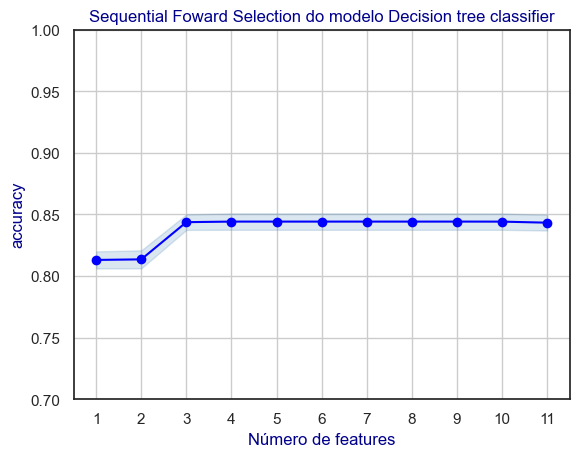

In [ ]:
grafico(2)
plot_sfs(sfs5.get_metric_dict(),kind='std_dev')
plt.ylim([0.7, 1])
plt.title('Sequential Foward Selection do modelo Decision tree classifier', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('accuracy', color="darkblue")
plt.grid()
plt.show()

Tendo em conta o anterior as features que o modelo apresenta como otimizando o mesmo são as 2,5,6

In [ ]:
x_treino2 = x_treino[:, [2, 5, 6]]
x_teste2 = x_teste[:, [2, 5, 6]]
arvore_aparada = DecisionTreeClassifier(max_depth=5, criterion='entropy')
arvore_aparada.fit(x_treino2, y_treino)
arvore_previsoes=arvore_aparada.predict(x_teste2)
Accuracy = metrics.accuracy_score(y_teste, arvore_previsoes)
Precision = metrics.precision_score(y_teste, arvore_previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, arvore_previsoes)
F1_score = metrics.f1_score(y_teste, arvore_previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8446      0.7761   0.5436     0.6394

Fizemos a matrix de confusão para visualmente conseguirmos identificar os casos necessários [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) com o elemento visual que nos é dado por [`ConfusionMatrixDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

Text(0, 0.5, 'Real')

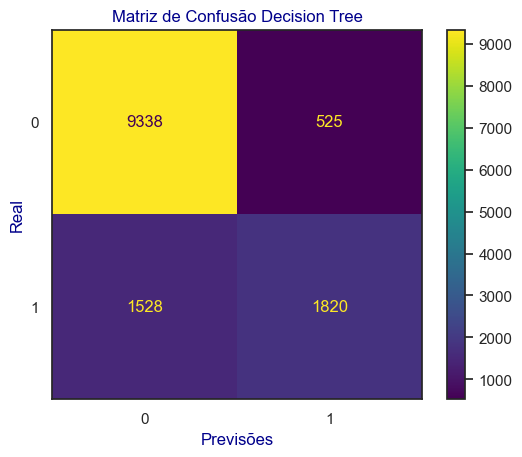

In [ ]:
confusao = metrics.confusion_matrix(y_teste, arvore_previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão Decision Tree', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

Vamos fazer só um teste para verificar que o classificador funciona corretamente (vamos deixar comentado por questões de prática)

In [ ]:
sc = StandardScaler()
x_treino2_prev = sc.fit_transform(x_treino2)
x_teste2_prev = sc.transform(x_teste2)
#a=input("0-Married\n 1- Noit-in-family\n 2- Own-child\n 3- Unmarried\n 4- Other-relative\n")
#b=input("capital")
#c=input("education-num:0-Nenhum\n 1-Preschool\n 2-1st-4th\n 3-5th-6th\n 4-7th-8th\n 5-9th\n 6-10th\n 7-11th\n 8-12th\n 9-HS-grad\n 10-S")
#data=[[a,b,c]]
#print(arvore_aparada.predict(sc.transform(data)))

**Problema de DM2**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - [X] [DM2](#secao6)
        - ~~[X] [DT](#secao61)~~
        - [x] [SVM](#secao62)
        - [ ] [RLog](#secao63)
        - [ ] [NB](#secao64)
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao62"></a>

Normalizamos a nossa variável preditora [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
sc=StandardScaler()
x_treino2=sc.fit_transform(x_treino)
x_teste2=sc.transform(x_teste)
svcmodel=SVC(C=1, kernel= 'rbf')
svcmodel.fit(x_treino2, y_treino)
previsoes = svcmodel.predict(x_teste2)

Text(0, 0.5, 'Real')

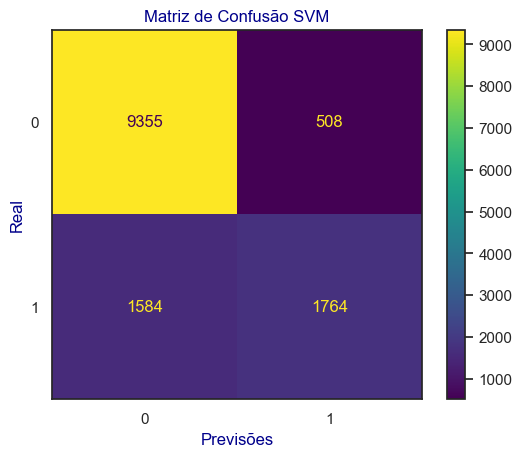

In [ ]:
confusao = metrics.confusion_matrix(y_teste, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão SVM', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

In [ ]:
Accuracy = metrics.accuracy_score(y_teste, previsoes)
Precision = metrics.precision_score(y_teste, previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, previsoes)
F1_score = metrics.f1_score(y_teste, previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8416      0.7764   0.5269     0.6278

Da mesma forma que na parte da seleção de parametros comentamos o código que deu origem a seleção de parametros por este ser demasiado complexo e demorar demasiado tempo de forma homolga fizemos o mesmo para o comando seguinte.

In [ ]:
#warnings.filterwarnings('ignore')
#sfs10=SFS(svcmodel, k_features=11, forward=True, floating=False, verbose=2, scoring='accuracy', cv=crosval)
#sfs10=sfs10.fit(preditores,classe)
#pd.DataFrame.from_dict(sfs10.get_metric_dict()).T

**Problema de DM2**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - [X] [DM2](#secao6)
        - ~~[X] [DT](#secao61)~~
        - ~~[x] [SVM](#secao62)~~
        - **[X] [RLog](#secao63)**
        - [ ] [NB](#secao64)
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao63"></a>

Para a aregressão logisitica utilizamos o comando [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
sc=StandardScaler()
x_treino2=sc.fit_transform(x_treino)
x_teste2=sc.transform(x_teste)
LogReg=LogisticRegression(random_state=seed, C=1)
LogReg.fit(x_treino2, y_treino)
previsoes = LogReg.predict(x_teste2)

In [ ]:
LogReg.coef_

array([[ 3.59284670e-01, -2.57150071e-01, -1.39371273e+00,
        -1.53541810e-01,  3.08446575e-01,  1.07978186e+00,
         8.76515337e-01, -1.51570719e-01, -7.17338660e-04,
         3.95149132e-02,  3.35133762e-02]])

Text(0, 0.5, 'Real')

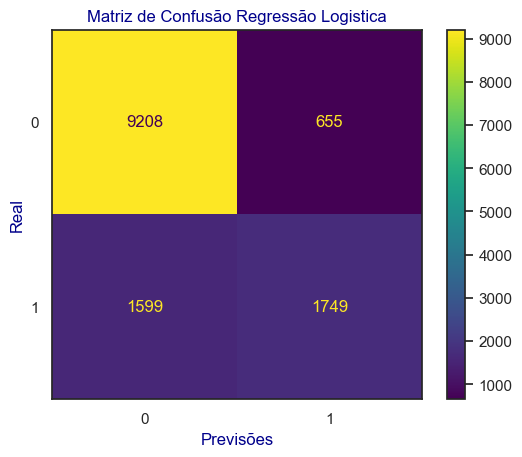

In [ ]:
confusao = metrics.confusion_matrix(y_teste, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão Regressão Logistica', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

In [ ]:
Accuracy = metrics.accuracy_score(y_teste, previsoes)
Precision = metrics.precision_score(y_teste, previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, previsoes)
F1_score = metrics.f1_score(y_teste, previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8294      0.7275   0.5224     0.6081

In [ ]:
warnings.filterwarnings('ignore')
sfs7=SFS(LogReg, k_features=11, forward=True, floating=False, verbose=2, scoring='accuracy', cv=crosval)
sfs7=sfs7.fit(preditores,classe)
pd.DataFrame.from_dict(sfs7.get_metric_dict()).T


[2024-06-19 14:22:30] Features: 1/11 -- score: 0.78758843449499
[2024-06-19 14:23:13] Features: 2/11 -- score: 0.7919259509778824
[2024-06-19 14:24:10] Features: 3/11 -- score: 0.8232956893880118
[2024-06-19 14:25:25] Features: 4/11 -- score: 0.8260132960565723
[2024-06-19 14:26:43] Features: 5/11 -- score: 0.8220238877395473
[2024-06-19 14:27:52] Features: 6/11 -- score: 0.8163614379153726
[2024-06-19 14:28:52] Features: 7/11 -- score: 0.8160587000344974
[2024-06-19 14:29:39] Features: 8/11 -- score: 0.8102300082465173
[2024-06-19 14:30:16] Features: 9/11 -- score: 0.8104571725344284
[2024-06-19 14:30:41] Features: 10/11 -- score: 0.8101769521908968
[2024-06-19 14:30:53] Features: 11/11 -- score: 0.8068160477240459

feature_idx  \
1                                 (5,)   
2                               (5, 6)   
3                            (2, 5, 6)   
4                         (2, 4, 5, 6)   
5                      (2, 4, 5, 6, 8)   
6                   (2, 3, 4, 5, 6, 8)   
7                (2, 3, 4, 5, 6, 7, 8)   
8             (1, 2, 3, 4, 5, 6, 7, 8)   
9         (1, 2, 3, 4, 5, 6, 7, 8, 10)   
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.7895095367847411, 0.7970027247956403, 0.785...  0.787588   
2   [0.7970027247956403, 0.8013169845594914, 0.789...  0.791926   
3   [0.8231153496821072, 0.8267484105358764, 0.823...  0.823296   
4   [0.8235694822888283, 0.8335603996366939, 0.824...  0.826013   
5   [0.8235694822888283, 0.8335603996366939, 0.823...  0.822024   
6   [0.8219800181653043, 0.825386012715713, 0.8249...  0.816361   
7   [0.8208446866485014, 0.8260672116257948, 0.821...  0.816059   
8   [0.8122161671207992, 0.80858310626703, 0.81062...   0.81023   
9   [0.8076748410535877, 0.814486830154405, 0.8044...  0.810457   
10  [0.80858310626703, 0.8190281562216167, 0.81153...  0.810177   
11  [0.8001816530426885, 0.8194822888283378, 0.808...  0.806816   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (5,)  0.002629  0.006933  0.001287  
2                               (5, 6)  0.002723   0.00718  0.001333  
3                            (2, 5, 6)   0.00231  0.006092  0.001131  
4                         (2, 4, 5, 6)  0.002485  0.006553  0.001217  
5                      (2, 4, 5, 6, 8)  0.004313  0.011373  0.002112  
6                   (2, 3, 4, 5, 6, 8)  0.003391  0.008942   0.00166  
7                (2, 3, 4, 5, 6, 7, 8)  0.003304  0.008712  0.001618  
8             (1, 2, 3, 4, 5, 6, 7, 8)  0.002782  0.007336  0.001362  
9         (1, 2, 3, 4, 5, 6, 7, 8, 10)  0.002368  0.006243  0.001159  
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002761  0.007281  0.001352  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)    0.0025  0.006592  0.001224

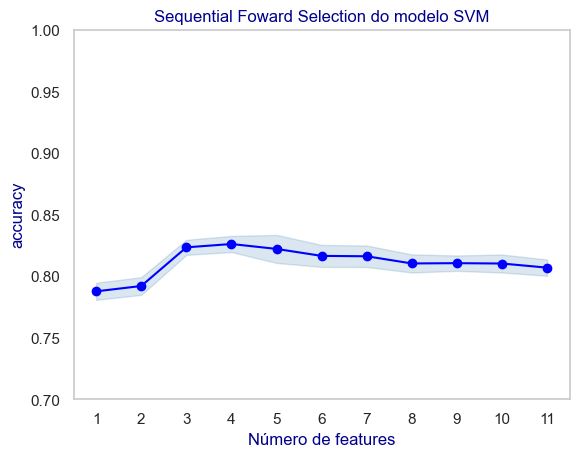

In [ ]:
grafico(3)
plot_sfs(sfs7.get_metric_dict(),kind='std_dev')
plt.ylim([0.7, 1])
plt.title('Sequential Foward Selection do modelo SVM', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('accuracy', color="darkblue")
plt.grid()
plt.show()

Através da *features selection* identificamos as variáveis preditoras 2,4,5,6 como sendo as que mais otimizavam as métricas do nosso modelo.

In [ ]:
x_treino2 = x_treino[:, [2,4,5,6]]
x_teste2 = x_teste[:, [2,4,5,6]]
Reglog_aparada = LogisticRegression(random_state=seed, C=1)
Reglog_aparada.fit(x_treino2, y_treino)
RegLog_apa_previsoes=Reglog_aparada.predict(x_teste2)
Accuracy = metrics.accuracy_score(y_teste, RegLog_apa_previsoes)
Precision = metrics.precision_score(y_teste, RegLog_apa_previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, RegLog_apa_previsoes)
F1_score = metrics.f1_score(y_teste, RegLog_apa_previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8279      0.7273   0.5131     0.6018

Text(0, 0.5, 'Real')

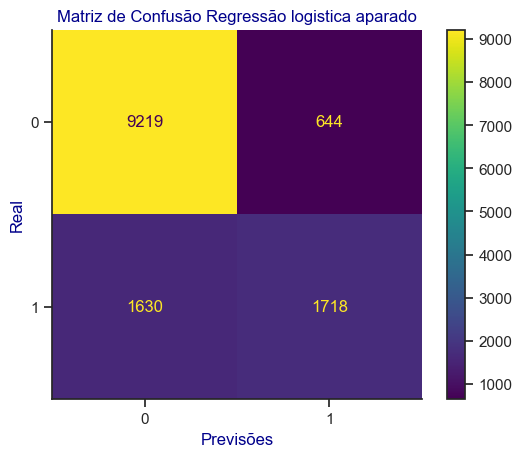

In [ ]:
grafico(1)
confusao = metrics.confusion_matrix(y_teste, RegLog_apa_previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão Regressão logistica aparado', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

**Problema de DM2**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - [X] [DM2](#secao6)
        - ~~[X] [DT](#secao61)~~
        - ~~[x] [SVM](#secao62)~~
        - ~~[X] [RLog](#secao63)~~
        - **[X] [NB](#secao64)**
      - [ ] [DM3](#secao7)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao63"></a>

O comando utilizado foi o [`GaussianNB()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [ ]:
sc=StandardScaler()
x_treino2=sc.fit_transform(x_treino)
x_teste2=sc.transform(x_teste)
naive=GaussianNB()
naive.fit(x_treino2, y_treino)
previsoes = naive.predict(x_teste2)

Text(0, 0.5, 'Real')

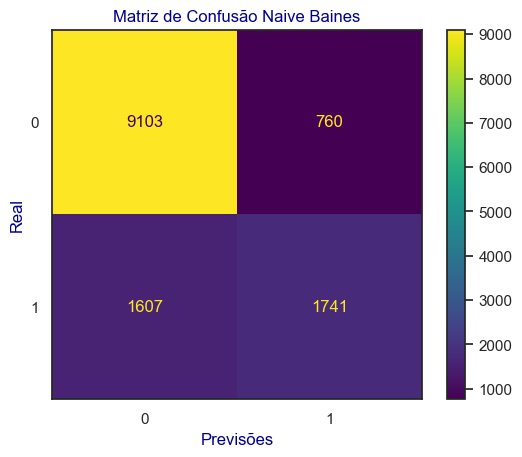

In [ ]:
grafico(2)
confusao = metrics.confusion_matrix(y_teste, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão Naive Baines', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

In [ ]:
Accuracy = metrics.accuracy_score(y_teste, previsoes)
Precision = metrics.precision_score(y_teste, previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, previsoes)
F1_score = metrics.f1_score(y_teste, previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8208      0.6961     0.52     0.5953

In [ ]:
warnings.filterwarnings('ignore')
sfs8=SFS(naive, k_features=11, forward=True, floating=False, verbose=2, scoring='accuracy', cv=crosval)
sfs8=sfs8.fit(preditores,classe)
pd.DataFrame.from_dict(sfs8.get_metric_dict()).T


[2024-06-19 14:30:57] Features: 1/11 -- score: 0.7786181190693132
[2024-06-19 14:31:02] Features: 2/11 -- score: 0.7825771418614823
[2024-06-19 14:31:07] Features: 3/11 -- score: 0.7910781852078533
[2024-06-19 14:31:11] Features: 4/11 -- score: 0.7965738670458978
[2024-06-19 14:31:16] Features: 5/11 -- score: 0.8093897357160702
[2024-06-19 14:31:20] Features: 6/11 -- score: 0.8190717438753983
[2024-06-19 14:31:23] Features: 7/11 -- score: 0.8225690342415779
[2024-06-19 14:31:26] Features: 8/11 -- score: 0.822220786834507
[2024-06-19 14:31:28] Features: 9/11 -- score: 0.821910421629928
[2024-06-19 14:31:30] Features: 10/11 -- score: 0.8206386732713067
[2024-06-19 14:31:31] Features: 11/11 -- score: 0.8178529140502213

feature_idx  \
1                                 (5,)   
2                               (5, 6)   
3                            (1, 5, 6)   
4                         (1, 2, 5, 6)   
5                      (1, 2, 3, 5, 6)   
6                   (0, 1, 2, 3, 5, 6)   
7                (0, 1, 2, 3, 4, 5, 6)   
8             (0, 1, 2, 3, 4, 5, 6, 8)   
9         (0, 1, 2, 3, 4, 5, 6, 8, 10)   
10     (0, 1, 2, 3, 4, 5, 6, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.7772479564032697, 0.7895095367847411, 0.779...  0.778618   
2   [0.7851952770208901, 0.7945049954586739, 0.783...  0.782577   
3   [0.7901907356948229, 0.8013169845594914, 0.791...  0.791078   
4   [0.7983651226158038, 0.8065395095367848, 0.795...  0.796574   
5   [0.8119891008174387, 0.8174386920980926, 0.806...   0.80939   
6   [0.8158492279745686, 0.8260672116257948, 0.816...  0.819072   
7   [0.8201634877384196, 0.8287920072661217, 0.824...  0.822569   
8   [0.821071752951862, 0.825386012715713, 0.82379...  0.822221   
9   [0.8206176203451407, 0.8303814713896458, 0.822...   0.82191   
10  [0.8217529518619436, 0.82811080835604, 0.82243...  0.820639   
11  [0.8176657584014533, 0.8249318801089919, 0.821...  0.817853   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (5,)  0.002405  0.006341  0.001177  
2                               (5, 6)  0.002345  0.006183  0.001148  
3                            (1, 5, 6)  0.002412   0.00636  0.001181  
4                         (1, 2, 5, 6)  0.002284  0.006022  0.001118  
5                      (1, 2, 3, 5, 6)  0.002135  0.005631  0.001046  
6                   (0, 1, 2, 3, 5, 6)  0.002374  0.006259  0.001162  
7                (0, 1, 2, 3, 4, 5, 6)  0.002296  0.006053  0.001124  
8             (0, 1, 2, 3, 4, 5, 6, 8)  0.002263  0.005967  0.001108  
9         (0, 1, 2, 3, 4, 5, 6, 8, 10)    0.0023  0.006065  0.001126  
10     (0, 1, 2, 3, 4, 5, 6, 8, 9, 10)  0.002395  0.006315  0.001173  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002401  0.006331  0.001176

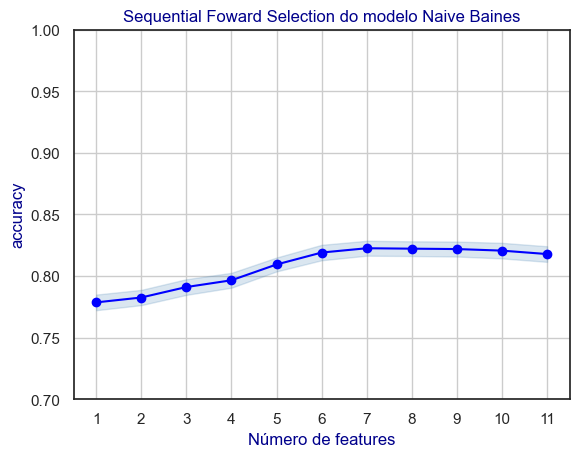

In [ ]:
plot_sfs(sfs8.get_metric_dict(),kind='std_dev')
plt.ylim([0.7, 1])
plt.title('Sequential Foward Selection do modelo Naive Baines', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('accuracy', color="darkblue")
plt.grid()
plt.show()

Da selecção de *features* as variáveis preditoras selecionadas foram 0, 1, 2, 3, 4, 5, 6

In [ ]:
x_treino2 = x_treino[:, [0, 1, 2, 3, 4, 5, 6]]
x_teste2 = x_teste[:, [0, 1, 2, 3, 4, 5, 6]]
naive_aparada = GaussianNB()
naive_aparada.fit(x_treino2, y_treino)
naive_apa_previsoes=naive_aparada.predict(x_teste2)
Accuracy = metrics.accuracy_score(y_teste, naive_apa_previsoes)
Precision = metrics.precision_score(y_teste, naive_apa_previsoes)
Sensitivity_recall = metrics.recall_score(y_teste, naive_apa_previsoes)
F1_score = metrics.f1_score(y_teste, naive_apa_previsoes)
pd.DataFrame({
    "Accuracy:": [round(Accuracy,4)],
    "Precision:": [round(Precision,4)],
    "Recall:": [round(Sensitivity_recall,4)],
    "F1-Score:":[round(F1_score,4)]
})

Accuracy:  Precision:  Recall:  F1-Score:
0     0.8237      0.7382   0.4716     0.5755

Text(0, 0.5, 'Real')

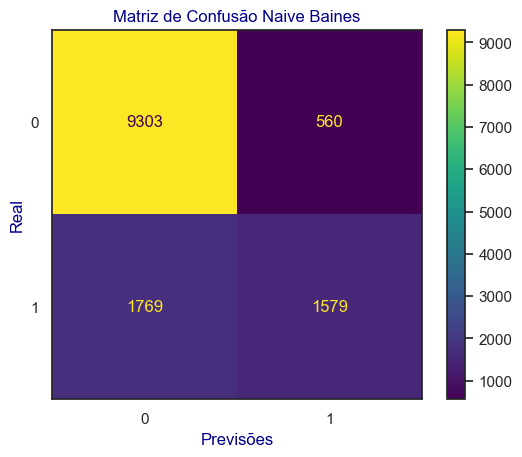

In [ ]:
grafico(2)
confusao = metrics.confusion_matrix(y_teste, naive_apa_previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [0, 1])
cm_display.plot()
plt.title('Matriz de Confusão Naive Baines', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")

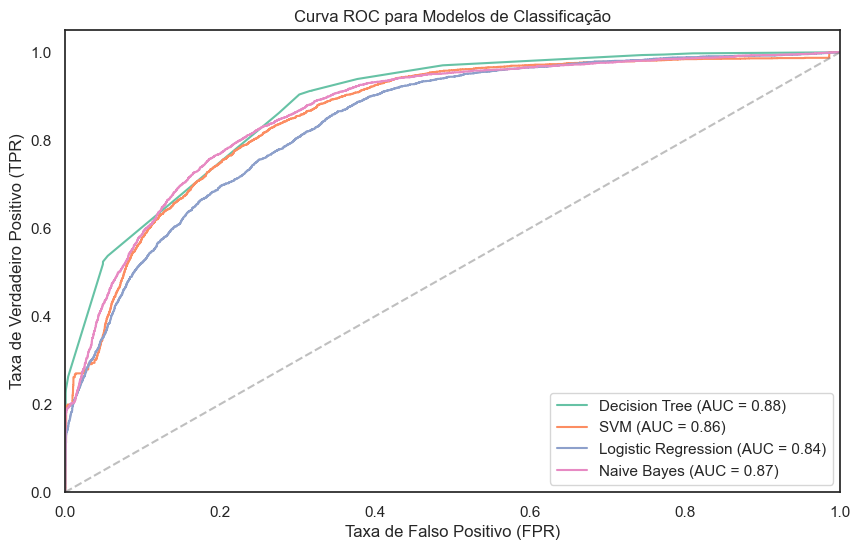

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, criterion='entropy'),
    'SVM': SVC(C=1, kernel= 'rbf'),
    'Logistic Regression': LogisticRegression(C=1),
    'Naive Bayes': GaussianNB()
}
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(x_treino, y_treino)
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(x_teste)
    else:
        y_score = model.predict_proba(x_teste)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_teste, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=0.5)  # Linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC para Modelos de Classificação')
plt.legend(loc="lower right")
plt.show()

**Problema de DM3**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - ~~[X] [DM2](#secao6)~~
      - [X] [DM3](#secao7)
        - [X] [RF](#secao71)
        - [ ] [RL](#secao72)
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao71"></a>


Neste problema a nossa variável alvo deixou de ser o income para passar a ser o capital, contudo e de forma a identificar se existiam caracteristicas que influenciavam a determinação de individuos tinham ganho de capital e perca de capital foi necessário redefinir o nosso dataset. Para isto aplicamos a função [`condition.apply()`](https://stackoverflow.com/questions/69146550/pandas-apply-function-with-a-condition)

In [ ]:
dataset = pd.read_csv('Adultparte2.csv')

condition = dataset['capital'] > 0
dataset['capital_bin'] = condition.apply(lambda x: 1 if x else 0)

print(len(dataset.values))
print(dataset.columns.values)
new_order = ['capital', 'income', 'Age', 'Workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'country_category', 'education-num', 'education','capital_bin']
#new_order = ['capital', 'income', 'Age', 'Workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'country_category', 'education-num', 'education']
dataset = dataset[new_order]

dataset = prepareDataset(dataset)
print(dataset.columns.values)
preditores = dataset.iloc[:, 1:12].values
classe = dataset.iloc[:, 12].values

x_train, x_test, y_train, y_test = train_test_split(preditores, classe, test_size = 0.3, random_state = 0)

44034
['income' 'Age' 'Workclass' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'hours-per-week' 'capital' 'country_category'
 'education-num' 'education' 'capital_bin']
['capital' 'income' 'Age' 'Workclass' 'marital-status' 'occupation'
 'relationship' 'race' 'gender' 'hours-per-week' 'country_category'
 'education-num' 'capital_bin']


Tendo o nosso dataseet redefinido vamos começar a aplicar os nossos modelos de *Random Forest* e de Regressão Linear

In [ ]:
floresta = RandomForestRegressor(n_estimators = 200, random_state=42)
floresta.fit(x_train, y_train)
previsoes_floresta=floresta.predict(x_test)
r2 = r2_score(y_test, previsoes_floresta)
r2_ajustado = 1 - (1 - r2) * (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
mse= mean_squared_error(y_test, previsoes_floresta)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0 -0.0841         -0.085  0.0856

In [ ]:
nomes_caracteristicas = ['income', 'Age', 'Workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'country_category', 'education-num']
floresta = RandomForestRegressor(n_estimators = 200, random_state=42)
floresta.fit(x_train, y_train)
previsoes_floresta=floresta.predict(x_test)
pd.DataFrame({    
    'Característica': nomes_caracteristicas,
    'Importância': floresta.feature_importances_.round(4)})

Característica  Importância
0             income       0.0726
1                Age       0.2765
2          Workclass       0.0830
3     marital-status       0.0314
4         occupation       0.1333
5       relationship       0.0336
6               race       0.0320
7             gender       0.0339
8     hours-per-week       0.1631
9   country_category       0.0198
10     education-num       0.1207

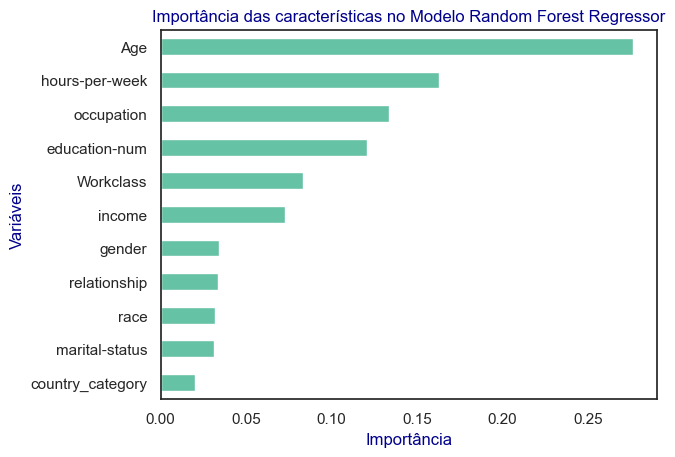

In [ ]:
importancias= pd.DataFrame({
    'Característica': nomes_caracteristicas,
    'Importância': floresta.feature_importances_
})
grafico(2)
importancias= importancias.sort_values(by='Importância', ascending=False)
importancias.plot(kind='barh', x='Característica', y='Importância', legend=False)
plt.title('Importância das características no Modelo Random Forest Regressor', color='darkblue')
plt.xlabel('Importância', color='darkblue')
plt.ylabel('Variáveis', color='darkblue')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
warnings.filterwarnings('ignore')
sfs2=SFS(floresta, k_features=11, forward=True, floating=False, verbose=2, scoring='neg_mean_squared_error', cv=5)
sfs2=sfs2.fit(preditores,classe)
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T


[2024-06-19 14:34:42] Features: 1/11 -- score: -0.07259511078810517
[2024-06-19 14:36:15] Features: 2/11 -- score: -0.072267932845746
[2024-06-19 14:38:17] Features: 3/11 -- score: -0.07222320535011167
[2024-06-19 14:41:40] Features: 4/11 -- score: -0.07242911991352421
[2024-06-19 14:45:09] Features: 5/11 -- score: -0.07305305620256532
[2024-06-19 14:48:49] Features: 6/11 -- score: -0.07380551643616026
[2024-06-19 14:52:36] Features: 7/11 -- score: -0.07464777612990028
[2024-06-19 14:56:20] Features: 8/11 -- score: -0.07623013602156288
[2024-06-19 14:59:56] Features: 9/11 -- score: -0.07963460032561195
[2024-06-19 15:03:06] Features: 10/11 -- score: -0.0834306060714048
[2024-06-19 15:05:10] Features: 11/11 -- score: -0.08545785935311982

feature_idx  \
1                                 (0,)   
2                               (0, 5)   
3                           (0, 5, 10)   
4                        (0, 5, 9, 10)   
5                     (0, 5, 7, 9, 10)   
6                  (0, 5, 6, 7, 9, 10)   
7               (0, 3, 5, 6, 7, 9, 10)   
8            (0, 2, 3, 5, 6, 7, 9, 10)   
9         (0, 2, 3, 4, 5, 6, 7, 9, 10)   
10     (0, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [-0.07155120086689772, -0.07192606419570508, -... -0.072595   
2   [-0.07118041271142099, -0.07187495243865809, -... -0.072268   
3   [-0.0709901424787723, -0.07199145912983396, -0... -0.072223   
4   [-0.07124351455009448, -0.07227920995830941, -... -0.072429   
5   [-0.07201464678818635, -0.07298396568713413, -... -0.073053   
6   [-0.0725236214651017, -0.07388320509047396, -0... -0.073806   
7   [-0.07311411453874395, -0.07480267734013053, -... -0.074648   
8   [-0.07449863008332605, -0.07582911531242698, -...  -0.07623   
9   [-0.07815348583706523, -0.07904118128510017, -... -0.079635   
10  [-0.08111488116401552, -0.0851016663411747, -0... -0.083431   
11  [-0.08316275155513933, -0.08659174412131486, -... -0.085458   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (0,)  0.002343  0.001823  0.000911  
2                               (0, 5)  0.002373  0.001847  0.000923  
3                           (0, 5, 10)  0.002459  0.001913  0.000957  
4                        (0, 5, 9, 10)  0.002456  0.001911  0.000955  
5                     (0, 5, 7, 9, 10)  0.002563  0.001994  0.000997  
6                  (0, 5, 6, 7, 9, 10)  0.002609   0.00203  0.001015  
7               (0, 3, 5, 6, 7, 9, 10)  0.002823  0.002197  0.001098  
8            (0, 2, 3, 5, 6, 7, 9, 10)  0.002855  0.002221  0.001111  
9         (0, 2, 3, 4, 5, 6, 7, 9, 10)  0.002838  0.002208  0.001104  
10     (0, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.003351  0.002607  0.001304  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002411  0.001876  0.000938

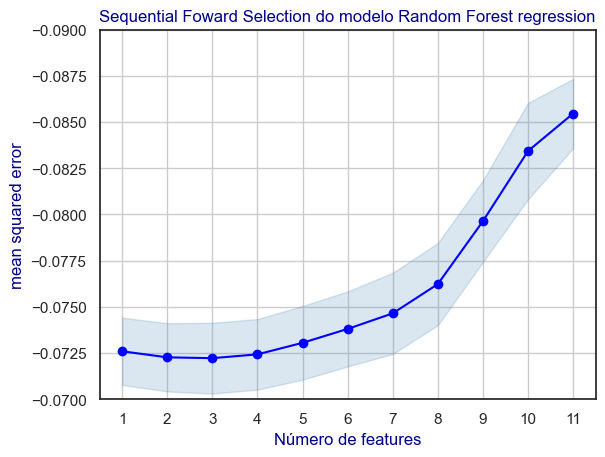

In [ ]:
grafico(2)
plot_sfs(sfs2.get_metric_dict(),kind='std_dev')
plt.ylim([-0.07, -0.09])
plt.title('Sequential Foward Selection do modelo Random Forest regression', color="darkblue")
plt.xlabel('Número de features', color="darkblue")
plt.ylabel('mean squared error', color="darkblue")
plt.grid()
plt.show()

De acordo com a analise da informação anterior conseguimos defenir as variaveis 0,5,10 como sendo as variáveis para este modelo que, a partida, melhor justificam a nossa variável, ou seja que melhor métricas apresetam.

In [ ]:
x_treino2 = x_train[:,[0,5,10]]
x_teste2 = x_test[:,[0,5,10]]
previsoes_floresta_aparada = RandomForestRegressor(n_estimators = 100, random_state=42)
previsoes_floresta_aparada.fit(x_treino2, y_train)
previsoes2 = previsoes_floresta_aparada.predict(x_teste2)
mse= mean_squared_error(y_test, previsoes2)
r2 = r2_score(y_test, previsoes2)
r2_ajustado2 = 1 - (1 - r2) * (x_teste2.shape[0] - 1) / (x_teste2.shape[0] - x_teste2.shape[1] - 1)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado2,4)],
    'mse:': [round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.0843         0.0841  0.0723

**Problema de DM3**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - ~~[X] [DM2](#secao6)~~
      - [X] [DM3](#secao7)
        - ~~[X] [RF](#secao71)~~
        - **[ ] [RL](#secao72)**
      - [ ] [DM4](#secao8)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao72"></a>

In [ ]:
regressao_linear = LinearRegression()
regressao_linear.fit(x_train, y_train)
previsoes_regressao_linear=regressao_linear.predict(x_test)
regressao_linear.coef_

array([ 0.1479689 ,  0.00130975, -0.00023863,  0.00131998, -0.00061118,
        0.00035525,  0.00161133, -0.00423284,  0.00022969, -0.00243098,
        0.0042416 ])

In [ ]:
warnings.filterwarnings('ignore')
sfs3=SFS(regressao_linear, k_features=11, forward=True, floating=False, verbose=2, scoring='neg_mean_squared_error', cv=5)
sfs3=sfs3.fit(preditores,classe)
pd.DataFrame.from_dict(sfs3.get_metric_dict()).T


[2024-06-19 15:05:12] Features: 1/11 -- score: -0.07259476080742448
[2024-06-19 15:05:13] Features: 2/11 -- score: -0.07235550534575633
[2024-06-19 15:05:13] Features: 3/11 -- score: -0.07227428480803409
[2024-06-19 15:05:14] Features: 4/11 -- score: -0.07226036629184489
[2024-06-19 15:05:14] Features: 5/11 -- score: -0.0722603766886535
[2024-06-19 15:05:15] Features: 6/11 -- score: -0.07226062815263108
[2024-06-19 15:05:15] Features: 7/11 -- score: -0.07226100198204499
[2024-06-19 15:05:16] Features: 8/11 -- score: -0.07226215941652249
[2024-06-19 15:05:16] Features: 9/11 -- score: -0.07226542989042639
[2024-06-19 15:05:16] Features: 10/11 -- score: -0.0722689051174694
[2024-06-19 15:05:16] Features: 11/11 -- score: -0.07227394216564577

feature_idx  \
1                                 (0,)   
2                               (0, 1)   
3                           (0, 1, 10)   
4                        (0, 1, 8, 10)   
5                     (0, 1, 3, 8, 10)   
6                  (0, 1, 3, 7, 8, 10)   
7               (0, 1, 3, 7, 8, 9, 10)   
8            (0, 1, 3, 6, 7, 8, 9, 10)   
9         (0, 1, 2, 3, 6, 7, 8, 9, 10)   
10     (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [-0.07155104172525877, -0.07192615001554038, -... -0.072595   
2   [-0.07139979014427598, -0.07162609507031413, -... -0.072356   
3   [-0.07126123599947579, -0.07154806547422886, -... -0.072274   
4   [-0.07122463048727495, -0.07154866265831213, -...  -0.07226   
5   [-0.07124429427490962, -0.07154597077450854, -...  -0.07226   
6   [-0.07124215571813146, -0.0715465249454642, -0... -0.072261   
7   [-0.07124017404508871, -0.0715521541756247, -0... -0.072261   
8   [-0.07124202049927032, -0.07155227901582425, -... -0.072262   
9   [-0.07124095512466326, -0.07155316830795176, -... -0.072265   
10  [-0.07124167940866921, -0.0715506023294034, -0... -0.072269   
11  [-0.0712521266807962, -0.07156304445175973, -0... -0.072274   

                         feature_names  ci_bound   std_dev   std_err  
1                                 (0,)  0.002342  0.001822  0.000911  
2                               (0, 1)   0.00231  0.001797  0.000899  
3                           (0, 1, 10)  0.002356  0.001833  0.000917  
4                        (0, 1, 8, 10)  0.002342  0.001822  0.000911  
5                     (0, 1, 3, 8, 10)  0.002335  0.001817  0.000908  
6                  (0, 1, 3, 7, 8, 10)  0.002327  0.001811  0.000905  
7               (0, 1, 3, 7, 8, 9, 10)  0.002324  0.001808  0.000904  
8            (0, 1, 3, 6, 7, 8, 9, 10)  0.002325  0.001809  0.000904  
9         (0, 1, 2, 3, 6, 7, 8, 9, 10)  0.002324  0.001808  0.000904  
10     (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)  0.002332  0.001814  0.000907  
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)  0.002327  0.001811  0.000905

In [ ]:
eqReta = "Capital^= "
eqReta += str(round(regressao_linear.intercept_, 4))
for i in range(0, len(regressao_linear.coef_)-1):
    coef = round(regressao_linear.coef_[i], 4)
    eqReta += f" + {coef}x{nomes_caracteristicas[i]}"

print(eqReta)

Capital^= -0.0585 + 0.148xincome + 0.0013xAge + -0.0002xWorkclass + 0.0013xmarital-status + -0.0006xoccupation + 0.0004xrelationship + 0.0016xrace + -0.0042xgender + 0.0002xhours-per-week + -0.0024xcountry_category


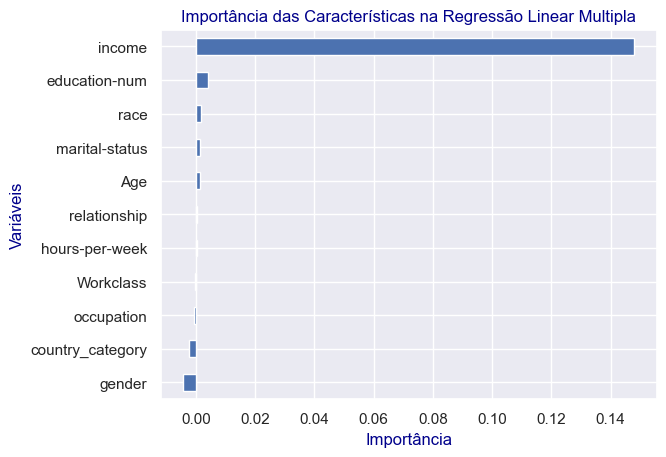

In [ ]:
nomes_caracteristicas = ['income', 'Age', 'Workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'country_category', 'education-num']
importancias= pd.DataFrame({
    'Característica': nomes_caracteristicas,
    'Importância': regressao_linear.coef_
})
grafico(4)
importancias= importancias.sort_values(by='Importância', ascending=False)
importancias.plot(kind='barh', x='Característica', y='Importância', legend=False)
plt.title('Importância das Características na Regressão Linear Multipla', color='darkblue')
plt.xlabel('Importância', color='darkblue')
plt.ylabel('Variáveis', color='darkblue')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
r2 = r2_score(y_test, previsoes_regressao_linear)
r2_ajustado = 1 - (1 - r2) * (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
mse= mean_squared_error(y_test, previsoes_regressao_linear)
pd.DataFrame({
    'R^2': [round(r2,4)],
    'R^2 ajustado:': [round(r2_ajustado,4)],
    'mse:':[round(mse,4)]
})

R^2  R^2 ajustado:    mse:
0  0.0818          0.081  0.0725

In [ ]:
X_opt=preditores
X_opt= X_opt.astype(np.float64)
regressao_linear_parc = sm.OLS(classe, X_opt).fit()
regressao_linear_parc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                              722.4
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:05:17   Log-Likelihood:                         -4642.6
No. Observations:               44034   AIC:                                      9307.
Df Residuals:                   44023   BIC:                                      9403.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1552      0.003     45.762      0.000       0.149       0.162
x2             0.0011   9.53e-05     11.111      0.000       0.001       0.001
x3            -0.0007      0.001     -0.550      0.582      -0.003       0.002
x4            -0.0003      0.001     -0.396      0.692      -0.002       0.001
x5            -0.0005      0.000     -1.686      0.092      -0.001     8.7e-05
x6            -0.0004      0.001     -0.410      0.682      -0.003       0.002
x7            -0.0038      0.001     -2.647      0.008      -0.007      -0.001
x8            -0.0059      0.003     -1.895      0.058      -0.012       0.000
x9          7.747e-05      0.000      0.740      0.460      -0.000       0.000
x10           -0.0021      0.005     -0.452      0.651      -0.011       0.007
x11            0.0025      0.001      5.048      0.000       0.002       0.004
==============================================================================
Omnibus:                    23078.770   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117627.702
Skew:                           2.650   Prob(JB):                         0.00
Kurtosis:                       9.001   Cond. No.                         215.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

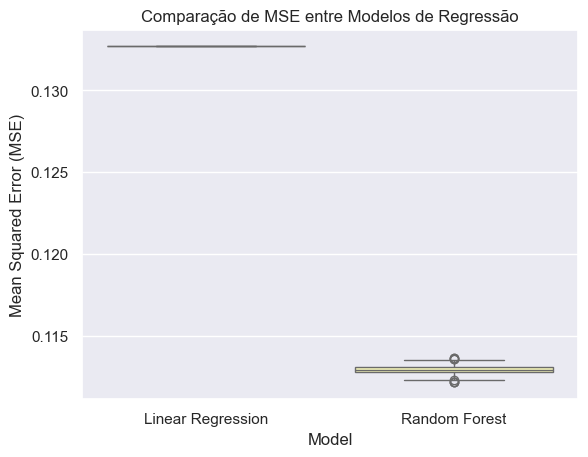

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}
num_iterations = 1000
results = []
for i in range(num_iterations): 
    for name, model in models.items():
        model.fit(x_treino, y_treino)
        y_pred = model.predict(x_teste)
        mse = mean_squared_error(y_teste, y_pred)
        
        results.append({
            'Model': name,
            'MSE': mse
        })
df = pd.DataFrame(results)
sns.boxplot(x='Model', y='MSE', data=df, palette='Set3')
plt.title('Comparação de MSE entre Modelos de Regressão')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.show()

**Problema de DM4**

- [X] [Preparação dos Dados](#secao52)
    - ~~[X] [Escolha de Técnicas de modelação](#secao521)~~
    - ~~[X] [Definir mecanismos de teste](#secao522)~~
    - [X] [Construção do Modelo](#secao52)
      - ~~[X] [DM1](#secao5241)~~
      - ~~[X] [DM2](#secao6)~~
      - ~~[X] [DM3](#secao7)~~
      - [X] [DM4](#secao8)
        - [X] [Isolation Forest](#secao81)
        - [ ] [Outlier Local Fator](#secao82)
        - [ ] [SVM](#secao82)
        - [ ] [KNN](#secao82)
    - [ ] [Avaliar o Modelo](#secao524)

<a id="secao72"></a>

Vamos iniciar por chamar o dataset de novo decidimos aplicar duas técnicas que não aprendemos na UC contudo e depois de alguma pesquisa pareceu-nos o mais adequado para o problema de DM levantado pelo banco. São elas a [`IsolationForest()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) e [`LocalOutlierFactor()`](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)
O conceito passa por identificar os outliers com os dois primeiros modelos e depois classificar o individuo com os outros modelos mediante os outliers identificados anteriormente. 

Vamos então começar com o isolation forest, formatar os nossos preditores utilizando o comando [`ColumnTransformer()`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) e um [`Pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), que permite-nos encadear múltiplos passos de transformação a serem aplicados sequencialmente

In [ ]:
import pandas as pd
dataset2 = pd.read_csv(r'C:\Users\smrgh\Desktop\Data Science\Data Mining\Projeto\2º Parte\dataset\Adultdata.csv')

: 

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)

iso_forest_labels = iso_forest.fit_predict(dataset2)

# Convert IsolationForest labels: -1 (outlier) -> 1, 1 (inlier) -> 0

iso_forest_labels = np.where(iso_forest_labels == -1, 1, 0)

# Count outliers
num_outliers = np.count_nonzero(iso_forest_labels == 1)

print(f"Numbero de outliers em Isolation Forest: {num_outliers}")

Numbero de outliers em Isolation Forest: 4404


Vamos agora ver o modelo de Outlier Local Fator onde vamos seguir os seguintes passos:

 1. Efectuar Grid search onde se testa diferentes n_neighbors
 2. Criação de dicionario vazio 
 3. Criação do pipeline de porcessamento 
 4. Remoção de outliers
 5. Processar inliers[^1]
 6. Aplicar KMeans clustering
 7. Calcular a qualidade do clustering 
 8. Criar chave para o n_neighbors atual
 9. Guaradr os resultados num dicionario
 10. Analisar os gráficos  

[^1]:são observações em um conjunto de dados que estão dentro de um intervalo esperado ou que seguem um padrão estabelecido pelo modelo de dados.

Encontrar chave para o valor maximo de silhouette

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
# Grid search onde se testa diferentes n_neighbors 

n_neighbors_range = range(10, 100, 10)  # Adjust range as needed


best_score = -1
best_n_neighbors = None


for n_neighbors in n_neighbors_range:

    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    
    lof.fit(dataset2)
    labels = lof.fit_predict(dataset2)

    labels = np.where(labels == 1, 0, 1)  # inliers=0, outliers=1
    
    score = silhouette_score(dataset2, labels)
    
    print(f'n_neighbors: {n_neighbors}, Silhouette Score: {score}')
    

    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors

# O melhor score de Silhouette 
print(f'Melhor n_neighbors: {best_n_neighbors}, melhor Silhouette Score: {best_score}')

KeyboardInterrupt: 

In [ ]:
# Fit and predict using LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.1,n_neighbors=90)

lof_labels = lof.fit_predict(dataset2)

# Convert LOF labels: -1 (outlier) -> 1, 1 (inlier) -> 0
lof_labels = np.where(lof_labels == -1, 1, 0)

# Count outliers
num_outliers = np.count_nonzero(iso_forest_labels == 1)

print(f"Numero of outliers em LOF: {num_outliers}")

Number of outliers: 4404


Comparar os resultados de LOF e isolation forest

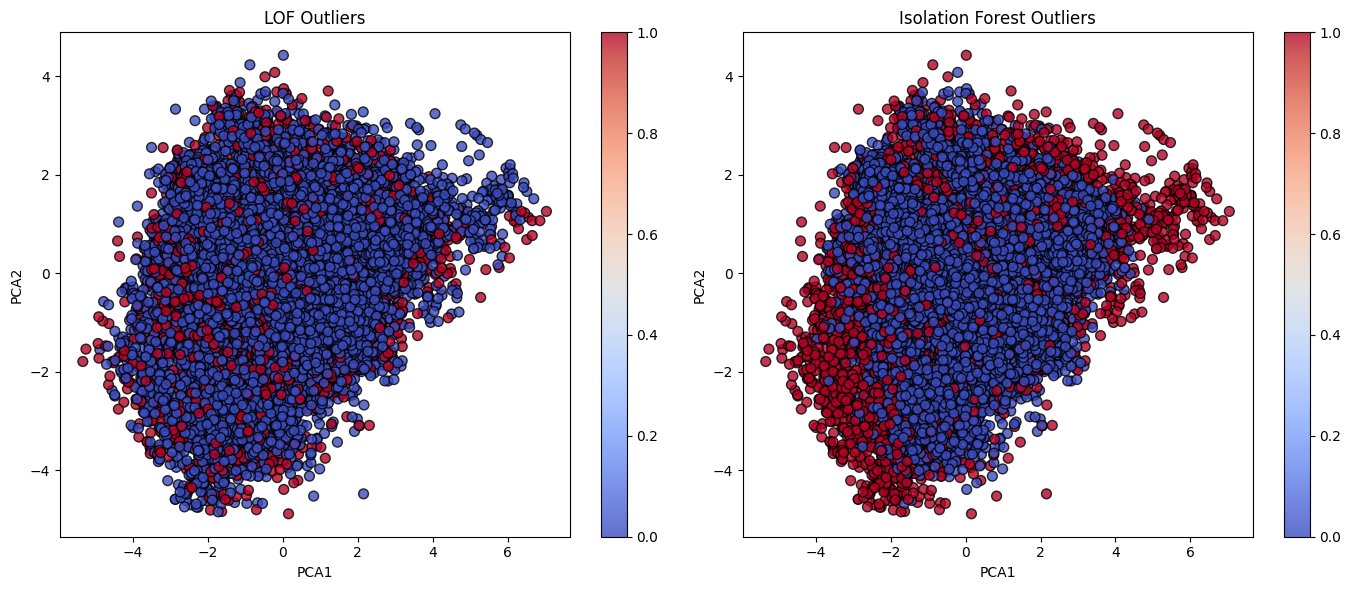

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset2)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame for visualization
df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df['LOF_Outlier'] = lof_labels  
df['IsoForest_Outlier'] = iso_forest_labels  

# Plotting
plt.figure(figsize=(14, 6))

# Plot the PCA results with LOF outliers
plt.subplot(1, 2, 1)
plt.scatter(df['PCA1'], df['PCA2'], c=df['LOF_Outlier'], cmap='coolwarm', alpha=0.8, edgecolors='k', s=50)
plt.title('LOF Outliers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()

# Plot the PCA results with Isolation Forest outliers
plt.subplot(1, 2, 2)
plt.scatter(df['PCA1'], df['PCA2'], c=df['IsoForest_Outlier'], cmap='coolwarm', alpha=0.8, edgecolors='k', s=50)
plt.title('Isolation Forest Outliers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.savefig("comparacao")

plt.tight_layout()
plt.show()

Identificar os indexes dos outliers classificados pelo modelo LOF

In [ ]:
outlier_indexes = np.where(lof_labels == 1)[0]
print(outlier_indexes)

[   11    14    22 ... 44022 44030 44032]


Voltar a ler o dataset original

Criação do atributo alvo "Outliers"

In [ ]:
print(dataset2)

dataset3 = pd.DataFrame(dataset2)

       Age  marital-status  relationship  gender  hours-per-week  capital  \
0       39               4             1       0            40.0   2174.0   
1       50               2             0       0            13.0      0.0   
2       38               0             1       0            40.0      0.0   
3       53               2             0       0            40.0      0.0   
4       28               2             0       1            40.0      0.0   
...    ...             ...           ...     ...             ...      ...   
44029   33               4             3       0            40.0      0.0   
44030   39               0             1       1            36.0      0.0   
44031   38               2             0       0            50.0      0.0   
44032   44               0             3       0            40.0   5455.0   
44033   35               2             0       0            60.0      0.0   

       education-num  Workclass  occupation  race  country_category  \
0   

In [ ]:

dataset3['Outliers'] = 'nao'

print(dataset3)

       Age  marital-status  relationship  gender  hours-per-week  capital  \
0       39               4             1       0            40.0   2174.0   
1       50               2             0       0            13.0      0.0   
2       38               0             1       0            40.0      0.0   
3       53               2             0       0            40.0      0.0   
4       28               2             0       1            40.0      0.0   
...    ...             ...           ...     ...             ...      ...   
44029   33               4             3       0            40.0      0.0   
44030   39               0             1       1            36.0      0.0   
44031   38               2             0       0            50.0      0.0   
44032   44               0             3       0            40.0   5455.0   
44033   35               2             0       0            60.0      0.0   

       education-num  Workclass  occupation  race  country_category  \
0   

In [ ]:
# Iterar pela lista do indice de outliers "out_index"
for index in outlier_indexes:
    # Marcar como "sim" as linhas da coluna "outliers" usando o index de outliers "out_index"
    dataset3.at[index, 'Outliers'] = 'sim'
# mostrar o dataset
print(dataset3)

       Age  marital-status  relationship  gender  hours-per-week  capital  \
0       39               4             1       0            40.0   2174.0   
1       50               2             0       0            13.0      0.0   
2       38               0             1       0            40.0      0.0   
3       53               2             0       0            40.0      0.0   
4       28               2             0       1            40.0      0.0   
...    ...             ...           ...     ...             ...      ...   
44029   33               4             3       0            40.0      0.0   
44030   39               0             1       1            36.0      0.0   
44031   38               2             0       0            50.0      0.0   
44032   44               0             3       0            40.0   5455.0   
44033   35               2             0       0            60.0      0.0   

       education-num  Workclass  occupation  race  country_category  \
0   

In [ ]:
pd.DataFrame(dataset3["Outliers"].value_counts())

count
Outliers       
nao       39630
sim        4404

Pre-processamento para classificação do atributo alvo

In [ ]:
X = dataset3.drop(columns=['Outliers'])
y = dataset3['Outliers'].map({'sim': 1, 'nao': 0}) # normalizar a coluna, definindo que 1 representa sim e 0 representa nao

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Oversampling a classe minoritária (sim) usando a técnica  SMOTE 
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Determinado quais são as variáveis do nosso dataset que contem valores outliers vamos então aplicar os algoritmos de classificação começando pelo SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Treinar o modelo com o conjunto de treino 
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predição do conjunto de teste
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


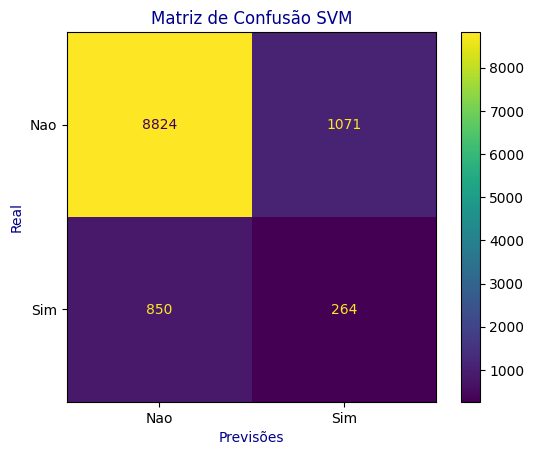

Accuracy 0.8255064038513943 
F1-Score 0.21559820334830543 
recall 0.236983842010772 
precision 0.19775280898876405


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nao', 'Sim'])
disp.plot()
plt.title('Matriz de Confusão SVM', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")
plt.savefig("matriz de SVM")
plt.show()
print("Accuracy",accuracy_score(y_test, y_pred),"\nF1-Score",f1_score(y_test, y_pred), "\nrecall",recall_score(y_test, y_pred),"\nprecision",precision_score(y_test, y_pred))


Então para determinar as métricas utilizamos o comando [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
classes = np.unique(dataset3['Outliers'].values)
print(classification_report(y_test, y_pred, target_names=classes.tolist()))

              precision    recall  f1-score   support

         nao       0.91      0.89      0.90      9895
         sim       0.20      0.24      0.22      1114

    accuracy                           0.83     11009
   macro avg       0.55      0.56      0.56     11009
weighted avg       0.84      0.83      0.83     11009



Treino do modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Treinar o modelo com o conjunto de treino 
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Predição do conjunto de teste
y_pred = classifier.predict(X_test)

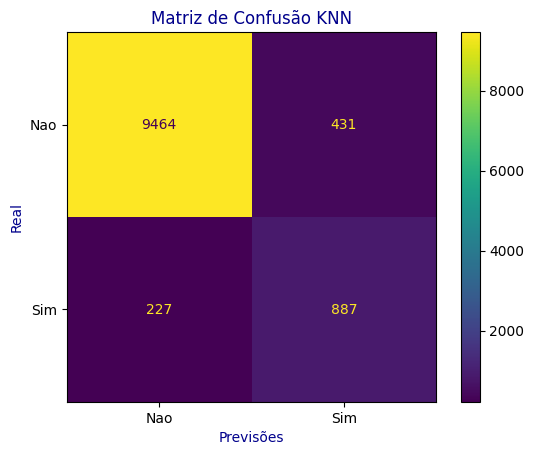

Accuracy 0.9402307203197384 
F1-Score 0.7294407894736842 
recall 0.796229802513465 
precision 0.6729893778452201


In [ ]:
#Construção da matriz de confusão e extração de métricas
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nao', 'Sim'])
disp.plot()
plt.title('Matriz de Confusão KNN', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")
plt.savefig("matriz de KNN")
plt.show()
accuracy_score(y_test, y_pred)
print("Accuracy",accuracy_score(y_test, y_pred),"\nF1-Score",f1_score(y_test, y_pred), "\nrecall",recall_score(y_test, y_pred),"\nprecision",precision_score(y_test, y_pred))

In [ ]:
classes = np.unique(dataset3['Outliers'].values)
print(classification_report(y_test, y_pred, target_names=classes.tolist()))

f1_score(y_test, y_pred)

              precision    recall  f1-score   support

         nao       0.98      0.96      0.97      9895
         sim       0.67      0.80      0.73      1114

    accuracy                           0.94     11009
   macro avg       0.82      0.88      0.85     11009
weighted avg       0.95      0.94      0.94     11009



0.7294407894736842

Vamos agora fazer a seleção de features utilizando o Sequential Forward Selection (SFS)

In [ ]:
#A partir do dataset, criar um subconjunto com e sem a feature alvo (Outliers)
X = dataset3.drop(columns=['Outliers'])
y = dataset3['Outliers'].map({'sim': 1, 'nao': 0}) # normalizar a coluna, definindo que 1 representa sim e 0 representa nao
# Dividir o dataset em conjunto de treino e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Definir paramentros do modelo Sequential Forward Selection
sfs2 = SFS(classifier,
           k_features=11, 
           forward=True,
           floating=False, 
           verbose=2,
           scoring='f1_weighted',
           cv=5)

#ignorar avisos
warnings.filterwarnings('ignore')
#Fit do modelo aos dados
sfs2 = sfs2.fit(X, y)
sfs2_results =pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfs2_results


[2024-06-20 20:10:43] Features: 1/11 -- score: 0.8907754781334571
[2024-06-20 20:12:27] Features: 2/11 -- score: 0.8955477090866788
[2024-06-20 20:13:34] Features: 3/11 -- score: 0.9102006177935262
[2024-06-20 20:14:25] Features: 4/11 -- score: 0.9173852837136994
[2024-06-20 20:15:07] Features: 5/11 -- score: 0.9214311823204294
[2024-06-20 20:15:49] Features: 6/11 -- score: 0.9234345983060136
[2024-06-20 20:16:27] Features: 7/11 -- score: 0.9274148548232312
[2024-06-20 20:17:01] Features: 8/11 -- score: 0.9300983591132909
[2024-06-20 20:17:33] Features: 9/11 -- score: 0.9309375506288333
[2024-06-20 20:18:01] Features: 10/11 -- score: 0.9310731328415789
[2024-06-20 20:18:26] Features: 11/11 -- score: 0.9312898212329488

feature_idx  \
1                                  (5,)   
2                                (4, 5)   
3                            (4, 5, 11)   
4                         (0, 4, 5, 11)   
5                      (0, 4, 5, 7, 11)   
6                   (0, 4, 5, 7, 8, 11)   
7                (0, 4, 5, 6, 7, 8, 11)   
8             (0, 2, 4, 5, 6, 7, 8, 11)   
9          (0, 1, 2, 4, 5, 6, 7, 8, 11)   
10     (0, 1, 2, 4, 5, 6, 7, 8, 11, 12)   
11  (0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12)   

                                            cv_scores avg_score  \
1   [0.8895816514933526, 0.8933811172680405, 0.891...  0.890775   
2   [0.8929594395750559, 0.8975085470903805, 0.896...  0.895548   
3   [0.9081047130418346, 0.9102617392144987, 0.912...  0.910201   
4   [0.9172312892221961, 0.9183806957774019, 0.919...  0.917385   
5   [0.9226039499312356, 0.9230149452646242, 0.922...  0.921431   
6   [0.9250267828029535, 0.9246752553499152, 0.925...  0.923435   
7   [0.9284355887058225, 0.9294549836098089, 0.928...  0.927415   
8   [0.9298685787670624, 0.9332972966608044, 0.931...  0.930098   
9   [0.9307702448281827, 0.9341259285235506, 0.931...  0.930938   
10  [0.9307535672262804, 0.9341303339458376, 0.931...  0.931073   
11  [0.9303835346336664, 0.9342297938305013, 0.932...   0.93129   

                                        feature_names  ci_bound   std_dev  \
1                                          (capital,)  0.001948  0.001516   
2                           (hours-per-week, capital)  0.001938  0.001508   
3                (hours-per-week, capital, education)  0.001995  0.001553   
4           (Age, hours-per-week, capital, education)  0.002064  0.001606   
5   (Age, hours-per-week, capital, Workclass, educ...  0.002153  0.001675   
6   (Age, hours-per-week, capital, Workclass, occu...  0.002621  0.002039   
7   (Age, hours-per-week, capital, education-num, ...  0.002362  0.001838   
8   (Age, relationship, hours-per-week, capital, e...  0.002609   0.00203   
9   (Age, marital-status, relationship, hours-per-...  0.002238  0.001741   
10  (Age, marital-status, relationship, hours-per-...  0.002326  0.001809   
11  (Age, marital-status, relationship, hours-per-...  0.002579  0.002007   

     std_err  
1   0.000758  
2   0.000754  
3   0.000776  
4   0.000803  
5   0.000838  
6   0.001019  
7   0.000919  
8   0.001015  
9    0.00087  
10  0.000905  
11  0.001003

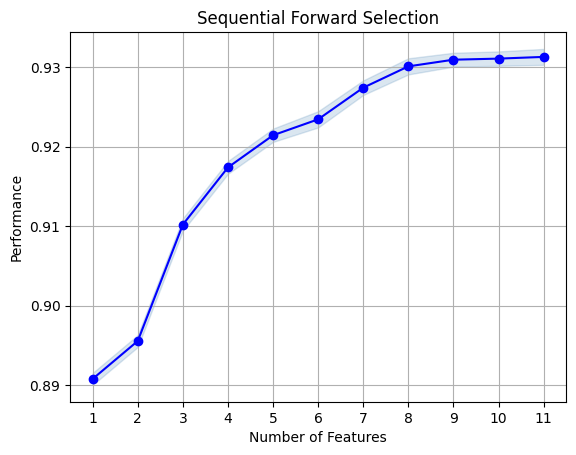

In [ ]:
#Obter grafico com performace do modelo SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()

plt.savefig("features.png")

plt.show()

### Criar nova classificação para o modelo otimizado

In [ ]:
sel_dataset = dataset3.iloc[:, [0, 4, 5, 7, 11]]

print(sel_dataset)

       Age  hours-per-week  capital  Workclass  education
0       39            40.0   2174.0          5         13
1       50            13.0      0.0          4         13
2       38            40.0      0.0          2          9
3       53            40.0      0.0          2          7
4       28            40.0      0.0          2         13
...    ...             ...      ...        ...        ...
44029   33            40.0      0.0          2         13
44030   39            36.0      0.0          2         13
44031   38            50.0      0.0          2         13
44032   44            40.0   5455.0          2         13
44033   35            60.0      0.0          3         13

[44034 rows x 5 columns]


In [ ]:
#Criar objeto apenas com as variaveis escolhidas, e criar objeto só com feature alvo (Outliers)
X = sel_dataset
y = dataset3['Outliers'].map({'sim': 1, 'nao': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#Treinar o modelo com o conjunto de treino 
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predição do conjunto de teste
y_pred = classifier.predict(X_test)

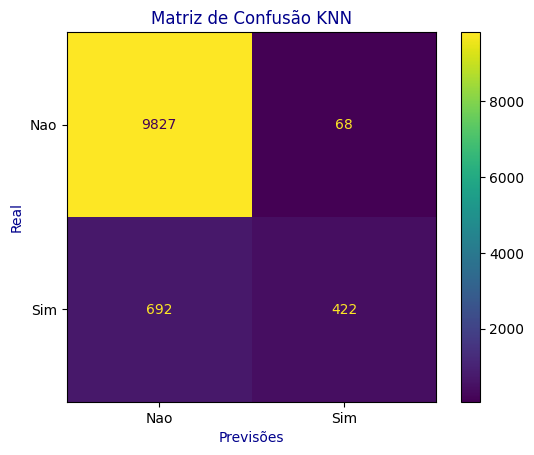

Accuracy 0.9309655736215824 
F1-Score 0.5261845386533666 
recall 0.37881508078994613 
precision 0.8612244897959184


In [ ]:
#Construção da matriz de confusão e extração de métricas
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nao', 'Sim'])
disp.plot()
plt.title('Matriz de Confusão KNN', color="darkblue")
plt.xlabel('Previsões', color="darkblue")
plt.ylabel('Real', color="darkblue")
plt.savefig("matriz de KNN2")
plt.show()
print("Accuracy",accuracy_score(y_test, y_pred),"\nF1-Score",f1_score(y_test, y_pred), "\nrecall",recall_score(y_test, y_pred),"\nprecision",precision_score(y_test, y_pred))


In [ ]:
# Mostrar o relatorio de classificação 
classes = np.unique(dataset3['Outliers'].values)
print(classification_report(y_test, y_pred, target_names=classes.tolist()))

              precision    recall  f1-score   support

         nao       0.93      0.99      0.96      9895
         sim       0.86      0.38      0.53      1114

    accuracy                           0.93     11009
   macro avg       0.90      0.69      0.74     11009
weighted avg       0.93      0.93      0.92     11009



In [ ]:
from sklearn.metrics import precision_recall_curve, auc
svm_model = SVC(probability=True)
svm_model.fit(x_treino, y_treino)
y_pred_svm = svm_model.predict(x_teste)
y_pred_proba_svm = svm_model.predict_proba(x_teste)[:, 1]

knn_model = KNeighborsClassifier()
knn_model.fit(x_treino, y_treino)
y_pred_knn = knn_model.predict(x_teste)
y_pred_proba_knn = knn_model.predict_proba(x_teste)[:, 1]

precision_svm, recall_svm, _ = precision_recall_curve(y_teste, y_pred_proba_svm)
precision_knn, recall_knn, _ = precision_recall_curve(y_teste, y_pred_proba_knn)

plt.figure()
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

NameError: name 'x_treino' is not defined